# Table of Contents
 <p><div class="lev1 toc-item"><a href="#An-example-of-a-small-Multi-Player-simulation,-with-rhoRand-and-Selfish,-for-different-algorithms" data-toc-modified-id="An-example-of-a-small-Multi-Player-simulation,-with-rhoRand-and-Selfish,-for-different-algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>An example of a small Multi-Player simulation, with rhoRand and Selfish, for different algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-problem" data-toc-modified-id="Creating-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the problem</a></div><div class="lev3 toc-item"><a href="#Parameters-for-the-simulation" data-toc-modified-id="Parameters-for-the-simulation-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Parameters for the simulation</a></div><div class="lev3 toc-item"><a href="#Three-MAB-problems-with-Bernoulli-arms" data-toc-modified-id="Three-MAB-problems-with-Bernoulli-arms-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Three MAB problems with Bernoulli arms</a></div><div class="lev3 toc-item"><a href="#Some-RL-algorithms" data-toc-modified-id="Some-RL-algorithms-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Some RL algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-EvaluatorMultiPlayers-objects" data-toc-modified-id="Creating-the-EvaluatorMultiPlayers-objects-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the <code>EvaluatorMultiPlayers</code> objects</a></div><div class="lev2 toc-item"><a href="#Solving-the-problem" data-toc-modified-id="Solving-the-problem-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Solving the problem</a></div><div class="lev2 toc-item"><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting the results</a></div><div class="lev3 toc-item"><a href="#First-problem" data-toc-modified-id="First-problem-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>First problem</a></div><div class="lev3 toc-item"><a href="#Second-problem" data-toc-modified-id="Second-problem-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Second problem</a></div><div class="lev3 toc-item"><a href="#Third-problem" data-toc-modified-id="Third-problem-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Third problem</a></div><div class="lev3 toc-item"><a href="#Comparing-their-performances" data-toc-modified-id="Comparing-their-performances-144"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Comparing their performances</a></div>

---
# An example of a small Multi-Player simulation, with rhoRand and Selfish, for different algorithms

First, be sure to be in the main folder, or to have [SMPyBandits](https://github.com/SMPyBandits/SMPyBandits) installed, and import `EvaluatorMultiPlayers` from `Environment` package:

In [1]:
!pip install SMPyBandits watermark
%load_ext watermark
%watermark -v -m -p SMPyBandits -a "Lilian Besson"

Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...
Lilian Besson 

CPython 3.6.6
IPython 7.1.1

SMPyBandits 0.9.4

compiler   : GCC 8.0.1 20180414 (experimental) [trunk revision 259383
system     : Linux
release    : 4.15.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
# Local imports
from SMPyBandits.Environment import EvaluatorMultiPlayers, tqdm

We also need arms, for instance `Bernoulli`-distributed arm:

In [3]:
# Import arms
from SMPyBandits.Arms import Bernoulli

And finally we need some single-player and multi-player Reinforcement Learning algorithms:

In [4]:
# Import algorithms
from SMPyBandits.Policies import *
from SMPyBandits.PoliciesMultiPlayers import *

In [5]:
# Just improving the ?? in Jupyter. Thanks to https://nbviewer.jupyter.org/gist/minrk/7715212
from __future__ import print_function
from IPython.core import page
def myprint(s):
    try:
        print(s['text/plain'])
    except (KeyError, TypeError):
        print(s)
page.page = myprint

For instance, this imported the `Thompson` algorithm:

In [6]:
Thompson?

Init signature: Thompson(nbArms, posterior=<class 'SMPyBandits.Policies.Posterior.Beta.Beta'>, lower=0.0, amplitude=1.0, *args, **kwargs)
Docstring:     
The Thompson (Bayesian) index policy.

- By default, it uses a Beta posterior (:class:`Policies.Posterior.Beta`), one by arm.
- Prior is initially flat, i.e., :math:`a=\alpha_0=1` and :math:`b=\beta_0=1`.

- A non-flat prior for each arm can be given with parameters ``a`` and ``b``, for instance::

    nbArms = 2
    prior_failures  = a = 100
    prior_successes = b = 50
    policy = Thompson(nbArms, a=a, b=b)
    np.mean([policy.choice() for _ in range(1000)])  # 0.515 ~= 0.5: each arm has same prior!

- A different prior for each arm can be given with parameters ``params_for_each_posterior``, for instance::

    nbArms = 2
    params0 = { 'a': 10, 'b': 5}  # mean 1/3
    params1 = { 'a': 5, 'b': 10}  # mean 2/3
    params = [params0, params1]
    policy = Thompson(nbArms, params_for_each_posterior=params)
    np.mean([policy.choice(

As well as the `rhoRand` and `Selfish` multi-player policy:

In [7]:
rhoRand?

Init signature: rhoRand(nbPlayers, nbArms, playerAlgo, maxRank=None, orthogonalRanks=False, lower=0.0, amplitude=1.0, *args, **kwargs)
Docstring:     
rhoRand: implementation of the multi-player policy from [Distributed Algorithms for Learning..., Anandkumar et al., 2010](http://ieeexplore.ieee.org/document/5462144/).
    
Init docstring:
- nbPlayers: number of players to create (in self._players).
- playerAlgo: class to use for every players.
- nbArms: number of arms, given as first argument to playerAlgo.
- maxRank: maximum rank allowed by the rhoRand child (default to nbPlayers, but for instance if there is 2 × rhoRand[UCB] + 2 × rhoRand[klUCB], maxRank should be 4 not 2).
- `*args`, `**kwargs`: arguments, named arguments, given to playerAlgo.

Example:

>>> import sys; sys.path.insert(0, '..'); from Policies import *
>>> import random; random.seed(0); import numpy as np; np.random.seed(0)
>>> nbArms = 17
>>> nbPlayers = 6
>>> s = rhoRand(nbPlayers, nbArms, UCB)
>>> [ child.choice()

In [8]:
Selfish?

Init signature: Selfish(nbPlayers, nbArms, playerAlgo, penalty=None, lower=0.0, amplitude=1.0, *args, **kwargs)
Docstring:     
Selfish: a multi-player policy where every player is selfish, playing on their side.

- without nowing how many players there is, and
- not even knowing that they should try to avoid collisions. When a collision happens, the algorithm simply receives a 0 reward for the chosen arm (can be changed with penalty= argument).
Init docstring:
- nbPlayers: number of players to create (in self._players).
- playerAlgo: class to use for every players.
- nbArms: number of arms, given as first argument to playerAlgo.
- `*args`, `**kwargs`: arguments, named arguments, given to playerAlgo.

Examples:

>>> import sys; sys.path.insert(0, '..'); from Policies import *
>>> import random; random.seed(0); import numpy as np; np.random.seed(0)
>>> nbArms = 17
>>> nbPlayers = 6
>>> s = Selfish(nbPlayers, nbArms, Uniform)
>>> [ child.choice() for child in s.children ]
[12, 13, 1, 8, 

We also need a collision model. The usual ones are defined in the `CollisionModels` package, and the only one we need is the classical one, where two or more colliding users don't receive any rewards.

In [9]:
# Collision Models
from SMPyBandits.Environment.CollisionModels import onlyUniqUserGetsReward

onlyUniqUserGetsReward?

Signature: onlyUniqUserGetsReward(t, arms, players, choices, rewards, pulls, collisions)
Docstring:
Simple collision model where only the players alone on one arm samples it and receives the reward.

- This is the default collision model, cf. [[Multi-Player Bandits Revisited, Lilian Besson and Emilie Kaufmann, 2017]](https://hal.inria.fr/hal-01629733).
- The numpy array 'choices' is increased according to the number of users who collided (it is NOT binary).
File:      /tmp/SMPyBandits/notebooks/venv3/lib/python3.6/site-packages/SMPyBandits/Environment/CollisionModels.py
Type:      function



---
## Creating the problem

### Parameters for the simulation
- $T = 10000$ is the time horizon,
- $N = 100$ is the number of repetitions (should be larger to have consistent results),
- $M = 2$ is the number of players,
- `N_JOBS = 4` is the number of cores used to parallelize the code.

In [21]:
HORIZON = 10000
REPETITIONS = 100
NB_PLAYERS = 2
N_JOBS = 1
collisionModel = onlyUniqUserGetsReward

### Three MAB problems with Bernoulli arms
We consider in this example $3$ problems, with `Bernoulli` arms, of different means.

1. The first problem is very easy, with two good arms and three arms, with a fixed gap $\Delta = \max_{\mu_i \neq \mu_j}(\mu_{i} - \mu_{j}) = 0.1$.
2. The second problem is as easier, with a larger gap.
3. Third problem is harder, with a smaller gap, and a very large difference between the two optimal arms and the suboptimal arms.

> Note: right now, the multi-environments evaluator does not work well for MP policies, if there is a number different of arms in the scenarios. So I use the same number of arms in all the problems.

In [22]:
ENVIRONMENTS = [  # 1)  Bernoulli arms
        {   # Scenario 1 from [Komiyama, Honda, Nakagawa, 2016, arXiv 1506.00779]
            "arm_type": Bernoulli,
            "params": [0.3, 0.4, 0.5, 0.6, 0.7]
        },
        {   # Classical scenario
             "arm_type": Bernoulli,
             "params": [0.1, 0.3, 0.5, 0.7, 0.9]
        },
        {   # Harder scenario
             "arm_type": Bernoulli,
             "params": [0.005, 0.01, 0.015, 0.84, 0.85]
        }
    ]

### Some RL algorithms
We will use Thompson Sampling, $\mathrm{UCB}_1$ and $\mathrm{kl}$-$\mathrm{UCB}$, using two different decentralized policy:

1. `rhoRand`: each player starts with a rank $1$, and on collision it selects a new rank $r \sim U([1,M])$. Instead of aiming at the best arm, each player aims at the $r$-th best arm (as given by its UCB index, or posterior sampling if Thompson sampling).

2. `Selfish`: each player runs a classical RL algorithm, on the joint reward $\tilde{r}$:
   $$ \tilde{r}_j(t) = r_j(t) \times (1 - \eta_j(t)) $$
   where $r_j(t)$ is the reward from the sensing of the $j$-th arm at time $t \geq 1$ and $\eta_j(t)$ is a boolean indicator saying that there were a collision on that arm at time $t$.
   In other words, if a player chose arm $j$ and was alone on it, it receives $r_j(t)$, and if it was not alone, all players who chose arm $j$ receive $0$.

In [23]:
nbArms = len(ENVIRONMENTS[0]['params'])
nbArms

SUCCESSIVE_PLAYERS = [
    # UCB alpha=1
    rhoRand(NB_PLAYERS, nbArms, UCBalpha, alpha=1).children,
    Selfish(NB_PLAYERS, nbArms, UCBalpha, alpha=1).children,
    # Thompson Sampling
    rhoRand(NB_PLAYERS, nbArms, Thompson).children,
    Selfish(NB_PLAYERS, nbArms, Thompson).children,
    # Thompson Sampling
    rhoRand(NB_PLAYERS, nbArms, klUCB).children,
    Selfish(NB_PLAYERS, nbArms, klUCB).children,
]
SUCCESSIVE_PLAYERS

5

[[rhoRand(UCB($\alpha=1$)), rhoRand(UCB($\alpha=1$))],
 [Selfish(UCB($\alpha=1$)), Selfish(UCB($\alpha=1$))],
 [rhoRand(Thompson), rhoRand(Thompson)],
 [Selfish(Thompson), Selfish(Thompson)],
 [rhoRand(kl-UCB), rhoRand(kl-UCB)],
 [Selfish(kl-UCB), Selfish(kl-UCB)]]

The mother class in this case does not do any centralized learning, as `Selfish` and `rhoRand` are fully decentralized scenario.

In [24]:
OneMother = SUCCESSIVE_PLAYERS[0][0].mother
OneMother
OneMother.nbArms

OnePlayer = SUCCESSIVE_PLAYERS[0][0]
OnePlayer.nbArms

5

5

Complete configuration for the problem:

In [25]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Collision model
    "collisionModel": onlyUniqUserGetsReward,
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "successive_players": SUCCESSIVE_PLAYERS,
}

---
## Creating the `EvaluatorMultiPlayers` objects
We will need to create several objects, as the simulation first runs one policy against each environment, and then aggregate them to compare them.

In [26]:
%%time
N_players = len(configuration["successive_players"])

# List to keep all the EvaluatorMultiPlayers objects
evs = [None] * N_players
evaluators = [[None] * N_players] * len(configuration["environment"])

for playersId, players in tqdm(enumerate(configuration["successive_players"]), desc="Creating"):
    print("\n\nConsidering the list of players :\n", players)
    conf = configuration.copy()
    conf['players'] = players
    evs[playersId] = EvaluatorMultiPlayers(conf)



Considering the list of players :
 [rhoRand(UCB($\alpha=1$)), rhoRand(UCB($\alpha=1$))]
Number of players in the multi-players game: 2
Time horizon: 10000
Number of repetitions: 100
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 1
Using collision model onlyUniqUserGetsReward (function <function onlyUniqUserGetsReward at 0x7fd1f3a25bf8>).
More details:
 Simple collision model where only the players alone on one arm samples it and receives the reward.

    - This is the default collision model, cf. [[Multi-Player Bandits Revisited, Lilian Besson and Emilie Kaufmann, 2017]](https://hal.inria.fr/hal-01629733).
    - The numpy array 'choices' is increased according to the number of users who collided (it is NOT binary).
    
Using accurate regrets and last regrets ? True


Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': [0.3, 0.4, 0

##  Solving the problem
Now we can simulate the $2$ environments, for the successive policies. That part can take some time.

In [27]:
%%time
for playersId, evaluation in tqdm(enumerate(evs), desc="Policies"):
    for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
        # Evaluate just that env
        evaluation.startOneEnv(envId, env)
        # Storing it after simulation is done
        evaluators[envId][playersId] = evaluation



Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<RhoRand-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #1<RhoRand-UCB($\alpha=1$)> ...
- Adding player # 2 = #2<RhoRand-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #2<RhoRand-UCB($\alpha=1$)> ...



Estimated order by the policy #1<RhoRand-UCB($\alpha=1$)> after 10000 steps: [0 1 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 82.00% (relative success)...

Estimated order by the policy #2<RhoRand-UCB($\alpha=1$)> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<RhoRand-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #1<RhoRand-UCB($\alpha=1$)> ...
- Adding player # 2 = #2<RhoRand-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #2<RhoRand-UCB($\alpha=1$)> ...



Estimated order by the policy #1<RhoRand-UCB($\alpha=1$)> after 10000 steps: [1 2 0 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 74.00% (relative success)...

Estimated order by the policy #2<RhoRand-UCB($\alpha=1$)> after 10000 steps: [0 2 1 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 64.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<RhoRand-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #1<RhoRand-UCB($\alpha=1$)> ...
- Adding player # 2 = #2<RhoRand-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #2<RhoRand-UCB($\alpha=1$)> ...



Estimated order by the policy #1<RhoRand-UCB($\alpha=1$)> after 10000 steps: [0 1 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 82.00% (relative success)...

Estimated order by the policy #2<RhoRand-UCB($\alpha=1$)> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...




Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<Selfish-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #1<Selfish-UCB($\alpha=1$)> ...
- Adding player # 2 = #2<Selfish-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #2<Selfish-UCB($\alpha=1$)> ...



Estimated order by the policy #1<Selfish-UCB($\alpha=1$)> after 10000 steps: [1 0 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 64.00% (relative success)...

Estimated order by the policy #2<Selfish-UCB($\alpha=1$)> after 10000 steps: [0 3 1 2 4] ...
  ==> Optimal arm identification: 92.31% (relative success)...
  ==> Mean distance from optimal ordering: 74.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<Selfish-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #1<Selfish-UCB($\alpha=1$)> ...
- Adding player # 2 = #2<Selfish-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #2<Selfish-UCB($\alpha=1$)> ...



Estimated order by the policy #1<Selfish-UCB($\alpha=1$)> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...

Estimated order by the policy #2<Selfish-UCB($\alpha=1$)> after 10000 steps: [0 1 4 2 3] ...
  ==> Optimal arm identification: 75.00% (relative success)...
  ==> Mean distance from optimal ordering: 74.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<Selfish-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #1<Selfish-UCB($\alpha=1$)> ...
- Adding player # 2 = #2<Selfish-UCB($\alpha=1$)> ...
  Using this already created player 'player' = #2<Selfish-UCB($\alpha=1$)> ...



Estimated order by the policy #1<Selfish-UCB($\alpha=1$)> after 10000 steps: [0 1 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 82.00% (relative success)...

Estimated order by the policy #2<Selfish-UCB($\alpha=1$)> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...




Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<RhoRand-Thompson> ...
  Using this already created player 'player' = #1<RhoRand-Thompson> ...
- Adding player # 2 = #2<RhoRand-Thompson> ...
  Using this already created player 'player' = #2<RhoRand-Thompson> ...



Estimated order by the policy #1<RhoRand-Thompson> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...

Estimated order by the policy #2<RhoRand-Thompson> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<RhoRand-Thompson> ...
  Using this already created player 'player' = #1<RhoRand-Thompson> ...
- Adding player # 2 = #2<RhoRand-Thompson> ...
  Using this already created player 'player' = #2<RhoRand-Thompson> ...



Estimated order by the policy #1<RhoRand-Thompson> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...

Estimated order by the policy #2<RhoRand-Thompson> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<RhoRand-Thompson> ...
  Using this already created player 'player' = #1<RhoRand-Thompson> ...
- Adding player # 2 = #2<RhoRand-Thompson> ...
  Using this already created player 'player' = #2<RhoRand-Thompson> ...



Estimated order by the policy #1<RhoRand-Thompson> after 10000 steps: [2 1 0 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 64.00% (relative success)...

Estimated order by the policy #2<RhoRand-Thompson> after 10000 steps: [2 1 0 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 64.00% (relative success)...




Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<Selfish-Thompson> ...
  Using this already created player 'player' = #1<Selfish-Thompson> ...
- Adding player # 2 = #2<Selfish-Thompson> ...
  Using this already created player 'player' = #2<Selfish-Thompson> ...



Estimated order by the policy #1<Selfish-Thompson> after 10000 steps: [0 4 1 2 3] ...
  ==> Optimal arm identification: 84.62% (relative success)...
  ==> Mean distance from optimal ordering: 66.00% (relative success)...

Estimated order by the policy #2<Selfish-Thompson> after 10000 steps: [2 3 1 0 4] ...
  ==> Optimal arm identification: 76.92% (relative success)...
  ==> Mean distance from optimal ordering: 48.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<Selfish-Thompson> ...
  Using this already created player 'player' = #1<Selfish-Thompson> ...
- Adding player # 2 = #2<Selfish-Thompson> ...
  Using this already created player 'player' = #2<Selfish-Thompson> ...



Estimated order by the policy #1<Selfish-Thompson> after 10000 steps: [0 2 1 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 64.00% (relative success)...

Estimated order by the policy #2<Selfish-Thompson> after 10000 steps: [1 0 3 2 4] ...
  ==> Optimal arm identification: 87.50% (relative success)...
  ==> Mean distance from optimal ordering: 64.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<Selfish-Thompson> ...
  Using this already created player 'player' = #1<Selfish-Thompson> ...
- Adding player # 2 = #2<Selfish-Thompson> ...
  Using this already created player 'player' = #2<Selfish-Thompson> ...



Estimated order by the policy #1<Selfish-Thompson> after 10000 steps: [0 1 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 82.00% (relative success)...

Estimated order by the policy #2<Selfish-Thompson> after 10000 steps: [2 0 1 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 74.00% (relative success)...




Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<RhoRand-kl-UCB> ...
  Using this already created player 'player' = #1<RhoRand-kl-UCB> ...
- Adding player # 2 = #2<RhoRand-kl-UCB> ...
  Using this already created player 'player' = #2<RhoRand-kl-UCB> ...



Estimated order by the policy #1<RhoRand-kl-UCB> after 10000 steps: [1 0 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 64.00% (relative success)...

Estimated order by the policy #2<RhoRand-kl-UCB> after 10000 steps: [0 2 1 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 82.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<RhoRand-kl-UCB> ...
  Using this already created player 'player' = #1<RhoRand-kl-UCB> ...
- Adding player # 2 = #2<RhoRand-kl-UCB> ...
  Using this already created player 'player' = #2<RhoRand-kl-UCB> ...



Estimated order by the policy #1<RhoRand-kl-UCB> after 10000 steps: [1 0 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 64.00% (relative success)...

Estimated order by the policy #2<RhoRand-kl-UCB> after 10000 steps: [1 0 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 82.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<RhoRand-kl-UCB> ...
  Using this already created player 'player' = #1<RhoRand-kl-UCB> ...
- Adding player # 2 = #2<RhoRand-kl-UCB> ...
  Using this already created player 'player' = #2<RhoRand-kl-UCB> ...



Estimated order by the policy #1<RhoRand-kl-UCB> after 10000 steps: [0 1 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 82.00% (relative success)...

Estimated order by the policy #2<RhoRand-kl-UCB> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...




Evaluating environment: MAB(nbArms: 5, arms: [B(0.3), B(0.4), B(0.5), B(0.6), B(0.7)], minArm: 0.3, maxArm: 0.7)
- Adding player # 1 = #1<Selfish-kl-UCB> ...
  Using this already created player 'player' = #1<Selfish-kl-UCB> ...
- Adding player # 2 = #2<Selfish-kl-UCB> ...
  Using this already created player 'player' = #2<Selfish-kl-UCB> ...



Estimated order by the policy #1<Selfish-kl-UCB> after 10000 steps: [4 1 2 0 3] ...
  ==> Optimal arm identification: 69.23% (relative success)...
  ==> Mean distance from optimal ordering: 48.00% (relative success)...

Estimated order by the policy #2<Selfish-kl-UCB> after 10000 steps: [3 0 2 1 4] ...
  ==> Optimal arm identification: 84.62% (relative success)...
  ==> Mean distance from optimal ordering: 46.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.1), B(0.3), B(0.5), B(0.7), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding player # 1 = #1<Selfish-kl-UCB> ...
  Using this already created player 'player' = #1<Selfish-kl-UCB> ...
- Adding player # 2 = #2<Selfish-kl-UCB> ...
  Using this already created player 'player' = #2<Selfish-kl-UCB> ...



Estimated order by the policy #1<Selfish-kl-UCB> after 10000 steps: [0 4 1 2 3] ...
  ==> Optimal arm identification: 75.00% (relative success)...
  ==> Mean distance from optimal ordering: 66.00% (relative success)...

Estimated order by the policy #2<Selfish-kl-UCB> after 10000 steps: [1 2 0 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 74.00% (relative success)...


Evaluating environment: MAB(nbArms: 5, arms: [B(0.005), B(0.01), B(0.015), B(0.84), B(0.85)], minArm: 0.005, maxArm: 0.85)
- Adding player # 1 = #1<Selfish-kl-UCB> ...
  Using this already created player 'player' = #1<Selfish-kl-UCB> ...
- Adding player # 2 = #2<Selfish-kl-UCB> ...
  Using this already created player 'player' = #2<Selfish-kl-UCB> ...



Estimated order by the policy #1<Selfish-kl-UCB> after 10000 steps: [0 1 2 4 3] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 82.00% (relative success)...

Estimated order by the policy #2<Selfish-kl-UCB> after 10000 steps: [0 1 2 3 4] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Mean distance from optimal ordering: 100.00% (relative success)...
CPU times: user 44min 45s, sys: 2.64 s, total: 44min 48s
Wall time: 44min 48s


## Plotting the results
And finally, visualize them, with the plotting method of a `EvaluatorMultiPlayers` object:

In [ ]:
def plotAll(evaluation, envId):
    evaluation.printFinalRanking(envId)
    # Rewards
    evaluation.plotRewards(envId)
    # Fairness
    evaluation.plotFairness(envId, fairness="STD")
    # Centralized regret
    evaluation.plotRegretCentralized(envId, subTerms=True)
    #evaluation.plotRegretCentralized(envId, semilogx=True, subTerms=True)
    # Number of switches
    #evaluation.plotNbSwitchs(envId, cumulated=False)
    evaluation.plotNbSwitchs(envId, cumulated=True)
    # Frequency of selection of the best arms
    evaluation.plotBestArmPulls(envId)
    # Number of collisions
    evaluation.plotNbCollisions(envId, cumulated=False)
    evaluation.plotNbCollisions(envId, cumulated=True)
    # Frequency of collision in each arm
    evaluation.plotFrequencyCollisions(envId, piechart=True)

In [29]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.4, 7)

### First problem
$\mu = [0.3, 0.4, 0.5, 0.6, 0.7]$ was an easy Bernoulli problem.


Final ranking for this environment # 0 : RhoRand-UCB($\alpha=1$) ...
- Player # 2 / 2, RhoRand-UCB($\alpha=1$)	was ranked	1 / 2 for this simulation (last rewards = 6377.8).
- Player # 1 / 2, RhoRand-UCB($\alpha=1$)	was ranked	2 / 2 for this simulation (last rewards = 6363.5).


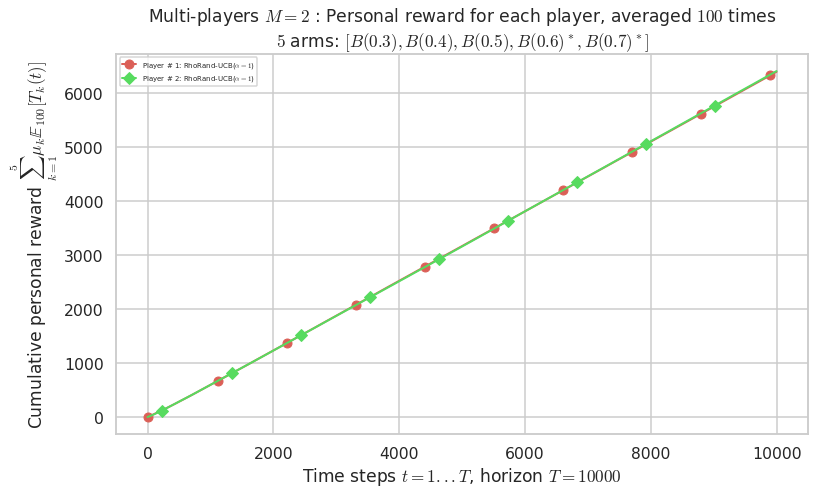

/home/lilian/ownCloud/owncloud.crans.org/Crans/These_2016-17/src/SMPyBandits/notebooks/venv3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


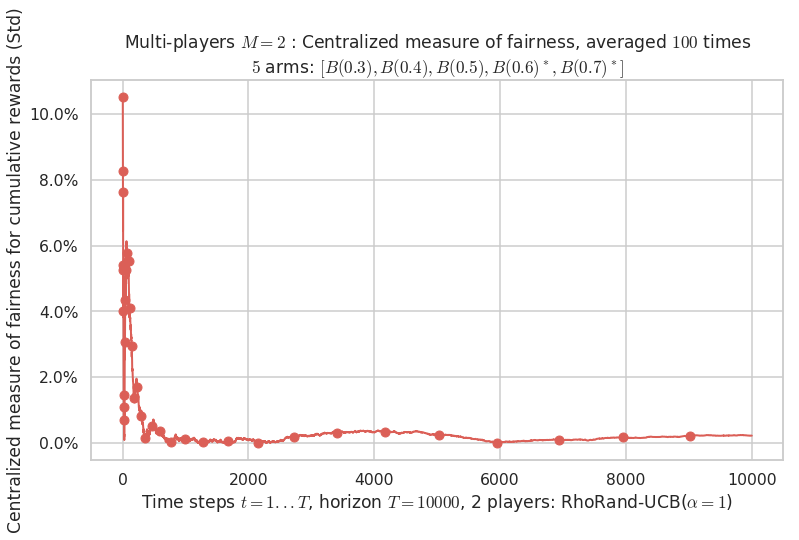

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


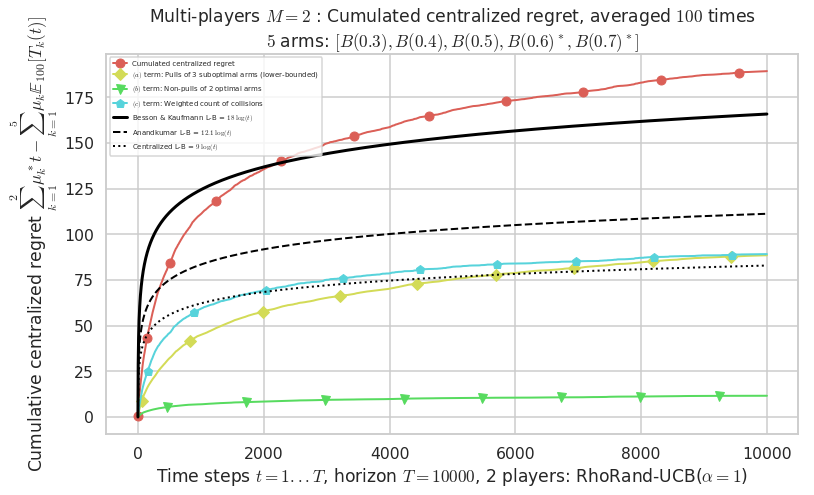

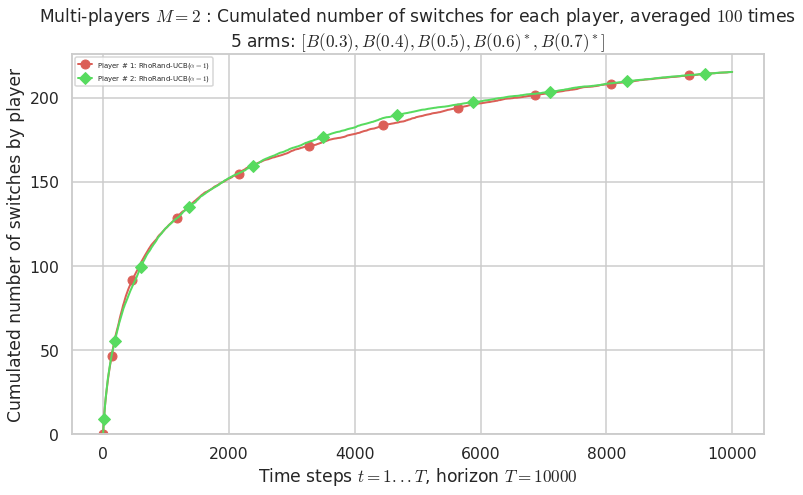

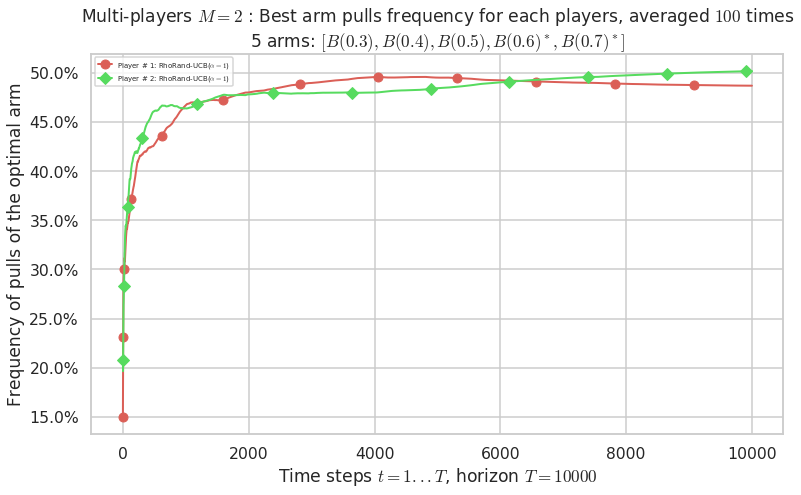

No upper bound for the non-cumulated number of collisions...


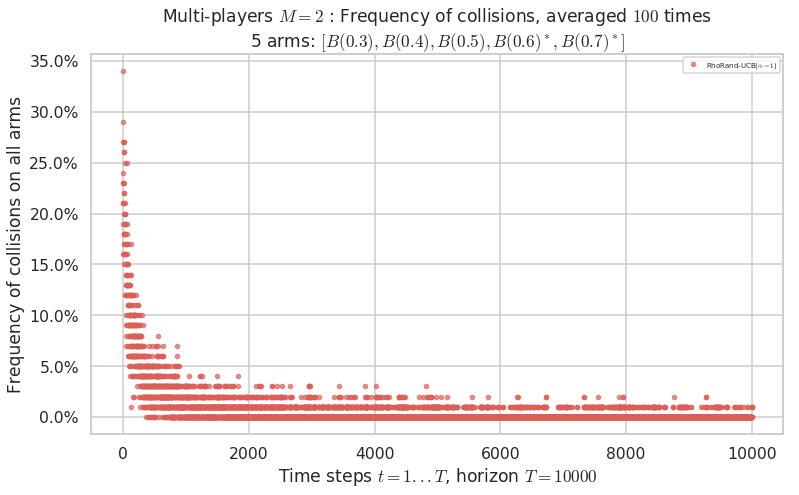

No upper bound for the non-cumulated number of collisions...


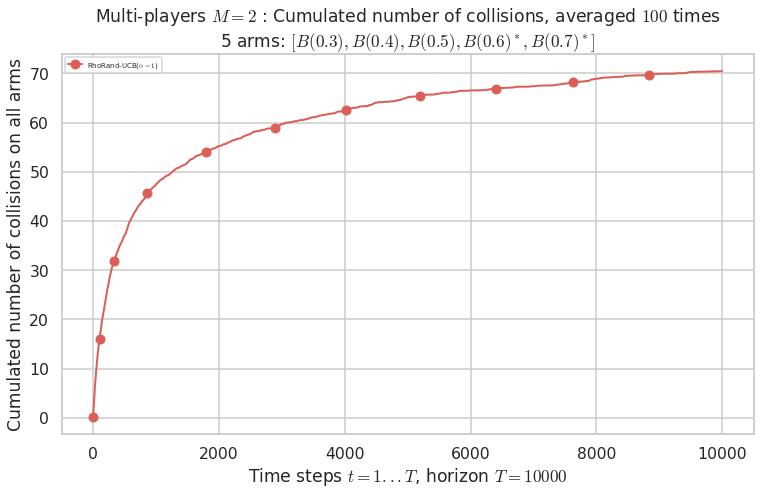

  - For #$0$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 0.000132  ...
  - For #$1$: $B(0.4)$ ($0.0%$$\%$),	frequency of collisions is 0.000192  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000473  ...
  - For #$3$: $B(0.6)$ ($0.3%$$\%$),	frequency of collisions is 0.002693  ...
  - For #$4$: $B(0.7)$ ($0.4%$$\%$),	frequency of collisions is 0.003555  ...


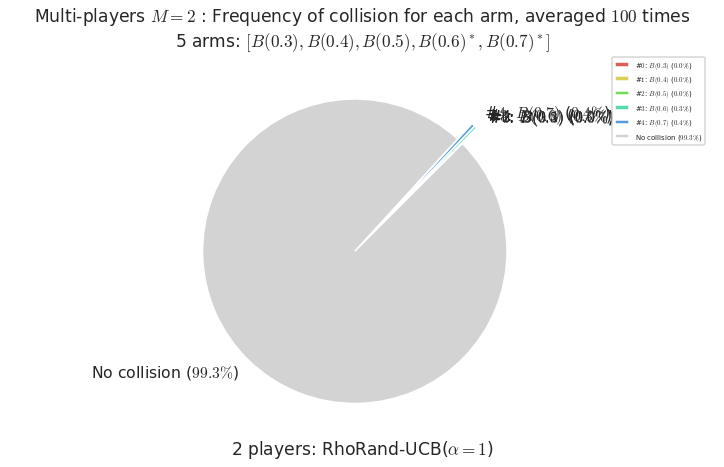


Final ranking for this environment # 0 : Selfish-UCB($\alpha=1$) ...
- Player # 1 / 2, Selfish-UCB($\alpha=1$)	was ranked	1 / 2 for this simulation (last rewards = 6448.1).
- Player # 2 / 2, Selfish-UCB($\alpha=1$)	was ranked	2 / 2 for this simulation (last rewards = 6348.2).


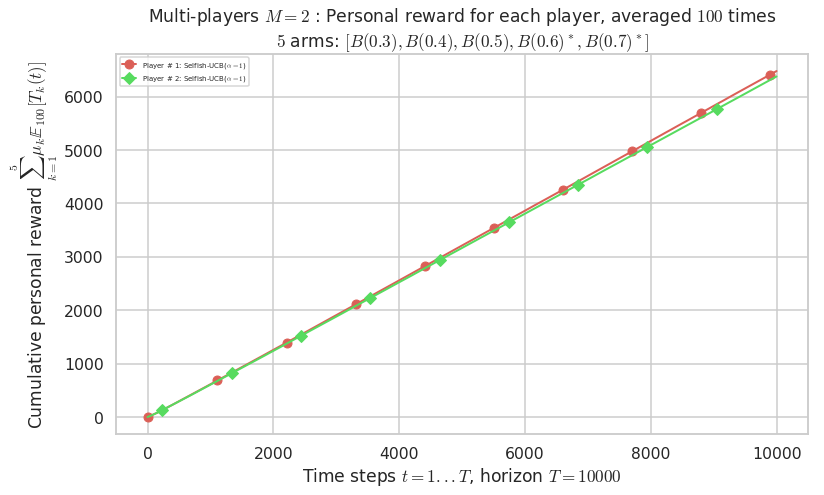

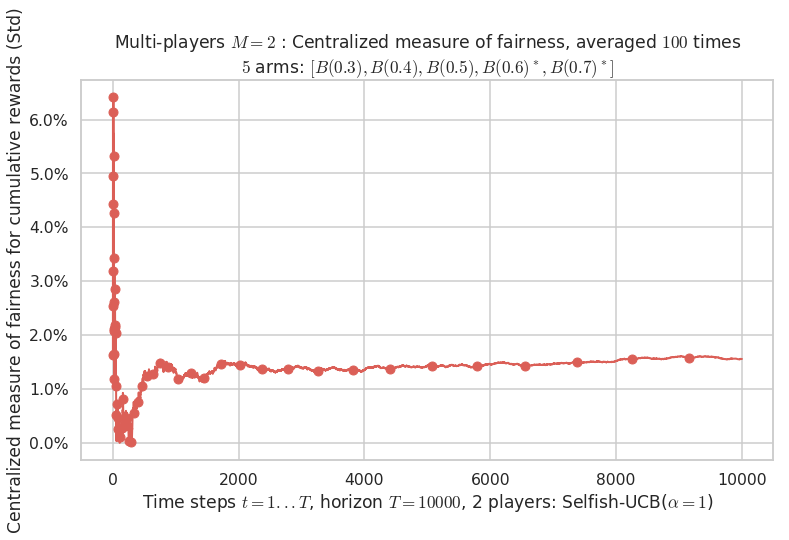

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


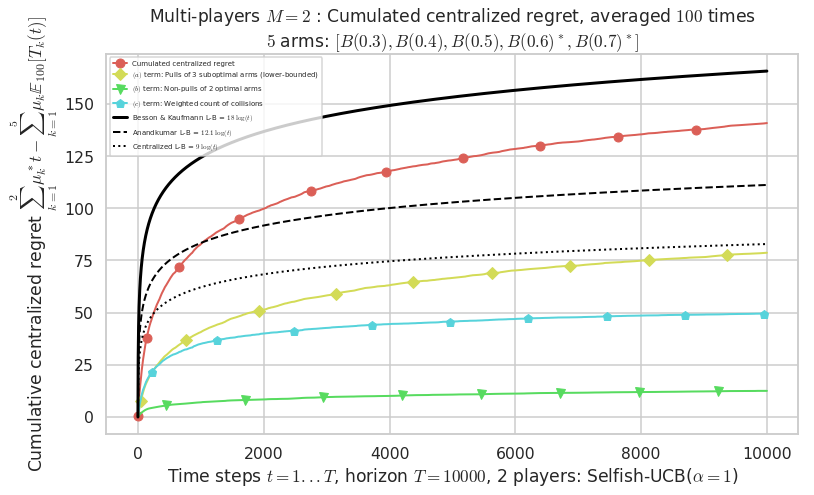

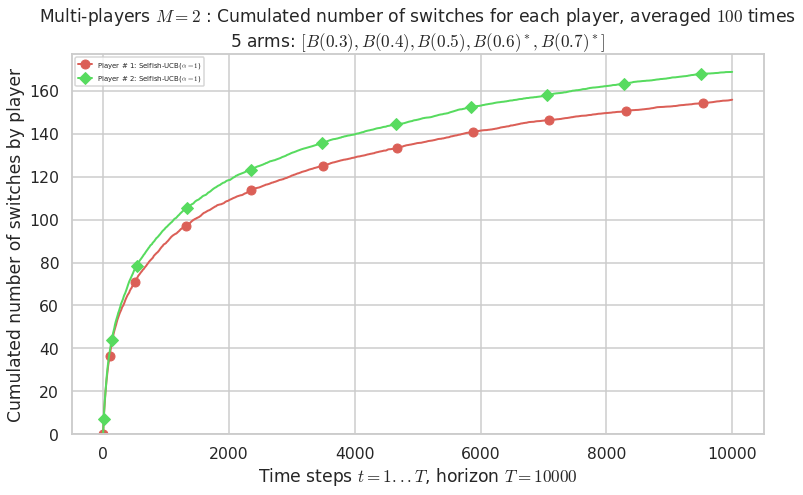

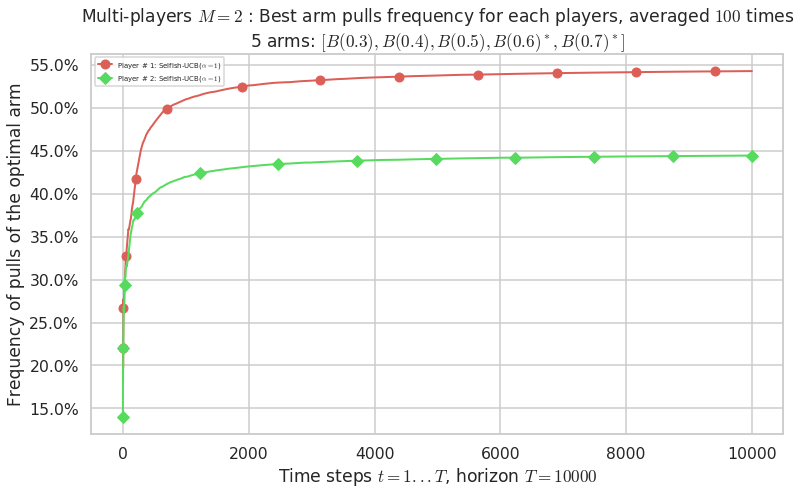

No upper bound for the non-cumulated number of collisions...


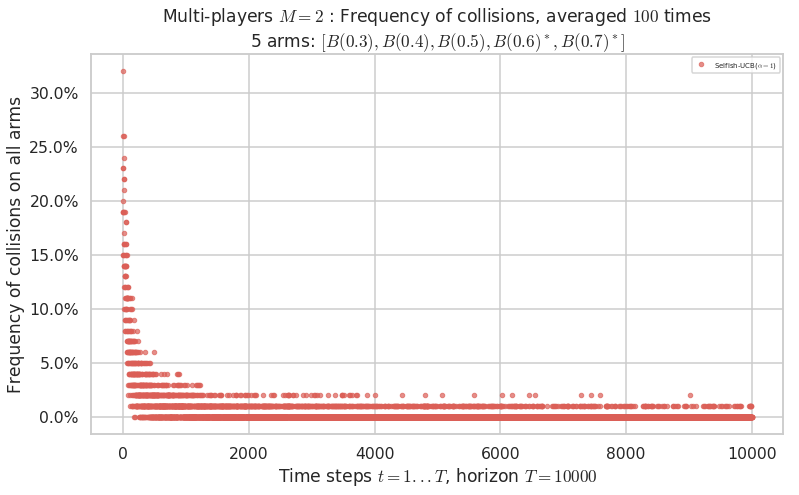

No upper bound for the non-cumulated number of collisions...


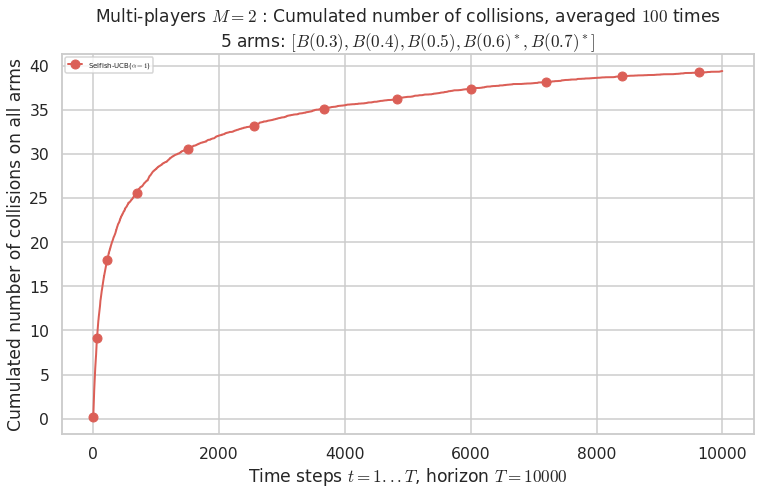

  - For #$0$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 0.000109  ...
  - For #$1$: $B(0.4)$ ($0.0%$$\%$),	frequency of collisions is 0.000181  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000331  ...
  - For #$3$: $B(0.6)$ ($0.1%$$\%$),	frequency of collisions is 0.001118  ...
  - For #$4$: $B(0.7)$ ($0.2%$$\%$),	frequency of collisions is 0.002199  ...


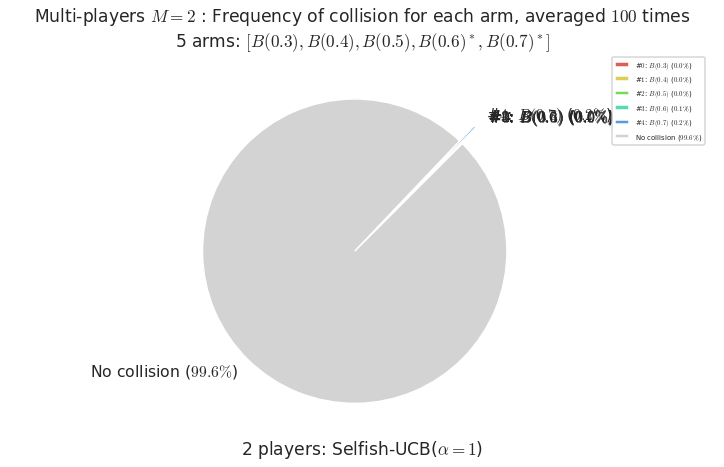


Final ranking for this environment # 0 : RhoRand-Thompson ...
- Player # 1 / 2, RhoRand-Thompson	was ranked	1 / 2 for this simulation (last rewards = 6369.6).
- Player # 2 / 2, RhoRand-Thompson	was ranked	2 / 2 for this simulation (last rewards = 6267.1).


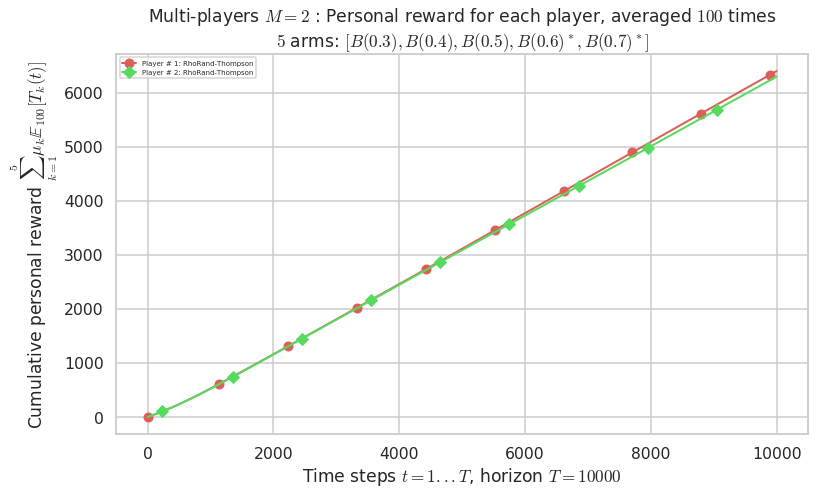

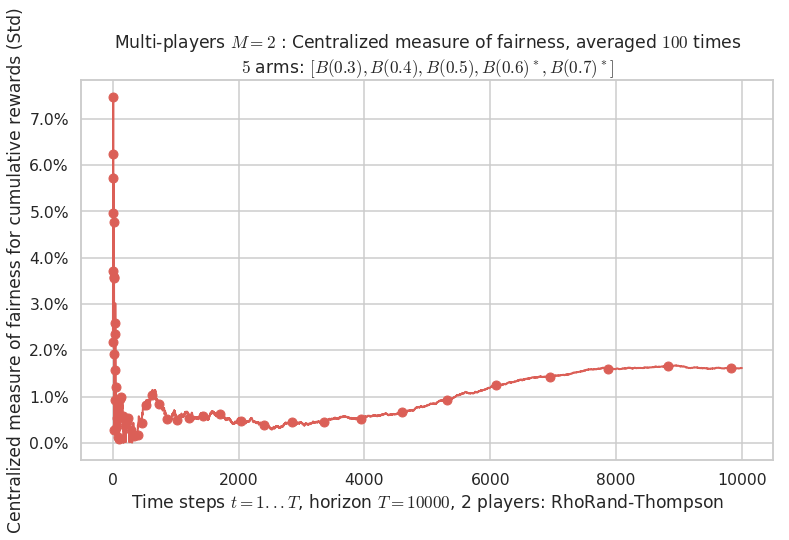

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


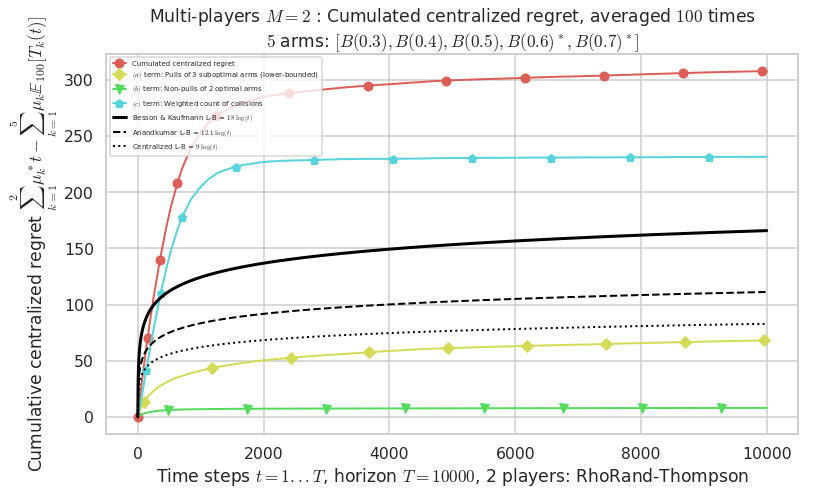

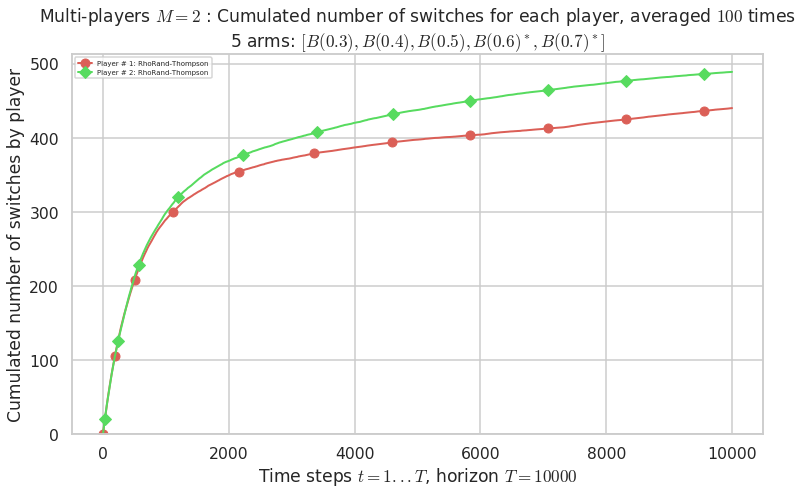

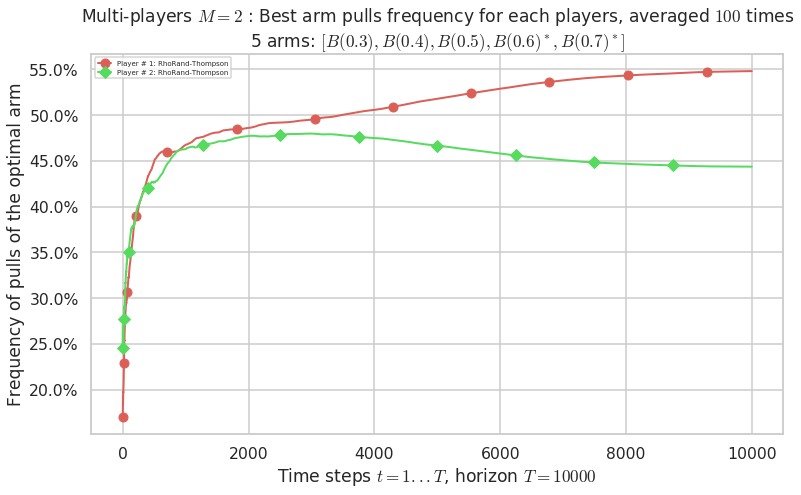

No upper bound for the non-cumulated number of collisions...


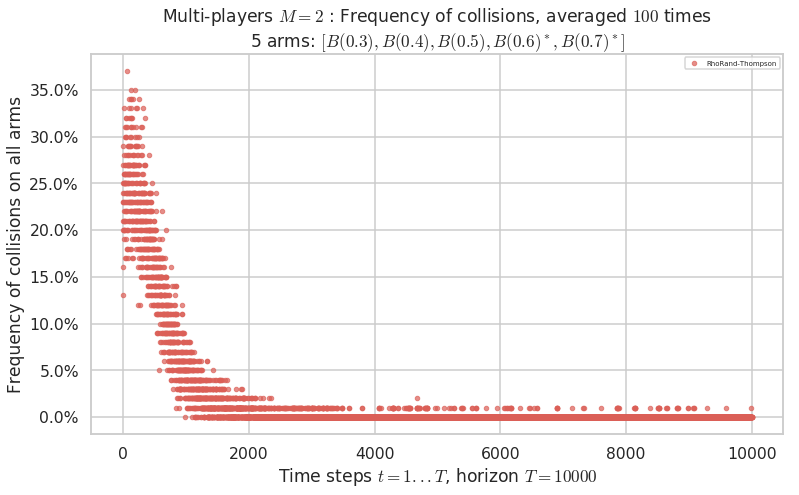

No upper bound for the non-cumulated number of collisions...


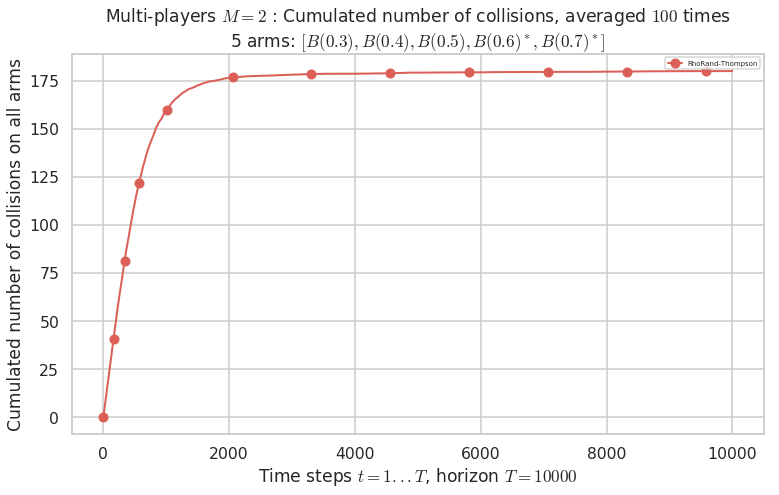

  - For #$0$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 0.000108  ...
  - For #$1$: $B(0.4)$ ($0.0%$$\%$),	frequency of collisions is 0.000226  ...
  - For #$2$: $B(0.5)$ ($0.1%$$\%$),	frequency of collisions is 0.000793  ...
  - For #$3$: $B(0.6)$ ($0.8%$$\%$),	frequency of collisions is 0.007542  ...
  - For #$4$: $B(0.7)$ ($0.9%$$\%$),	frequency of collisions is 0.009321  ...


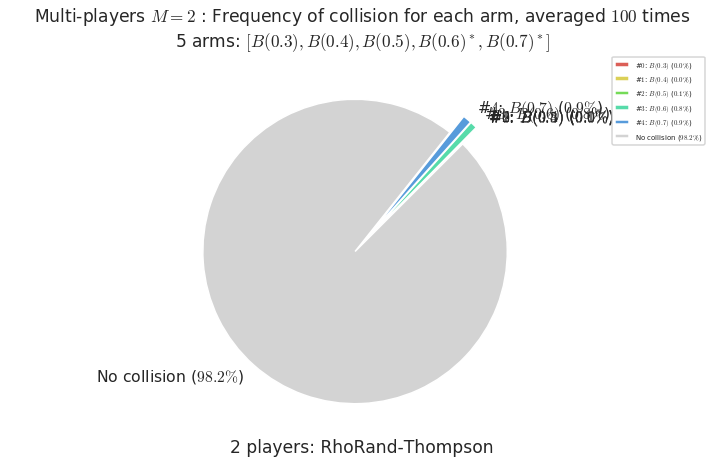


Final ranking for this environment # 0 : Selfish-Thompson ...
- Player # 1 / 2, Selfish-Thompson	was ranked	1 / 2 for this simulation (last rewards = 6498.6).
- Player # 2 / 2, Selfish-Thompson	was ranked	2 / 2 for this simulation (last rewards = 6347.1).


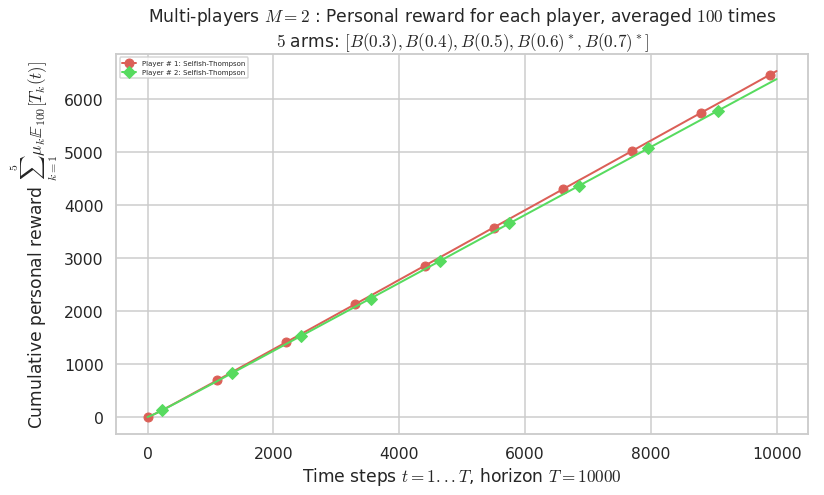

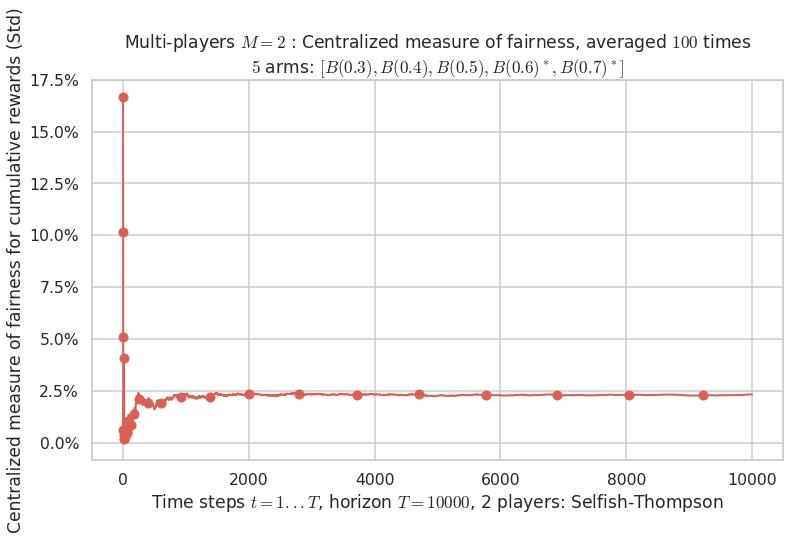

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


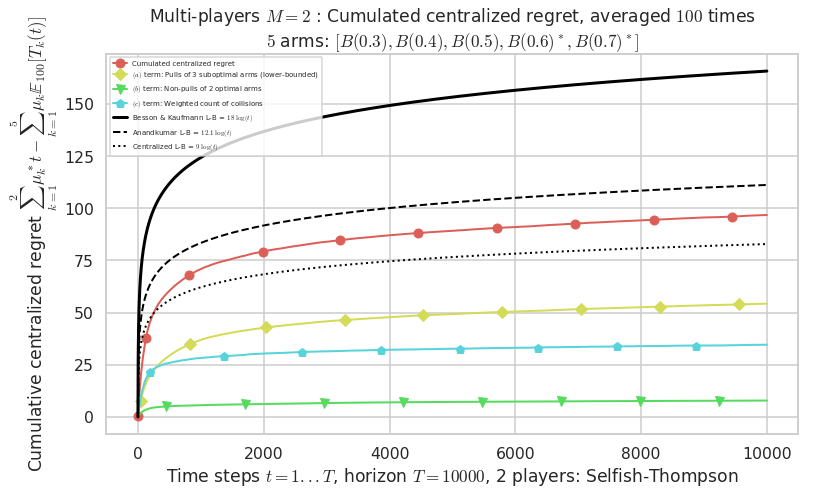

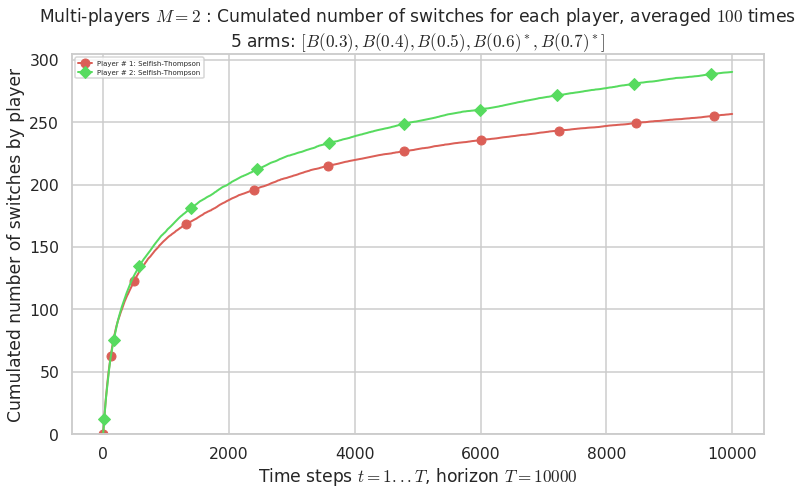

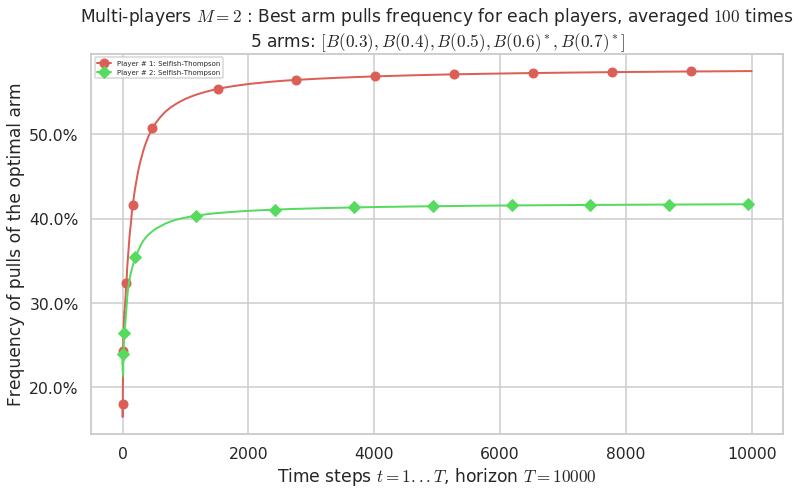

No upper bound for the non-cumulated number of collisions...


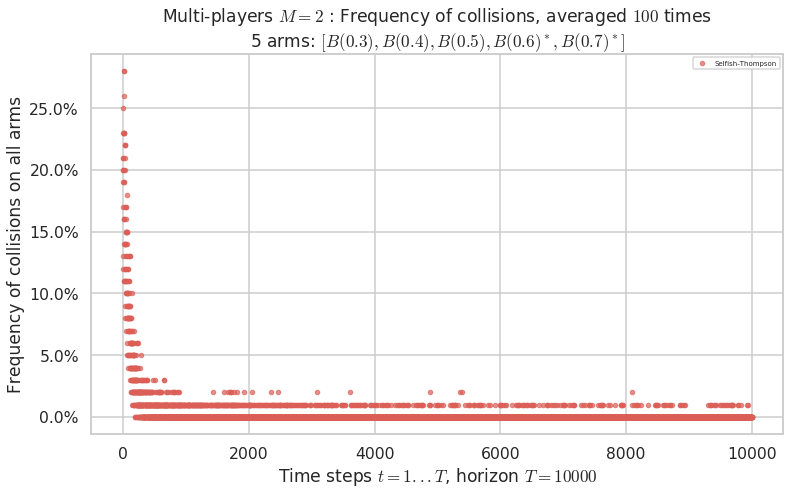

No upper bound for the non-cumulated number of collisions...


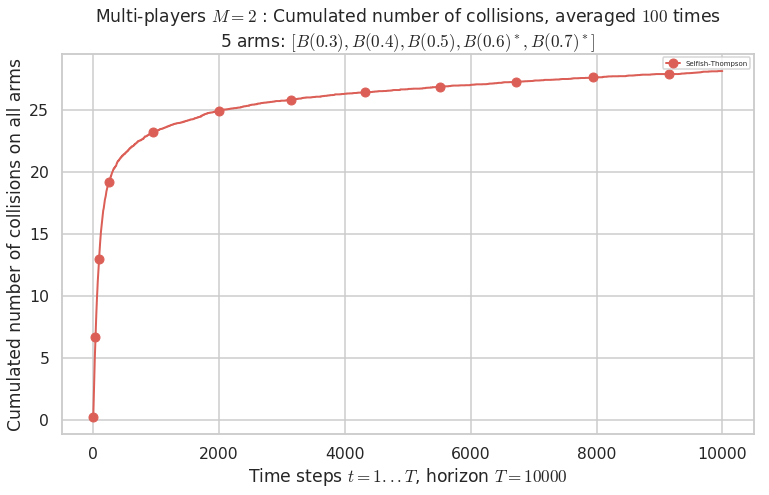

  - For #$0$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 0.000107  ...
  - For #$1$: $B(0.4)$ ($0.0%$$\%$),	frequency of collisions is 0.000153  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000326  ...
  - For #$3$: $B(0.6)$ ($0.1%$$\%$),	frequency of collisions is 0.000851  ...
  - For #$4$: $B(0.7)$ ($0.1%$$\%$),	frequency of collisions is 0.001377  ...


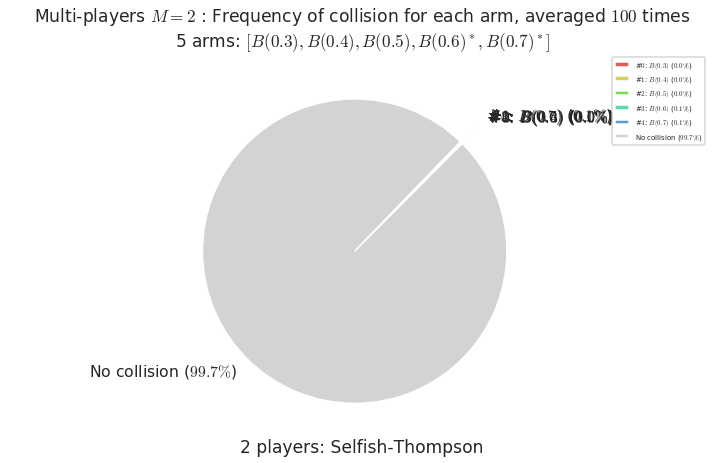


Final ranking for this environment # 0 : RhoRand-kl-UCB ...
- Player # 1 / 2, RhoRand-kl-UCB	was ranked	1 / 2 for this simulation (last rewards = 6410.4).
- Player # 2 / 2, RhoRand-kl-UCB	was ranked	2 / 2 for this simulation (last rewards = 6356.7).


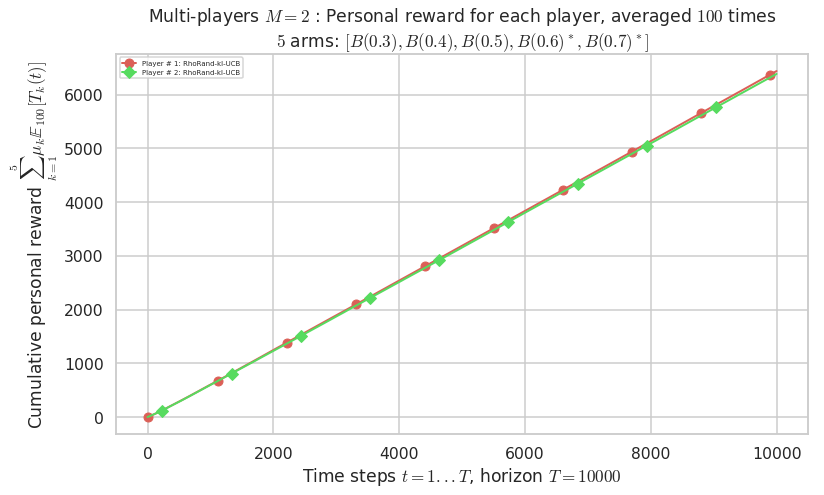

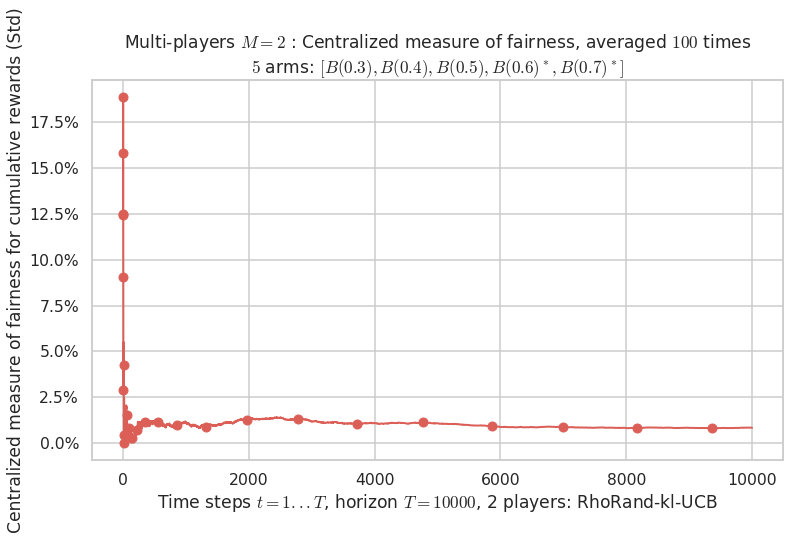

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


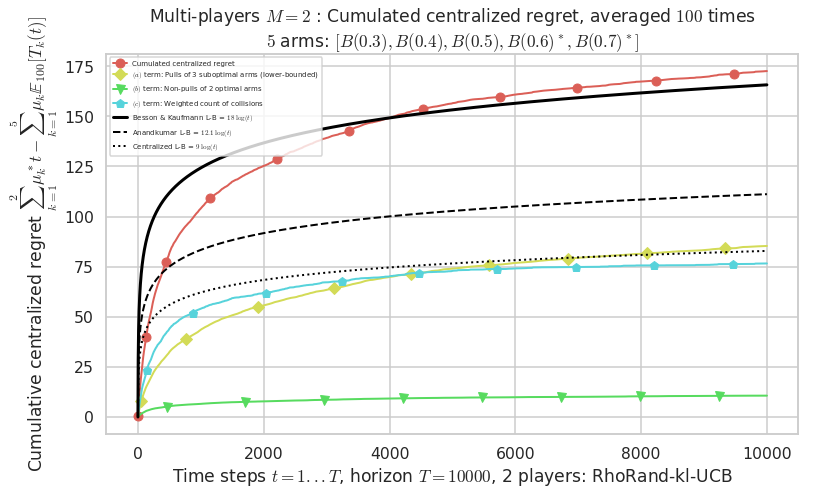

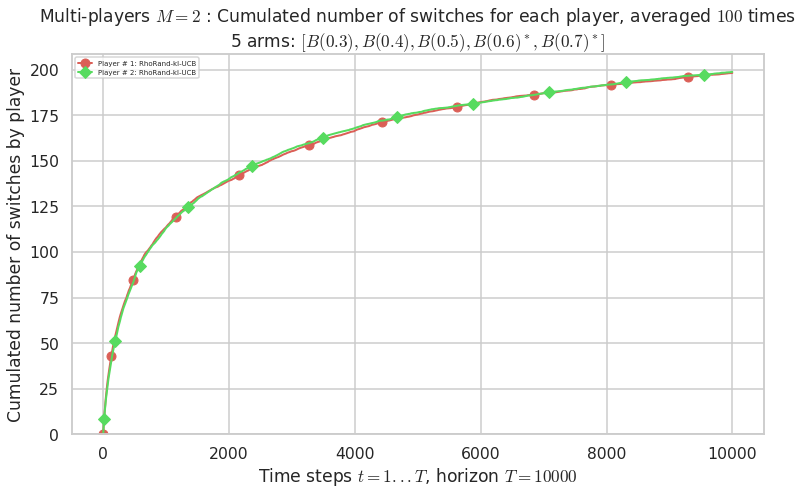

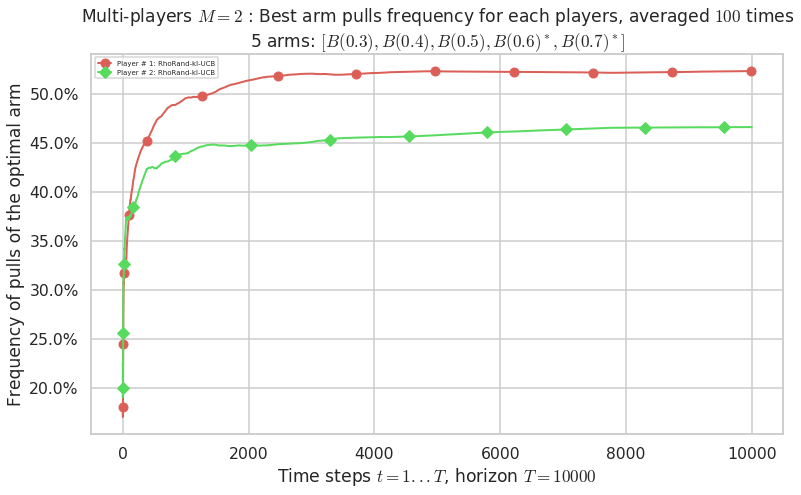

No upper bound for the non-cumulated number of collisions...


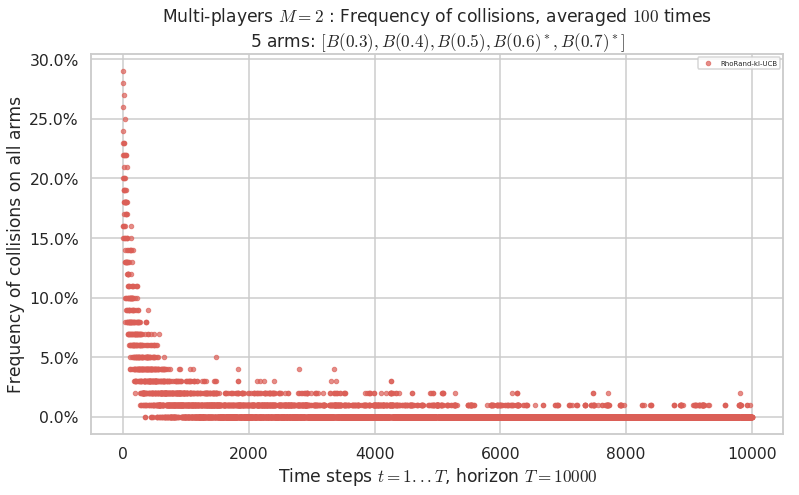

No upper bound for the non-cumulated number of collisions...


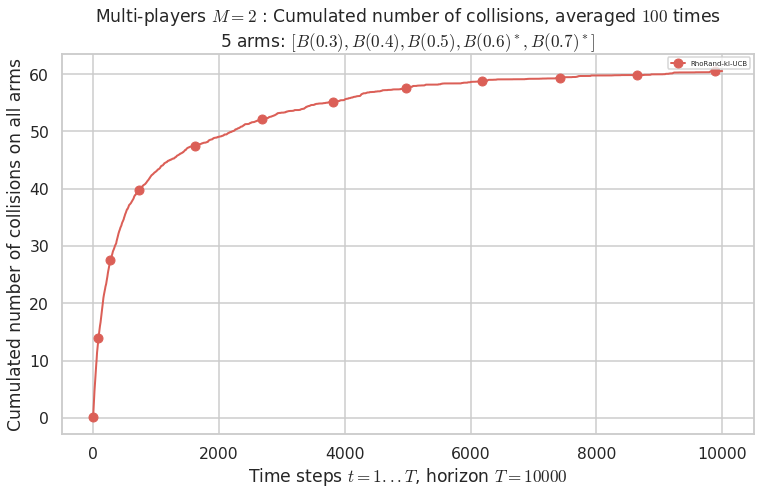

  - For #$0$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 0.000109  ...
  - For #$1$: $B(0.4)$ ($0.0%$$\%$),	frequency of collisions is 0.000178  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000423  ...
  - For #$3$: $B(0.6)$ ($0.2%$$\%$),	frequency of collisions is 0.002254  ...
  - For #$4$: $B(0.7)$ ($0.3%$$\%$),	frequency of collisions is 0.00309  ...


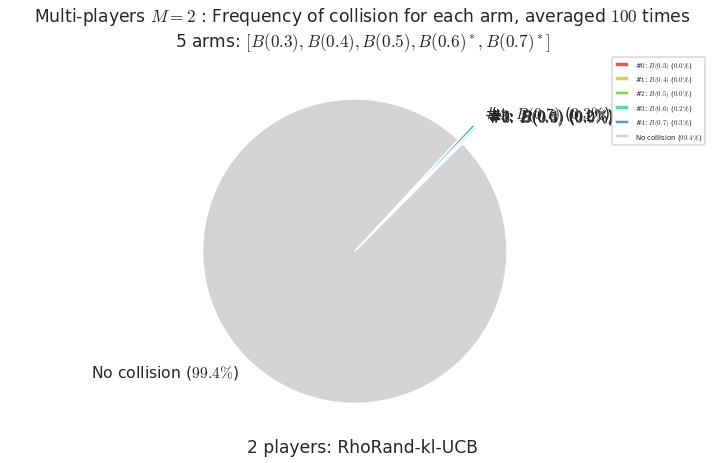


Final ranking for this environment # 0 : Selfish-kl-UCB ...
- Player # 1 / 2, Selfish-kl-UCB	was ranked	1 / 2 for this simulation (last rewards = 6418.6).
- Player # 2 / 2, Selfish-kl-UCB	was ranked	2 / 2 for this simulation (last rewards = 6388.8).


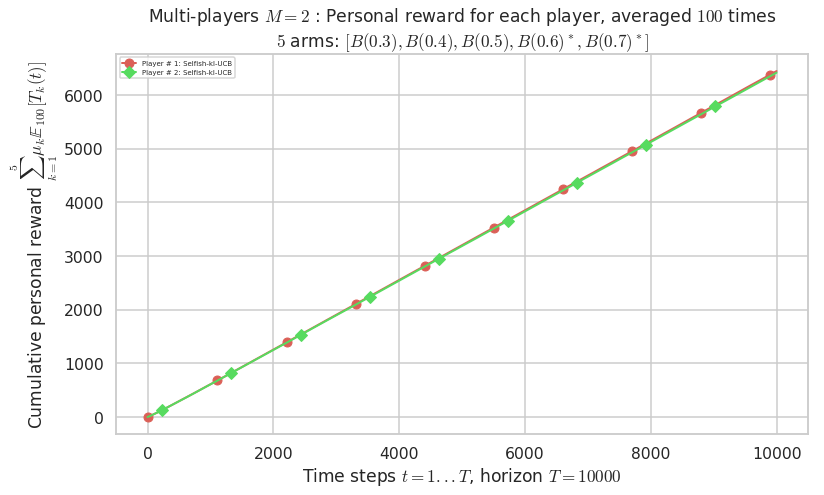

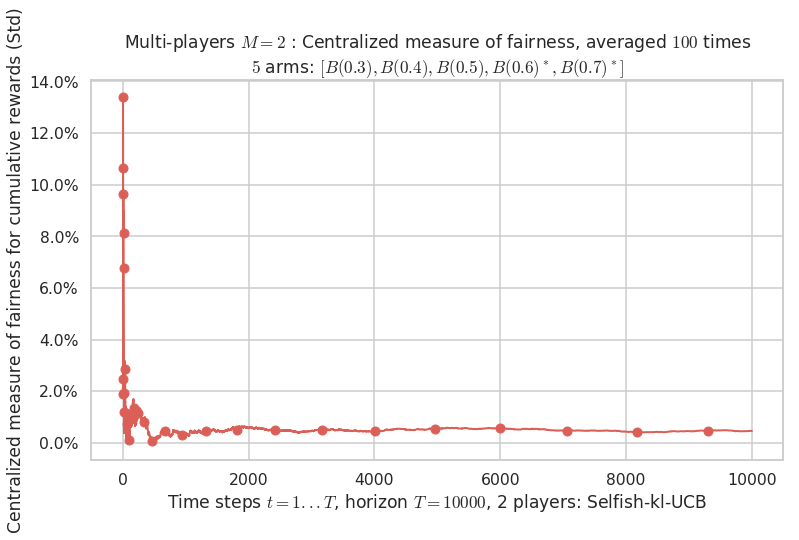

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


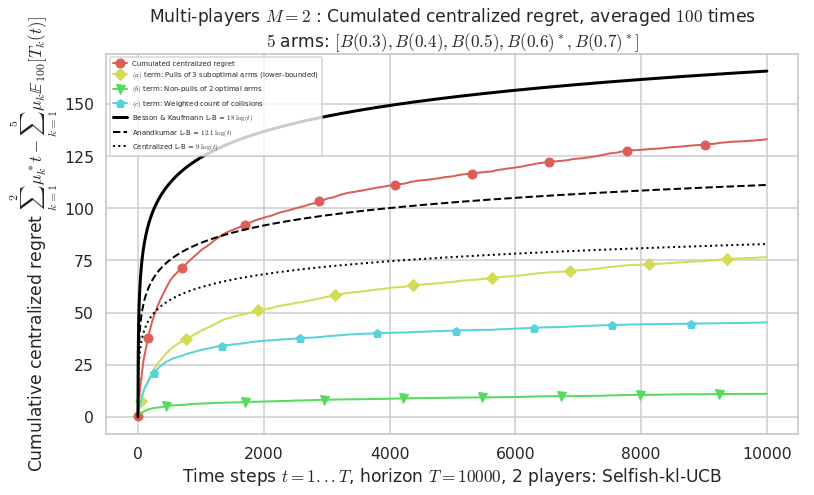

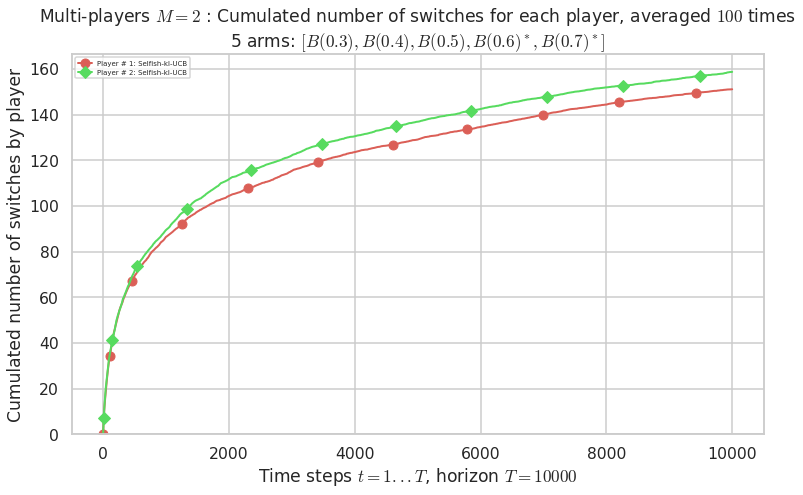

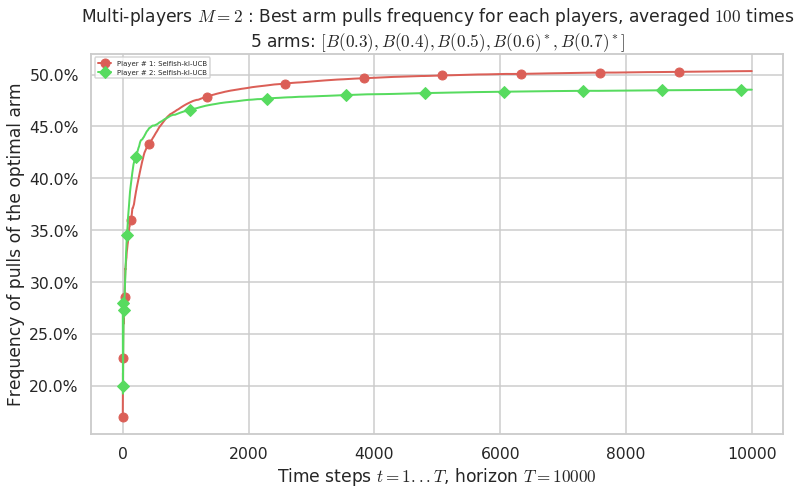

No upper bound for the non-cumulated number of collisions...


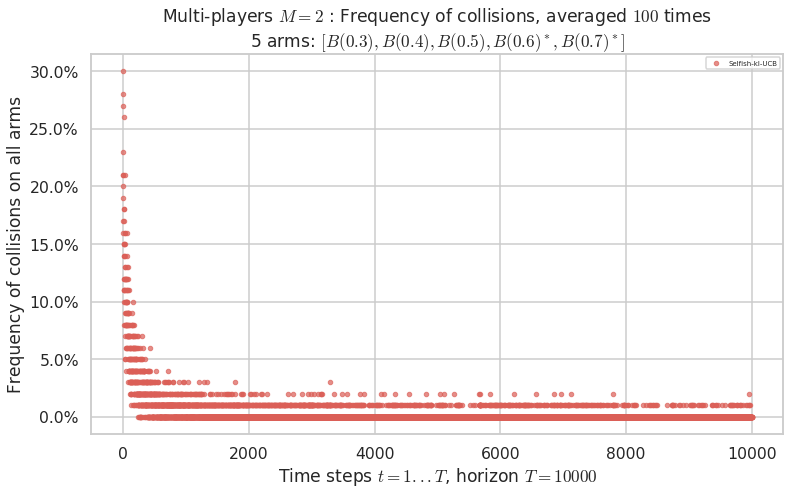

No upper bound for the non-cumulated number of collisions...


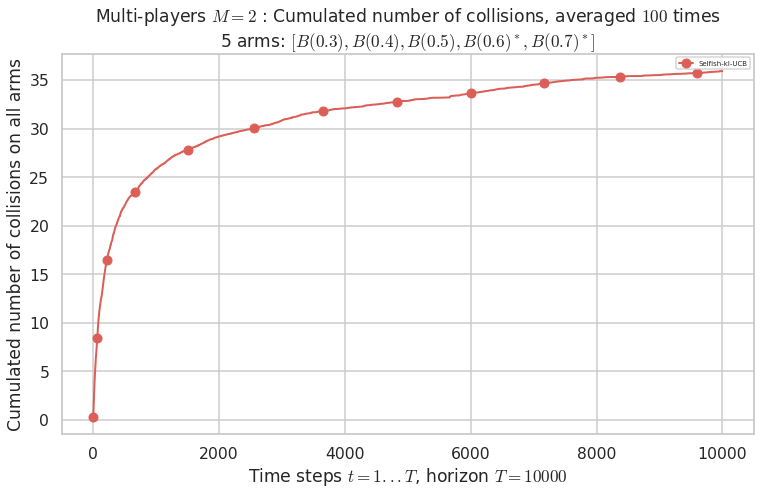

  - For #$0$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 9.6e-05  ...
  - For #$1$: $B(0.4)$ ($0.0%$$\%$),	frequency of collisions is 0.000152  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000278  ...
  - For #$3$: $B(0.6)$ ($0.1%$$\%$),	frequency of collisions is 0.001086  ...
  - For #$4$: $B(0.7)$ ($0.2%$$\%$),	frequency of collisions is 0.00198  ...


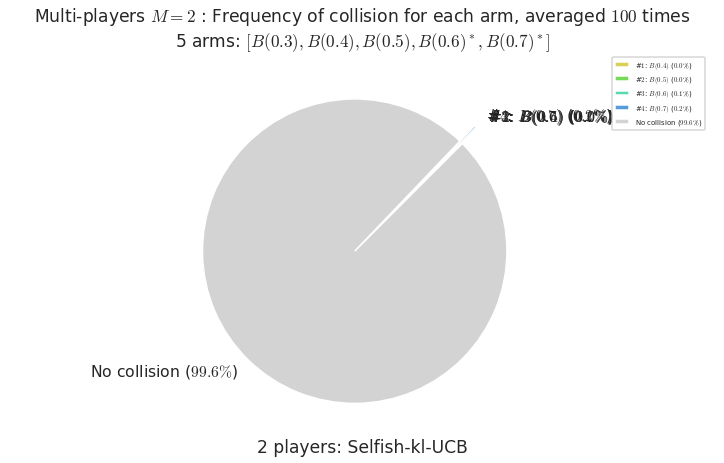

In [30]:
for playersId in tqdm(range(len(evs)), desc="Policies"):
    evaluation = evaluators[0][playersId]
    plotAll(evaluation, 0)

### Second problem
$\mu = [0.1, 0.3, 0.5, 0.7, 0.9]$ was an easier Bernoulli problem, with larger gap $\Delta = 0.2$.


Final ranking for this environment # 1 : RhoRand-UCB($\alpha=1$) ...
- Player # 2 / 2, RhoRand-UCB($\alpha=1$)	was ranked	1 / 2 for this simulation (last rewards = 8048).
- Player # 1 / 2, RhoRand-UCB($\alpha=1$)	was ranked	2 / 2 for this simulation (last rewards = 7784.3).


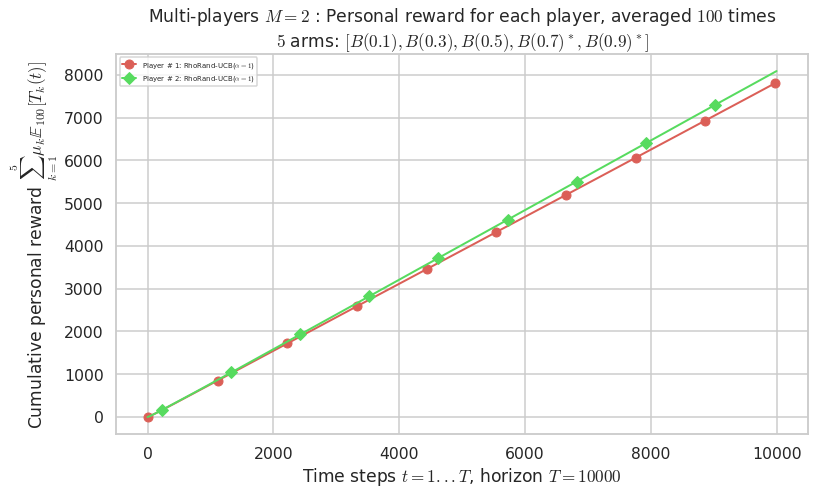

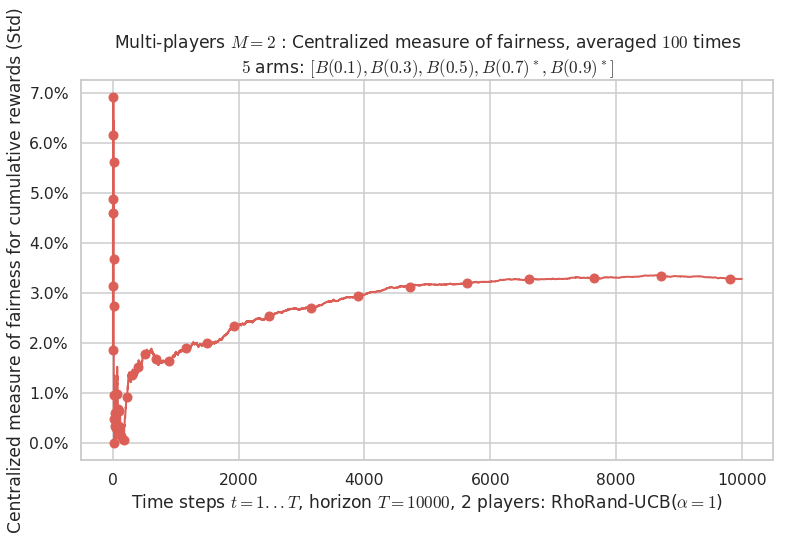

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


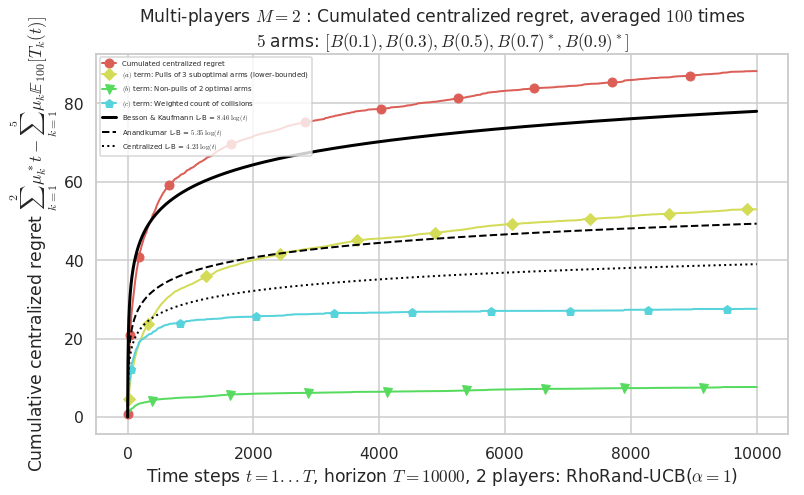

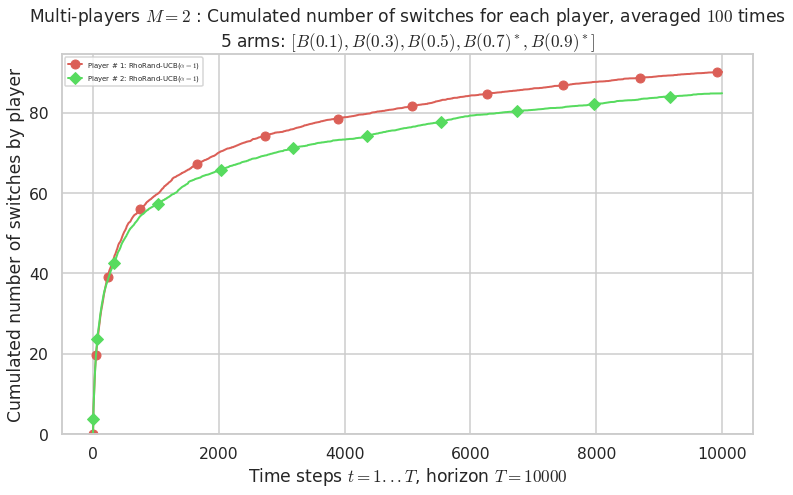

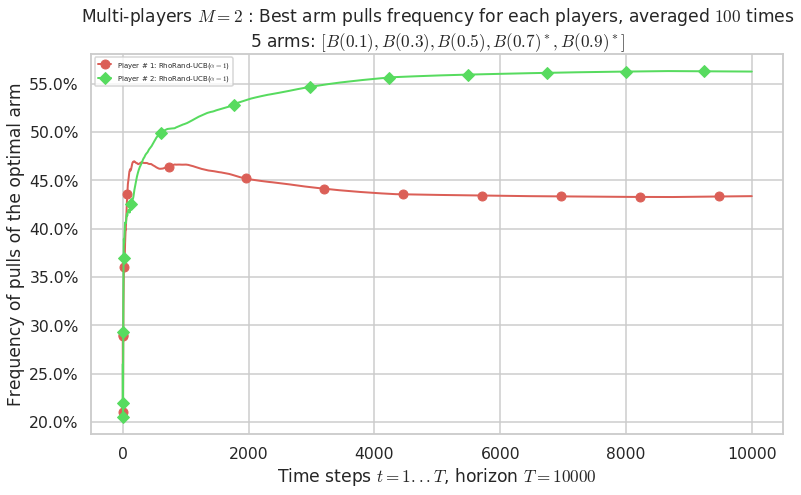

No upper bound for the non-cumulated number of collisions...


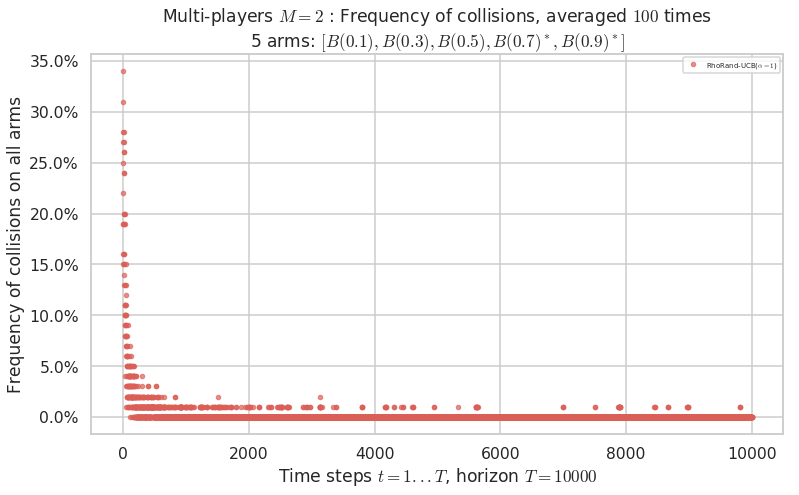

No upper bound for the non-cumulated number of collisions...


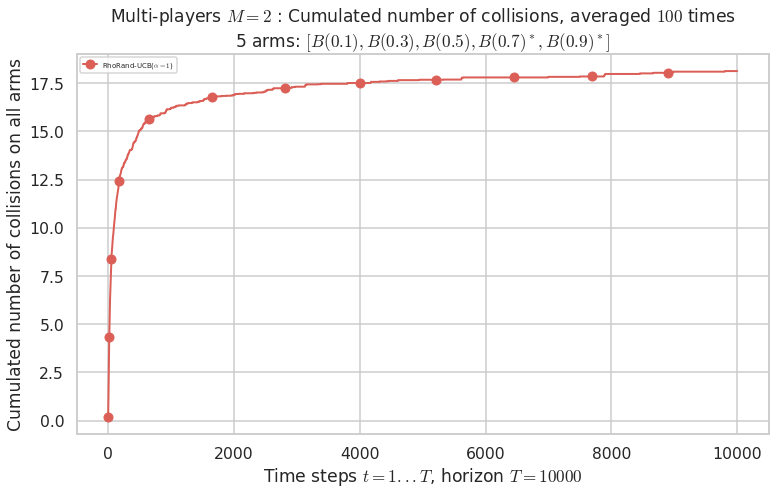

  - For #$0$: $B(0.1)$ ($0.0%$$\%$),	frequency of collisions is 2.3e-05  ...
  - For #$1$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 5.3e-05  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000152  ...
  - For #$3$: $B(0.7)$ ($0.1%$$\%$),	frequency of collisions is 0.00071  ...
  - For #$4$: $B(0.9)$ ($0.1%$$\%$),	frequency of collisions is 0.000875  ...


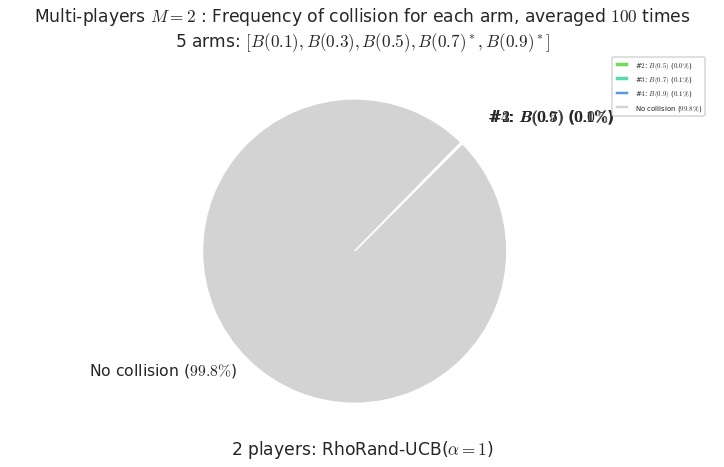


Final ranking for this environment # 1 : Selfish-UCB($\alpha=1$) ...
- Player # 2 / 2, Selfish-UCB($\alpha=1$)	was ranked	1 / 2 for this simulation (last rewards = 7930.9).
- Player # 1 / 2, Selfish-UCB($\alpha=1$)	was ranked	2 / 2 for this simulation (last rewards = 7896.6).


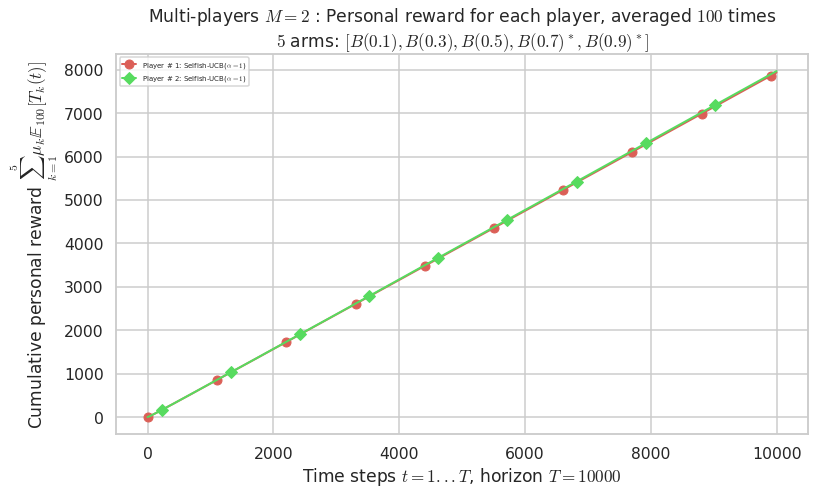

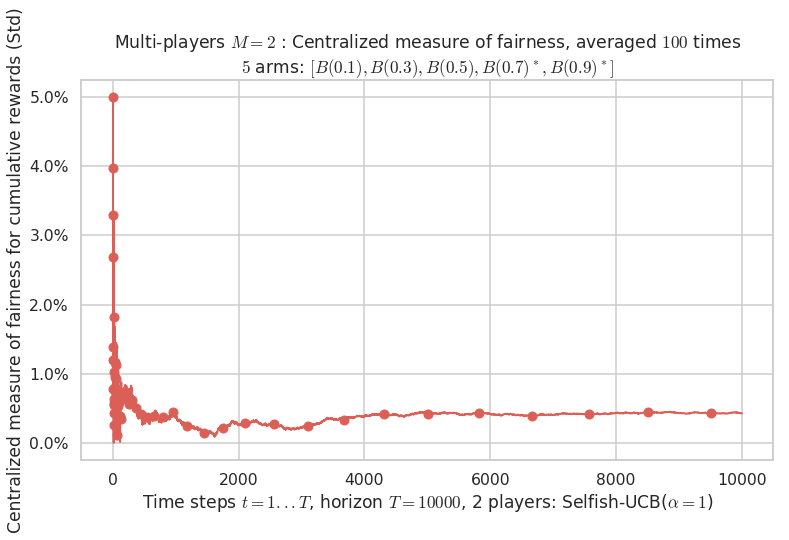

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


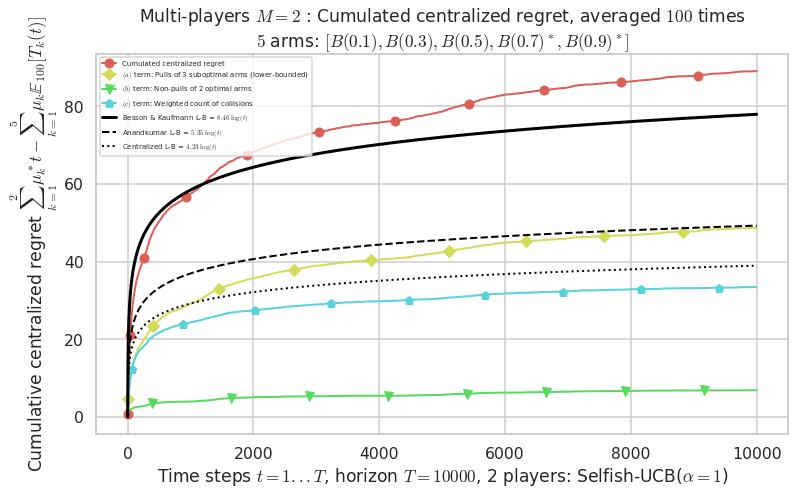

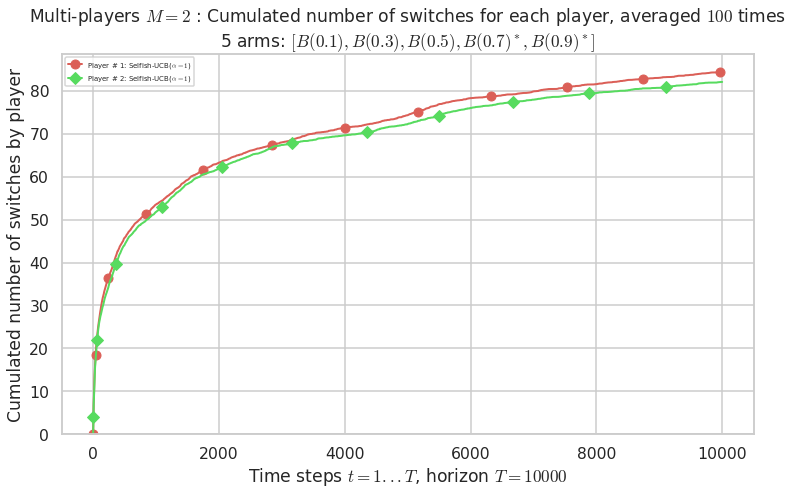

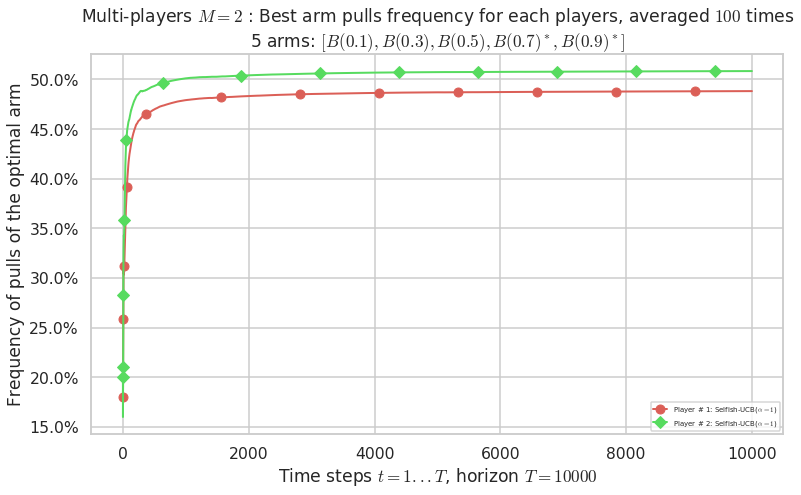

No upper bound for the non-cumulated number of collisions...


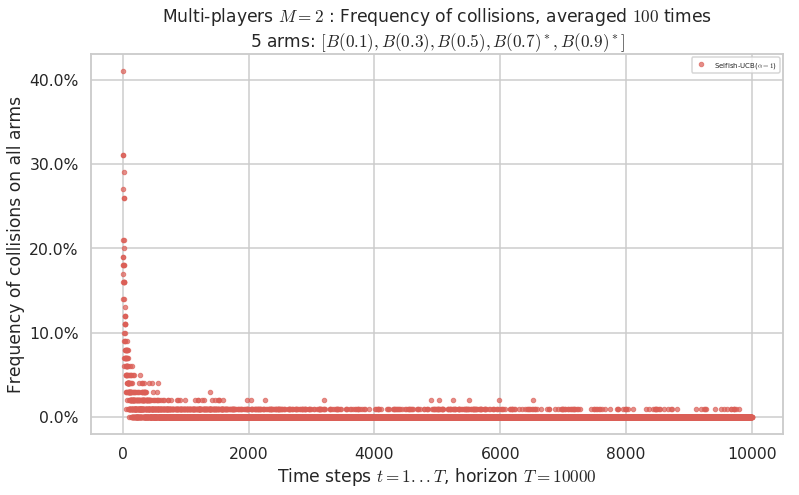

No upper bound for the non-cumulated number of collisions...


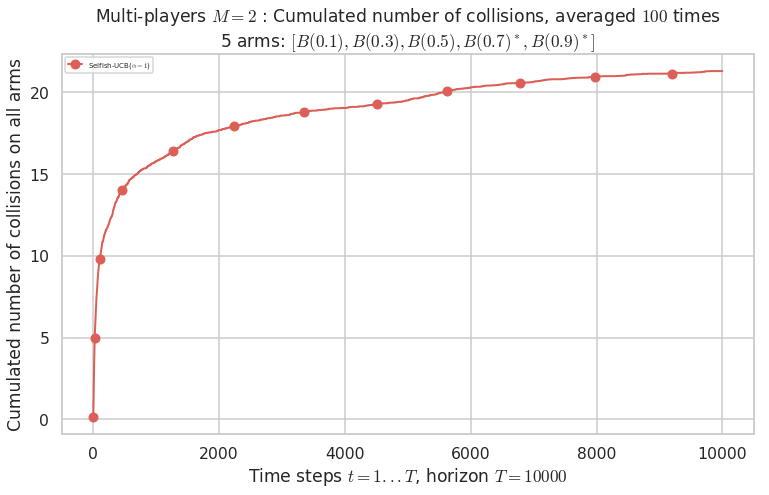

  - For #$0$: $B(0.1)$ ($0.0%$$\%$),	frequency of collisions is 4.2e-05  ...
  - For #$1$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 5.7e-05  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000136  ...
  - For #$3$: $B(0.7)$ ($0.1%$$\%$),	frequency of collisions is 0.000614  ...
  - For #$4$: $B(0.9)$ ($0.1%$$\%$),	frequency of collisions is 0.001281  ...


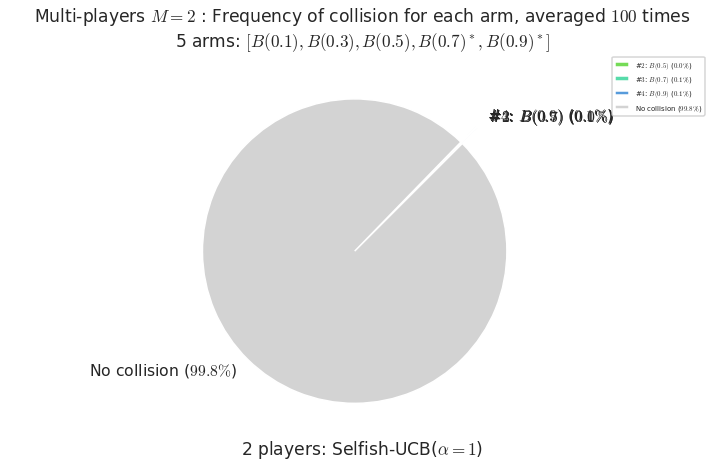


Final ranking for this environment # 1 : RhoRand-Thompson ...
- Player # 1 / 2, RhoRand-Thompson	was ranked	1 / 2 for this simulation (last rewards = 8034.6).
- Player # 2 / 2, RhoRand-Thompson	was ranked	2 / 2 for this simulation (last rewards = 7793.9).


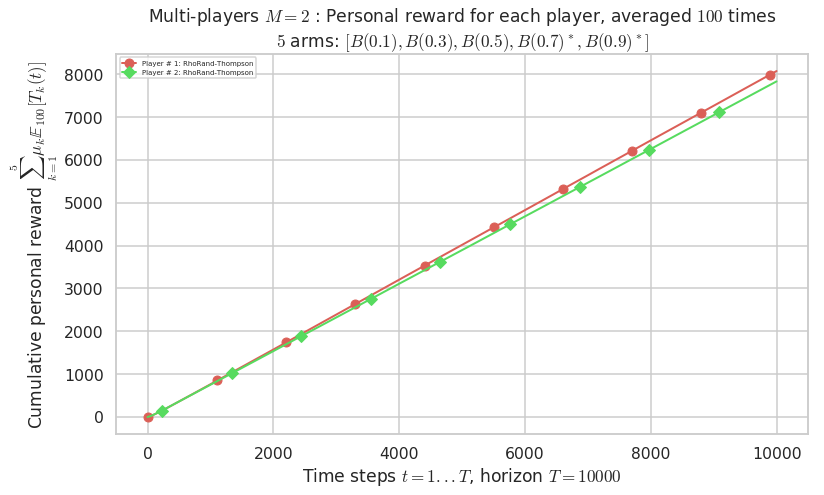

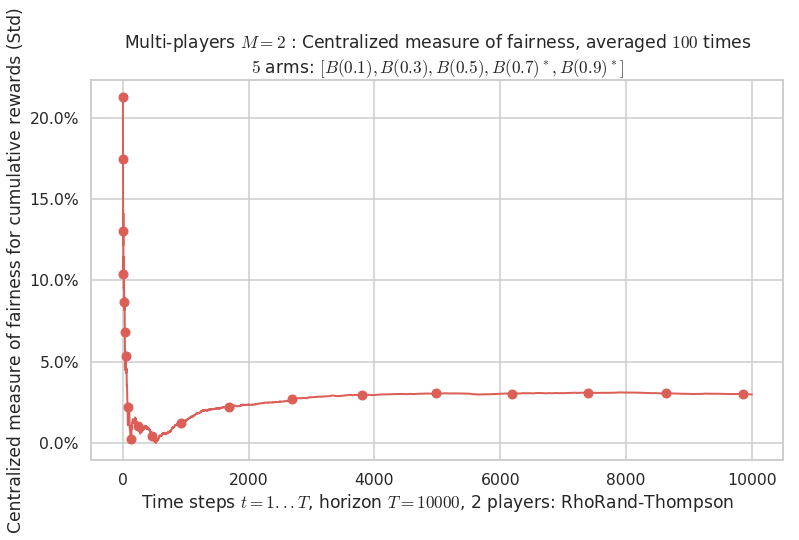

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


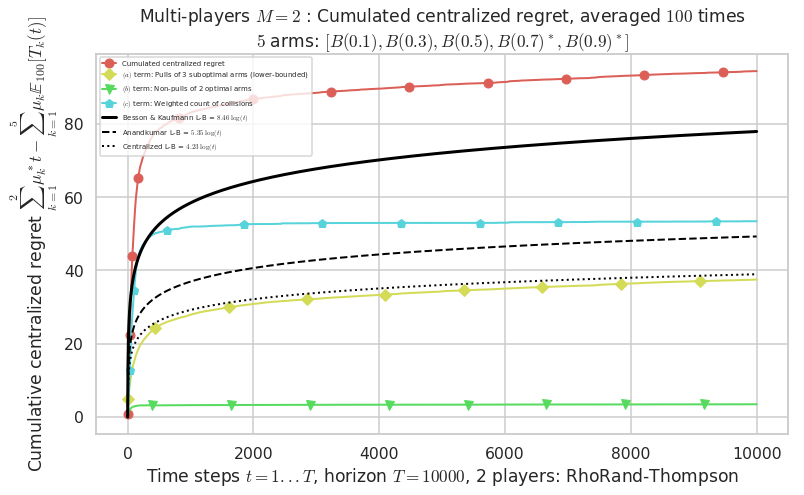

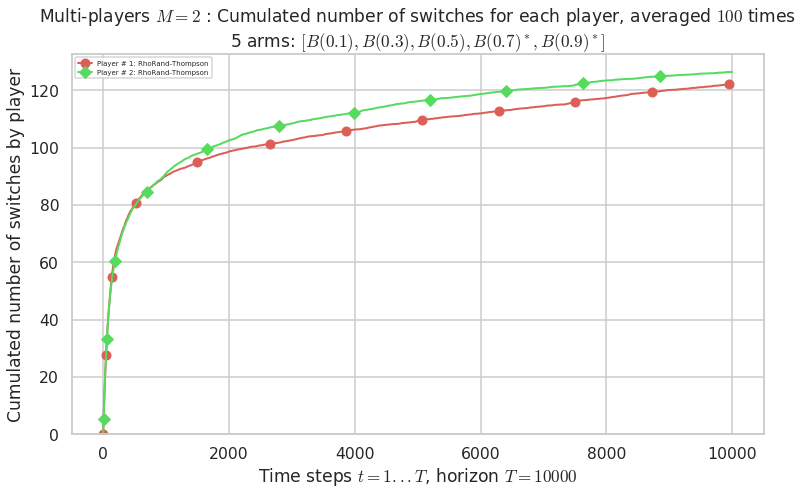

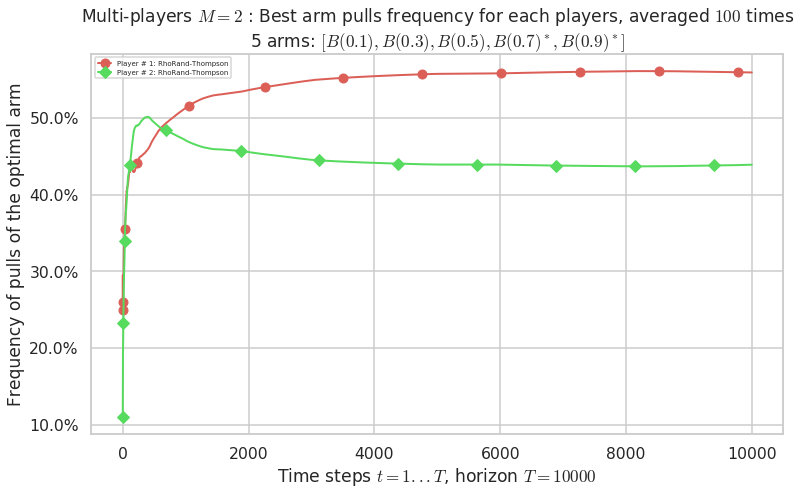

No upper bound for the non-cumulated number of collisions...


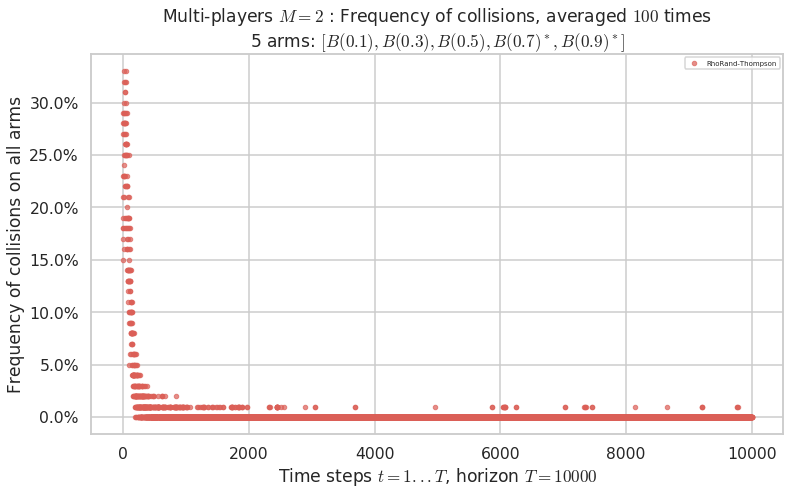

No upper bound for the non-cumulated number of collisions...


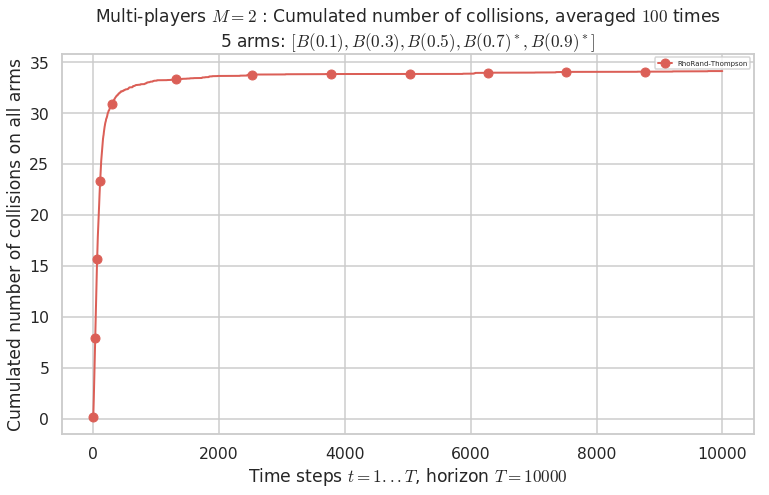

  - For #$0$: $B(0.1)$ ($0.0%$$\%$),	frequency of collisions is 3.3e-05  ...
  - For #$1$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 5.6e-05  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000146  ...
  - For #$3$: $B(0.7)$ ($0.1%$$\%$),	frequency of collisions is 0.001405  ...
  - For #$4$: $B(0.9)$ ($0.2%$$\%$),	frequency of collisions is 0.001772  ...


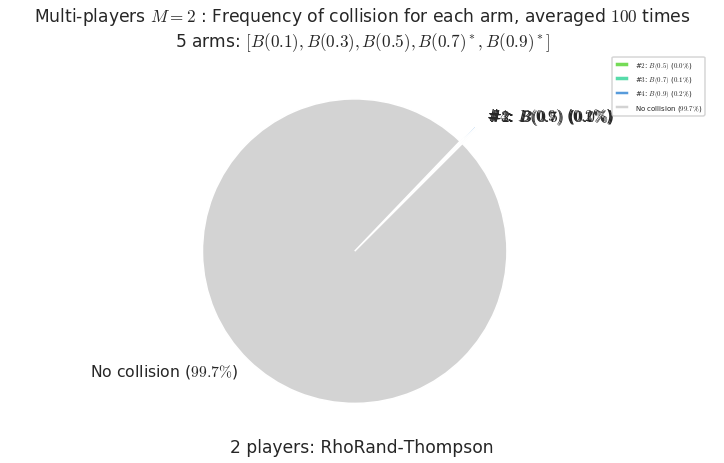


Final ranking for this environment # 1 : Selfish-Thompson ...
- Player # 2 / 2, Selfish-Thompson	was ranked	1 / 2 for this simulation (last rewards = 7950.6).
- Player # 1 / 2, Selfish-Thompson	was ranked	2 / 2 for this simulation (last rewards = 7912).


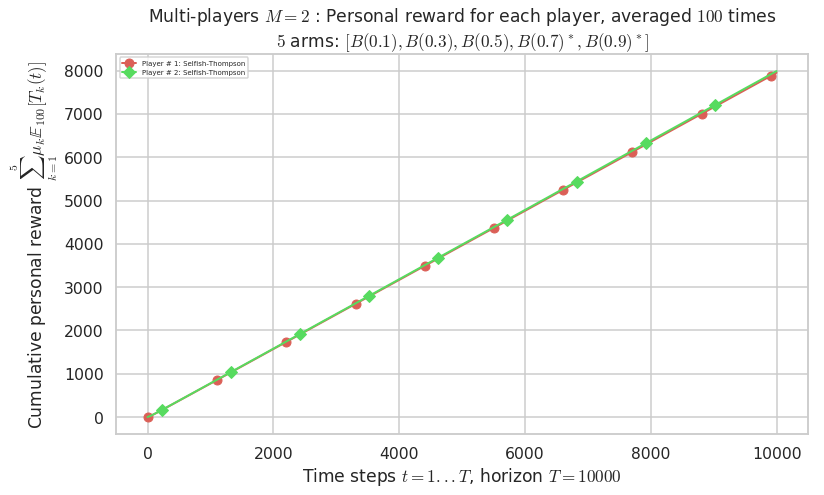

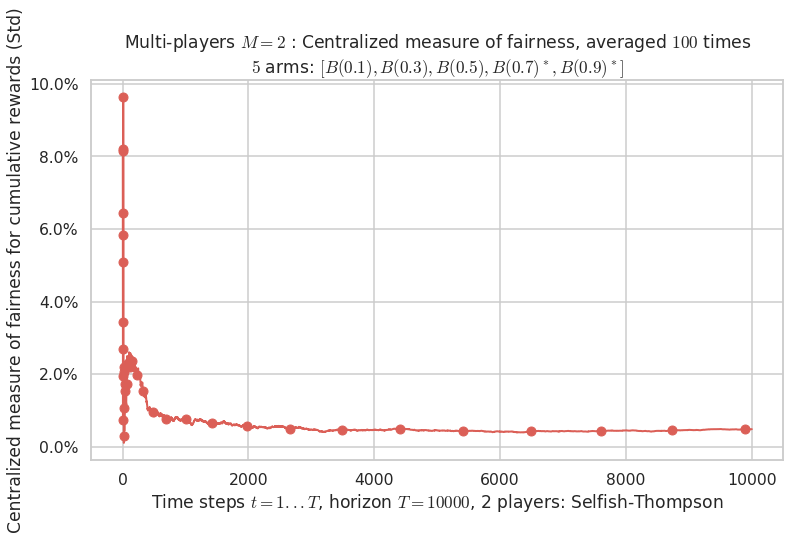

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


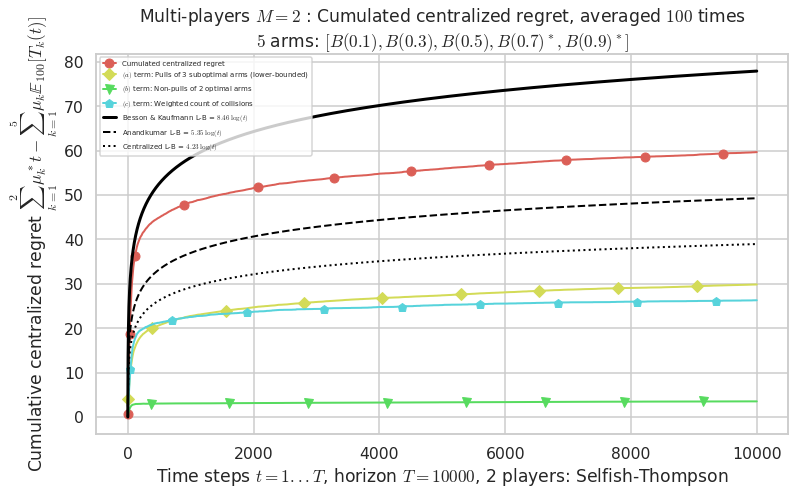

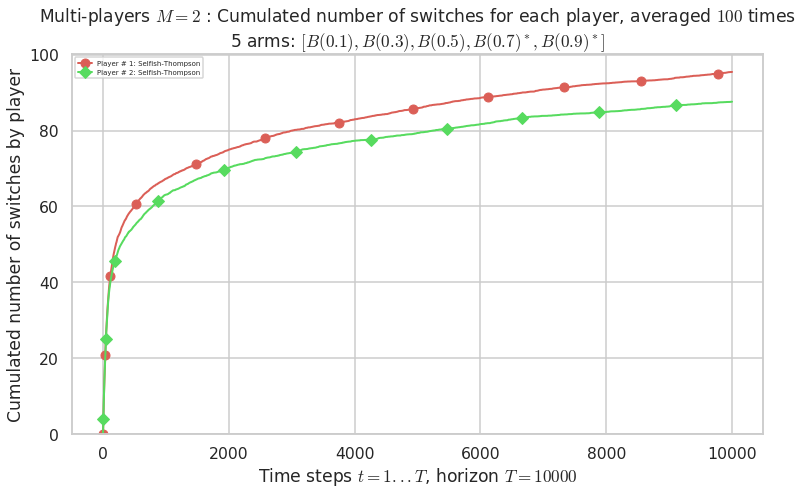

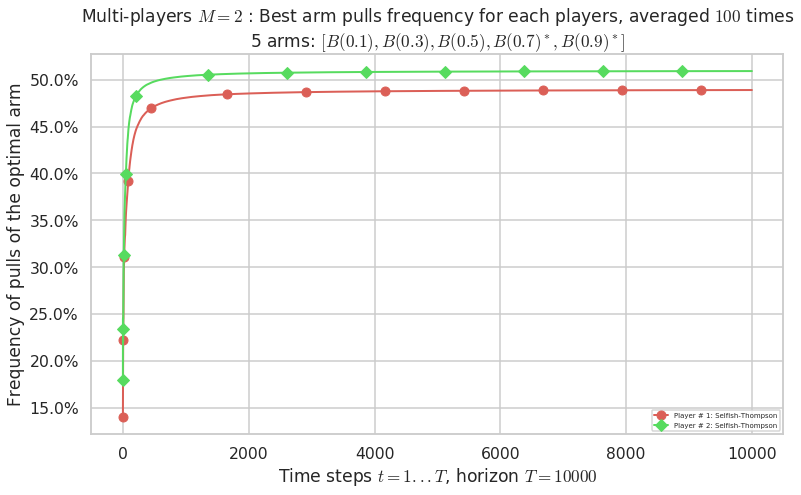

No upper bound for the non-cumulated number of collisions...


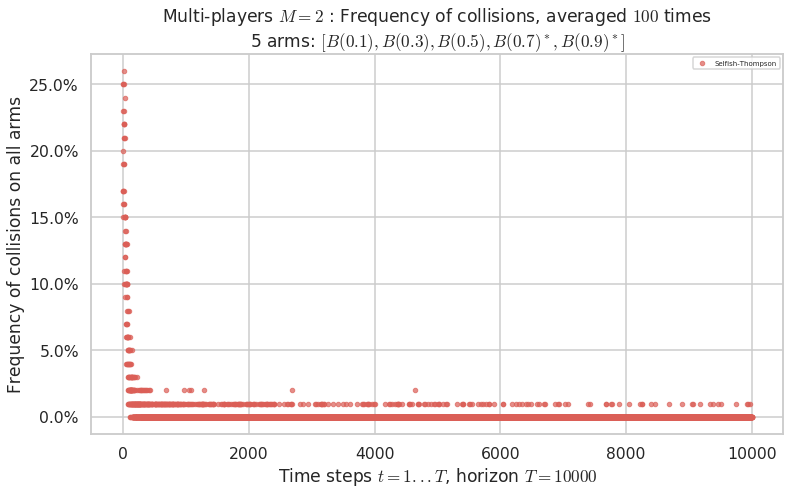

No upper bound for the non-cumulated number of collisions...


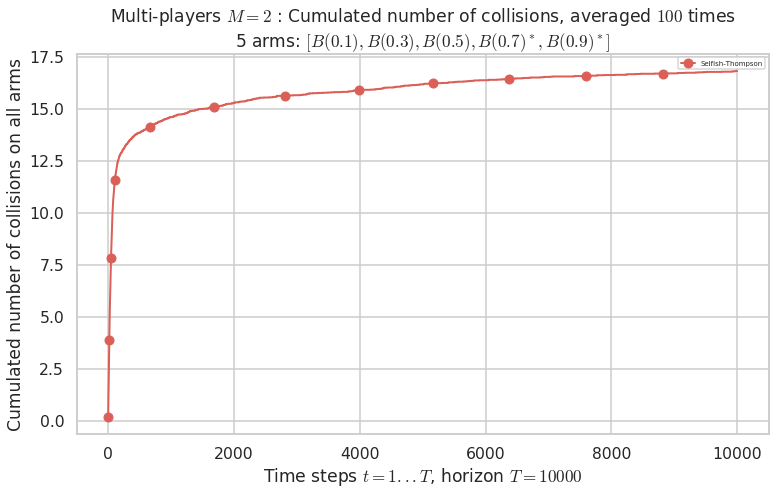

  - For #$0$: $B(0.1)$ ($0.0%$$\%$),	frequency of collisions is 3.3e-05  ...
  - For #$1$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 6.2e-05  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000131  ...
  - For #$3$: $B(0.7)$ ($0.0%$$\%$),	frequency of collisions is 0.00041  ...
  - For #$4$: $B(0.9)$ ($0.1%$$\%$),	frequency of collisions is 0.001045  ...


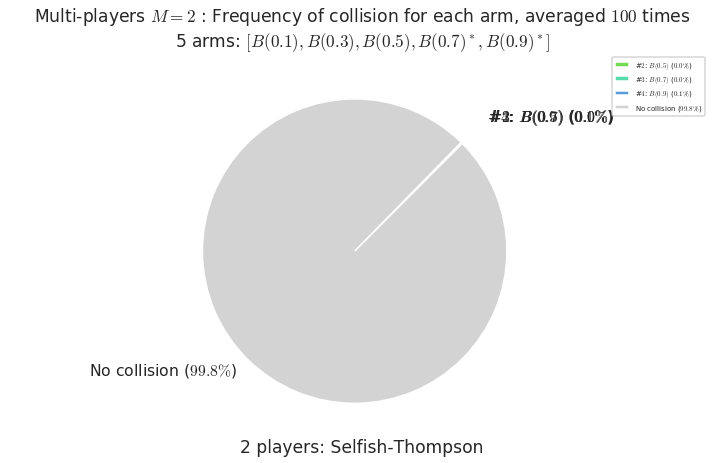


Final ranking for this environment # 1 : RhoRand-kl-UCB ...
- Player # 1 / 2, RhoRand-kl-UCB	was ranked	1 / 2 for this simulation (last rewards = 7925.6).
- Player # 2 / 2, RhoRand-kl-UCB	was ranked	2 / 2 for this simulation (last rewards = 7922.8).


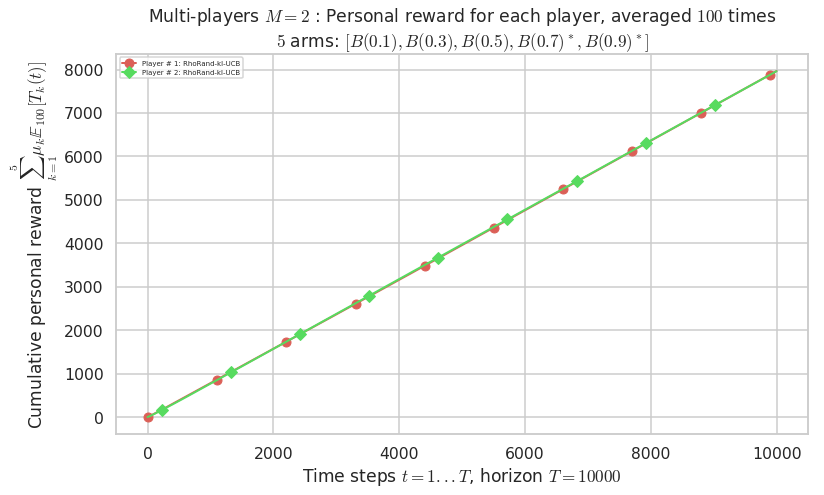

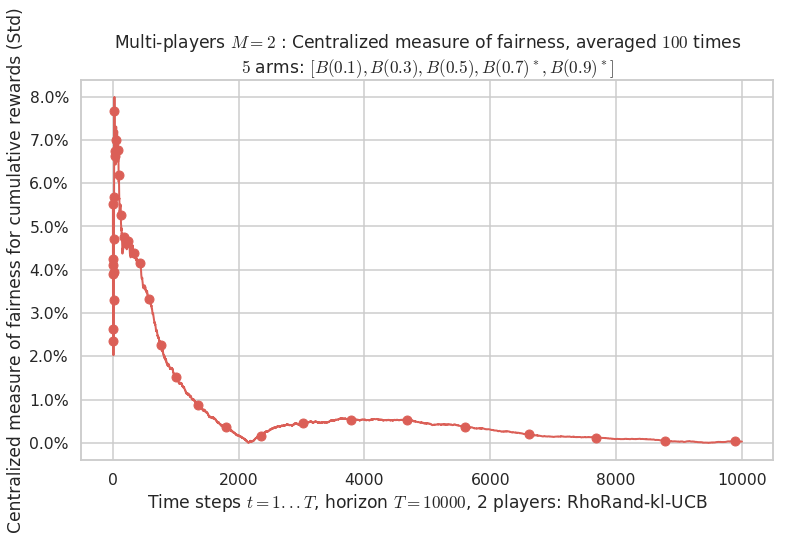

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


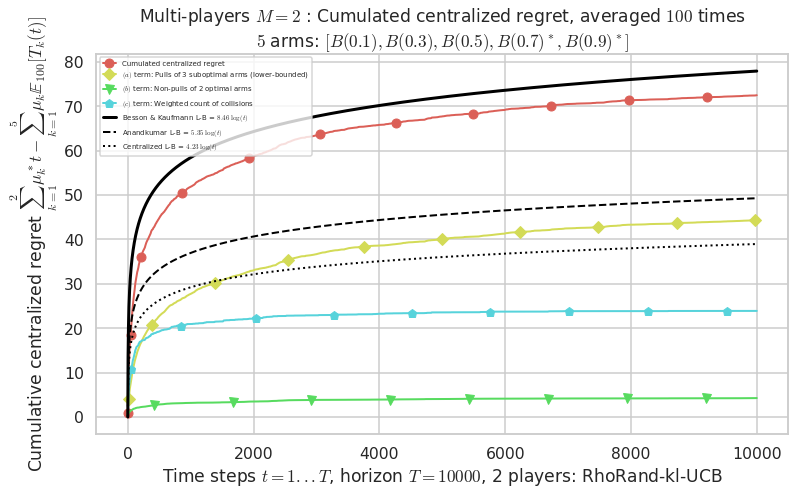

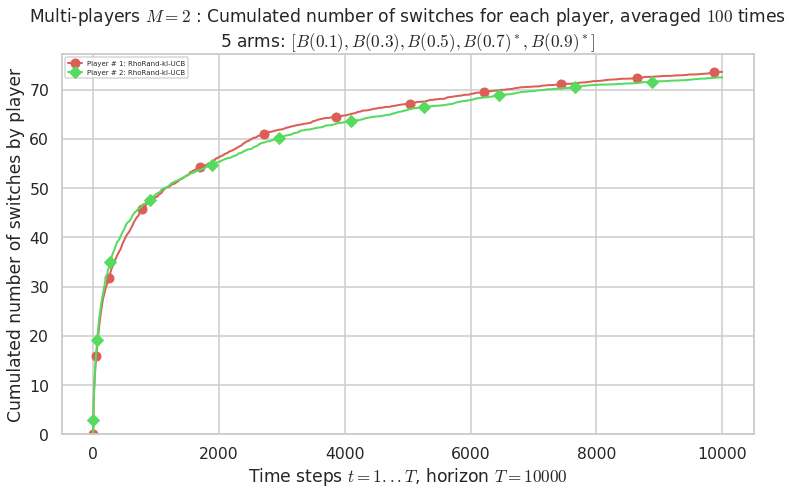

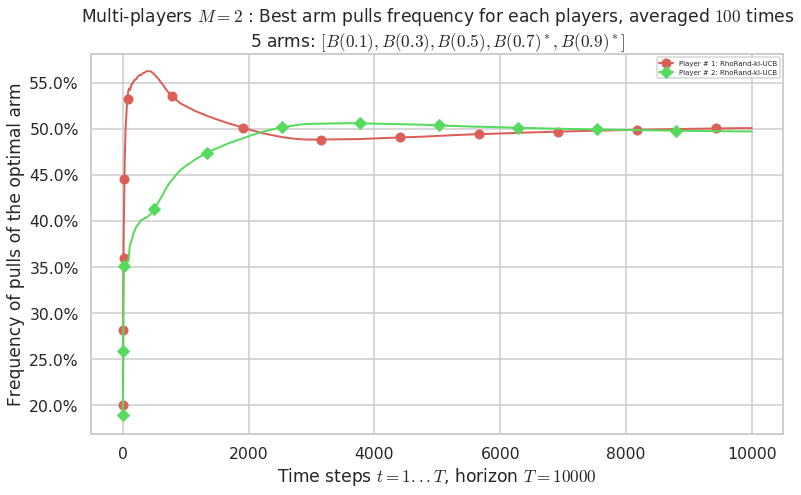

No upper bound for the non-cumulated number of collisions...


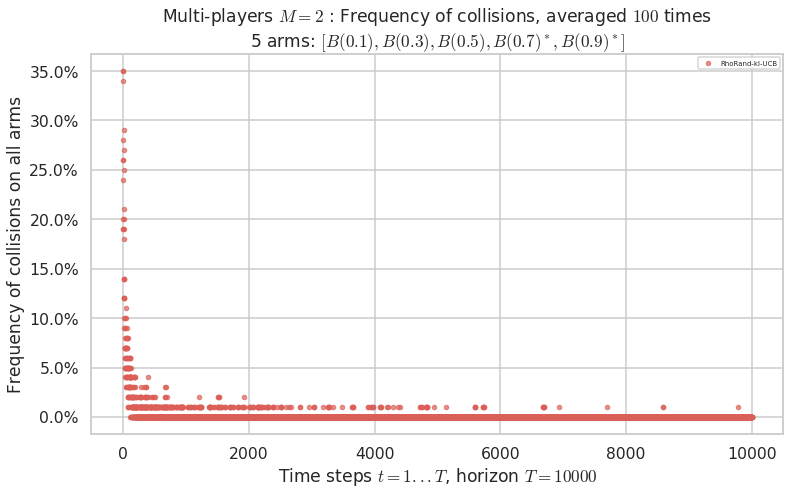

No upper bound for the non-cumulated number of collisions...


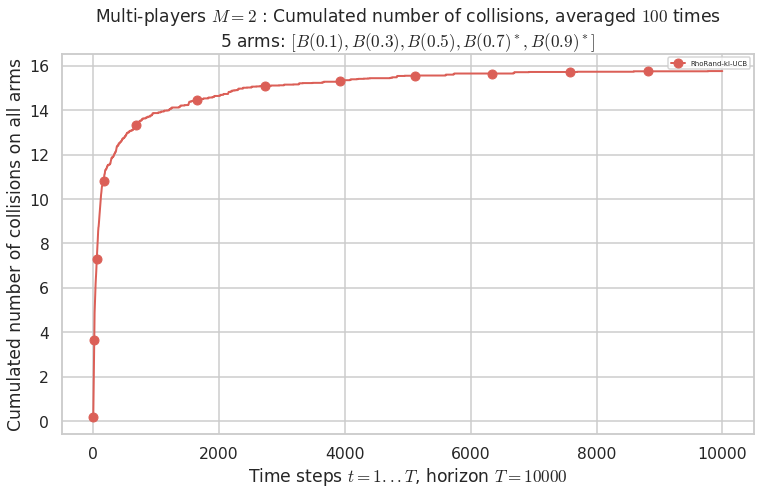

  - For #$0$: $B(0.1)$ ($0.0%$$\%$),	frequency of collisions is 2.4e-05  ...
  - For #$1$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 4.5e-05  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.000117  ...
  - For #$3$: $B(0.7)$ ($0.1%$$\%$),	frequency of collisions is 0.000653  ...
  - For #$4$: $B(0.9)$ ($0.1%$$\%$),	frequency of collisions is 0.000737  ...


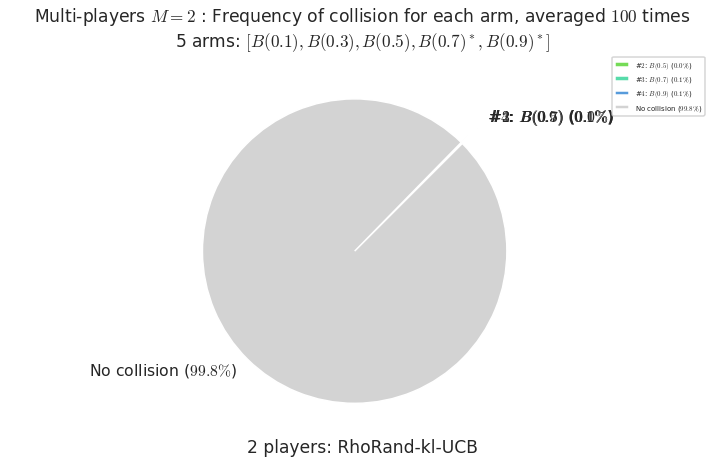


Final ranking for this environment # 1 : Selfish-kl-UCB ...
- Player # 2 / 2, Selfish-kl-UCB	was ranked	1 / 2 for this simulation (last rewards = 8104.4).
- Player # 1 / 2, Selfish-kl-UCB	was ranked	2 / 2 for this simulation (last rewards = 7741.5).


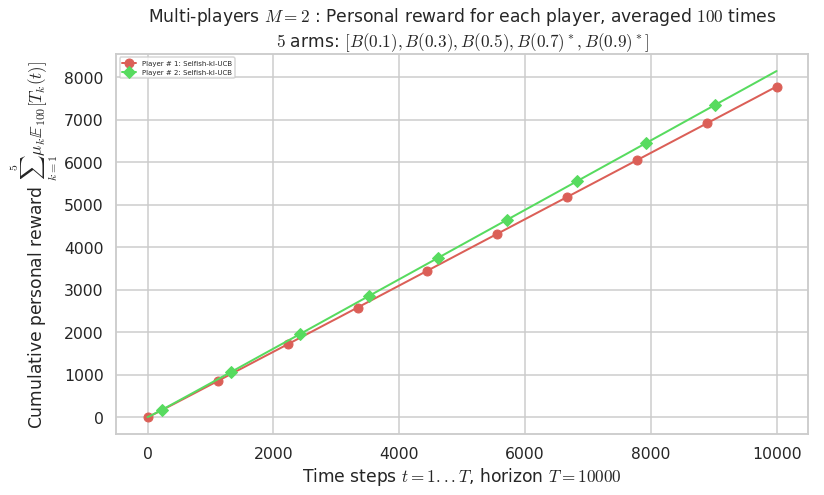

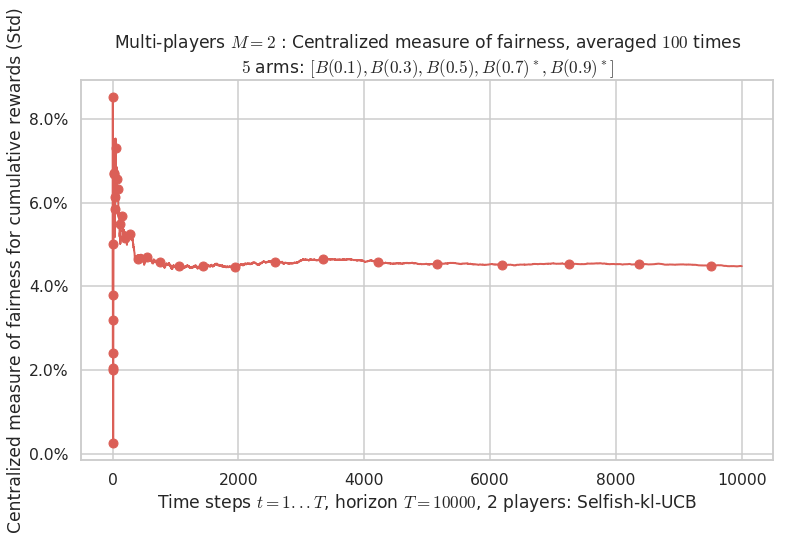

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


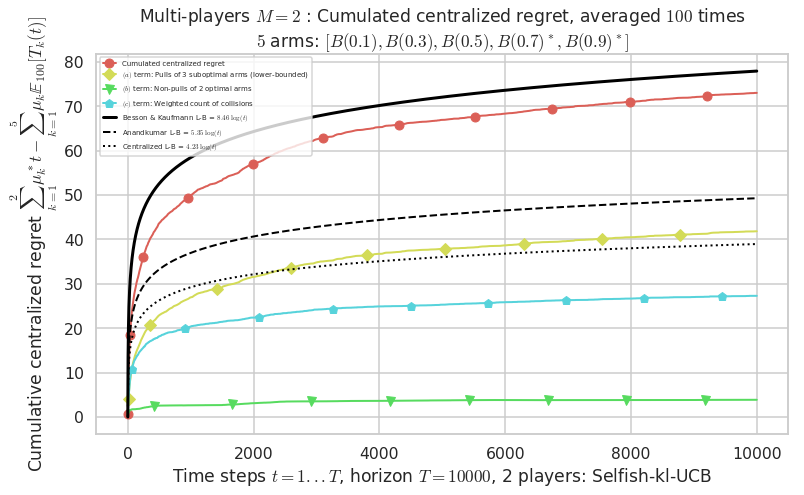

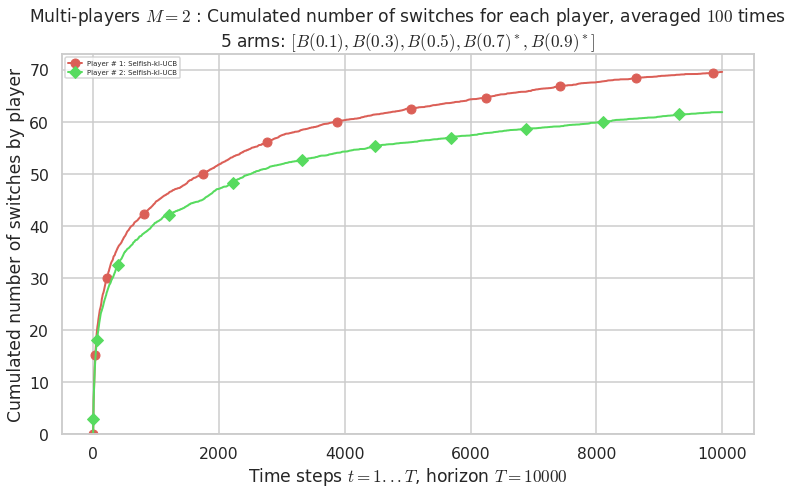

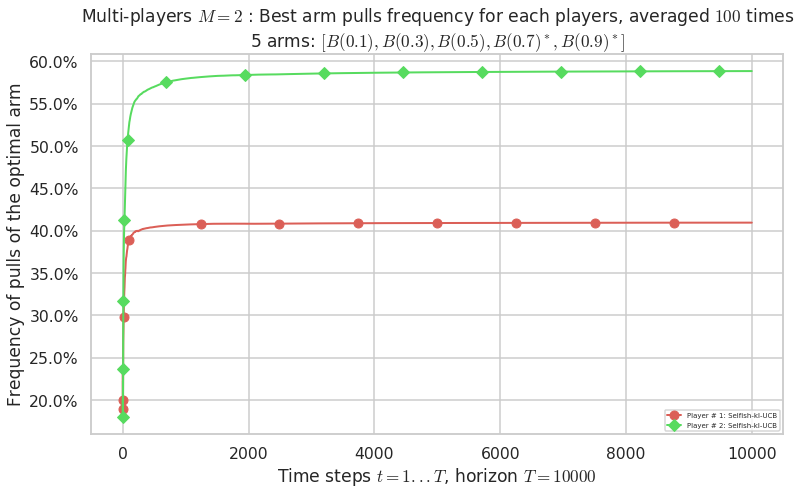

No upper bound for the non-cumulated number of collisions...


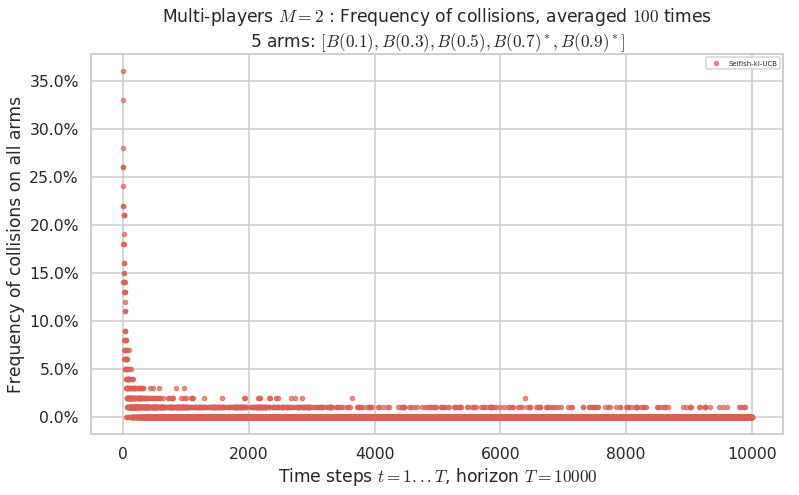

No upper bound for the non-cumulated number of collisions...


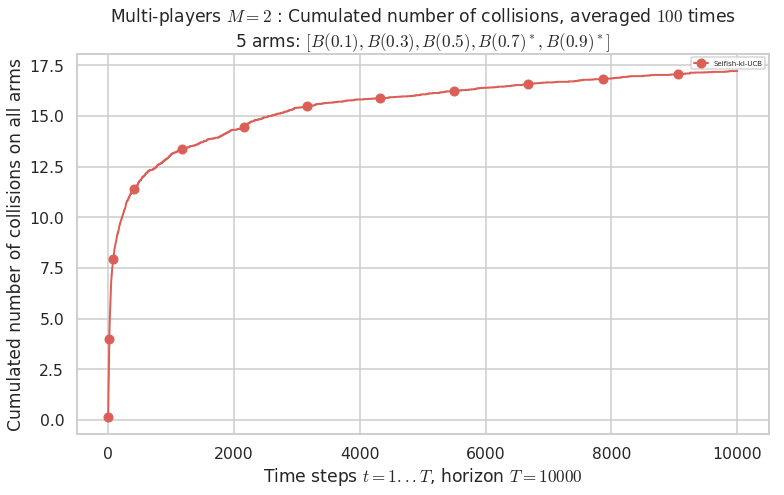

  - For #$0$: $B(0.1)$ ($0.0%$$\%$),	frequency of collisions is 3.2e-05  ...
  - For #$1$: $B(0.3)$ ($0.0%$$\%$),	frequency of collisions is 4.5e-05  ...
  - For #$2$: $B(0.5)$ ($0.0%$$\%$),	frequency of collisions is 0.00012  ...
  - For #$3$: $B(0.7)$ ($0.0%$$\%$),	frequency of collisions is 0.000419  ...
  - For #$4$: $B(0.9)$ ($0.1%$$\%$),	frequency of collisions is 0.001105  ...


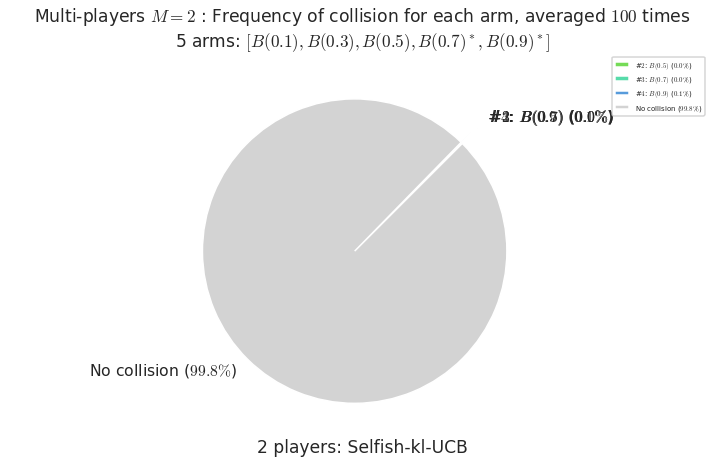

In [31]:
for playersId in tqdm(range(len(evs)), desc="Policies"):
    evaluation = evaluators[1][playersId]
    plotAll(evaluation, 1)

### Third problem
$\mu = [0.005, 0.01, 0.015, 0.84, 0.85]$ is an harder Bernoulli problem, as there is a huge gap between suboptimal and optimal arms.


Final ranking for this environment # 2 : RhoRand-UCB($\alpha=1$) ...
- Player # 2 / 2, RhoRand-UCB($\alpha=1$)	was ranked	1 / 2 for this simulation (last rewards = 8385.3).
- Player # 1 / 2, RhoRand-UCB($\alpha=1$)	was ranked	2 / 2 for this simulation (last rewards = 8375.3).


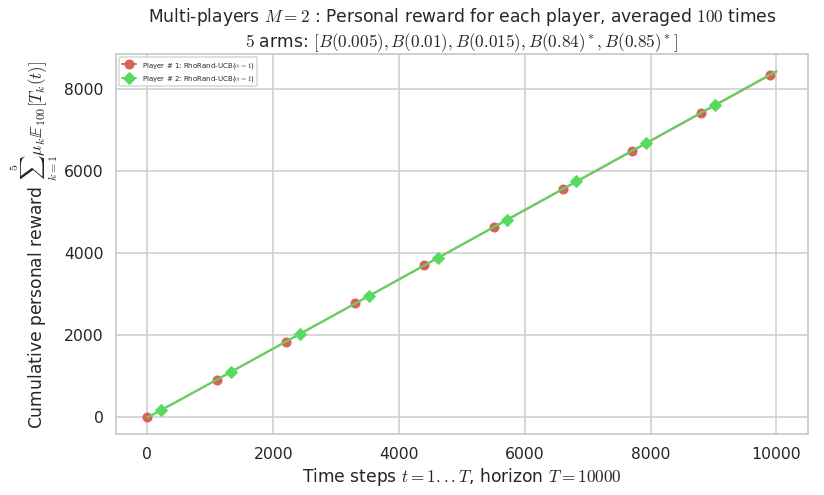

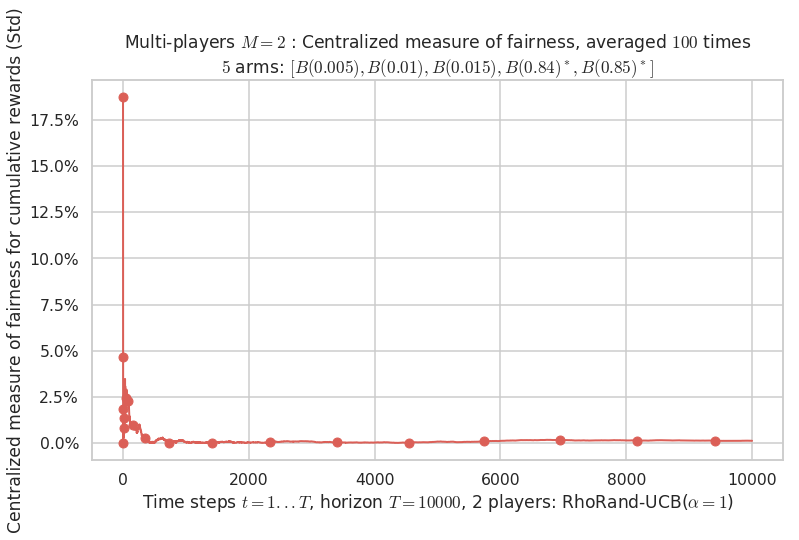

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


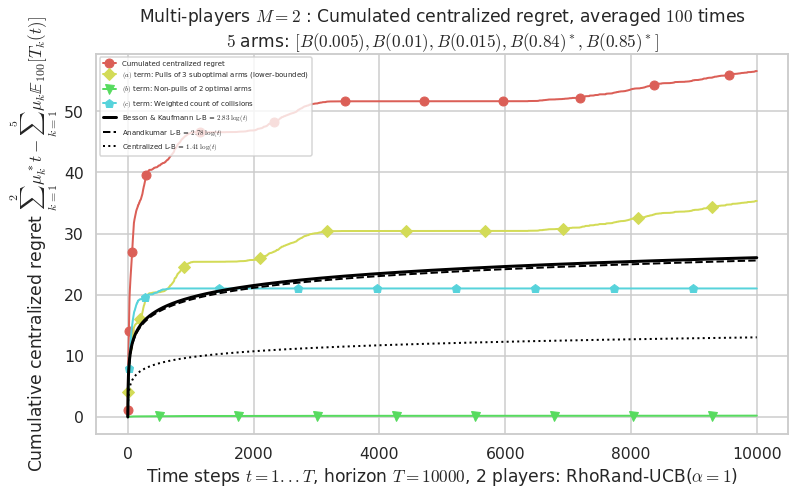

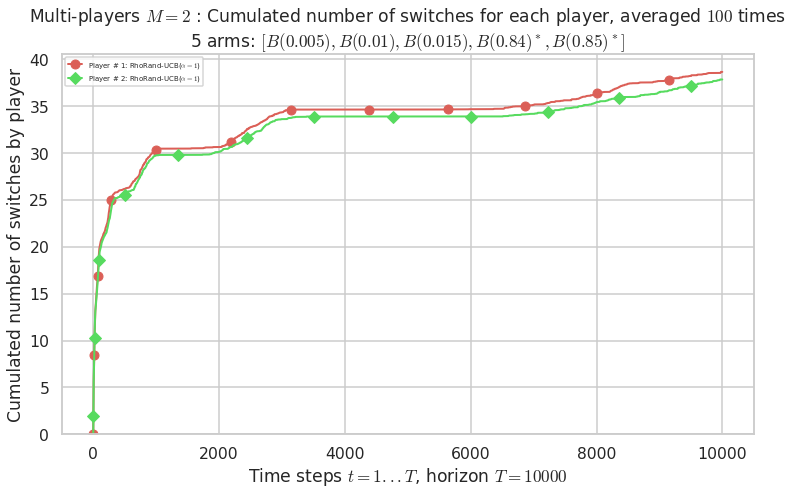

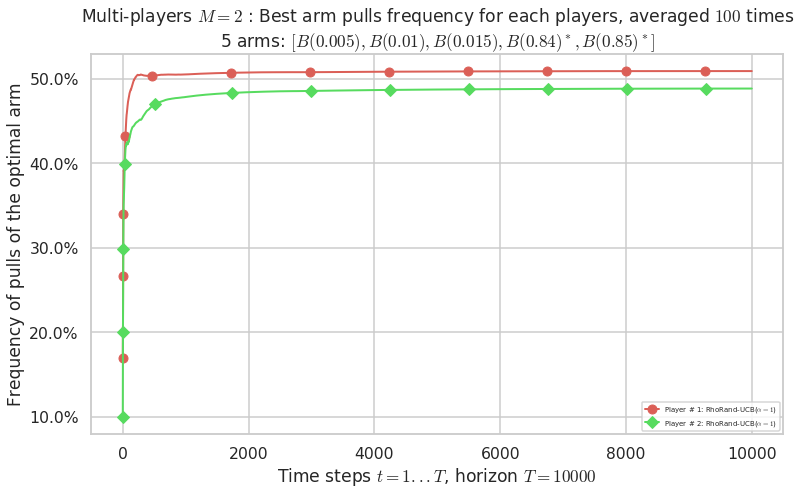

No upper bound for the non-cumulated number of collisions...


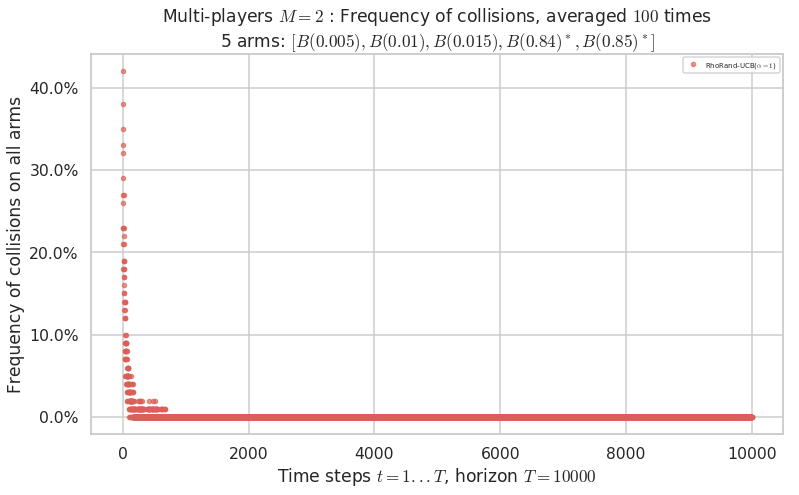

No upper bound for the non-cumulated number of collisions...


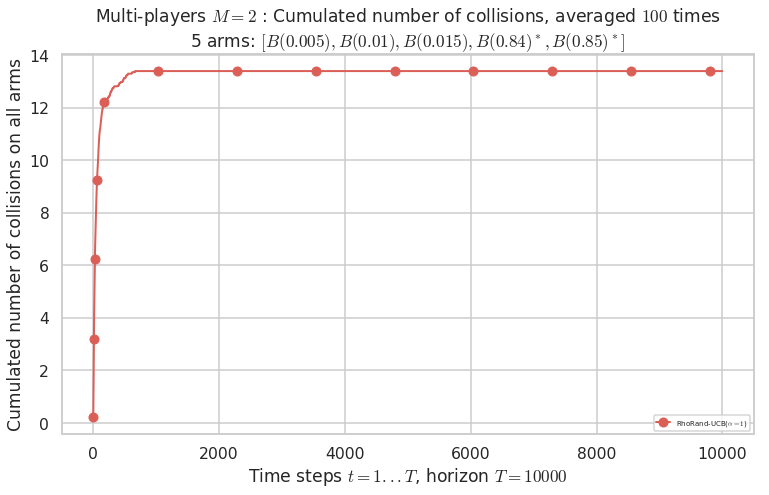

  - For #$0$: $B(0.005)$ ($0.0%$$\%$),	frequency of collisions is 2.8e-05  ...
  - For #$1$: $B(0.01)$ ($0.0%$$\%$),	frequency of collisions is 3.2e-05  ...
  - For #$2$: $B(0.015)$ ($0.0%$$\%$),	frequency of collisions is 3.6e-05  ...
  - For #$3$: $B(0.84)$ ($0.1%$$\%$),	frequency of collisions is 0.000661  ...
  - For #$4$: $B(0.85)$ ($0.1%$$\%$),	frequency of collisions is 0.000582  ...


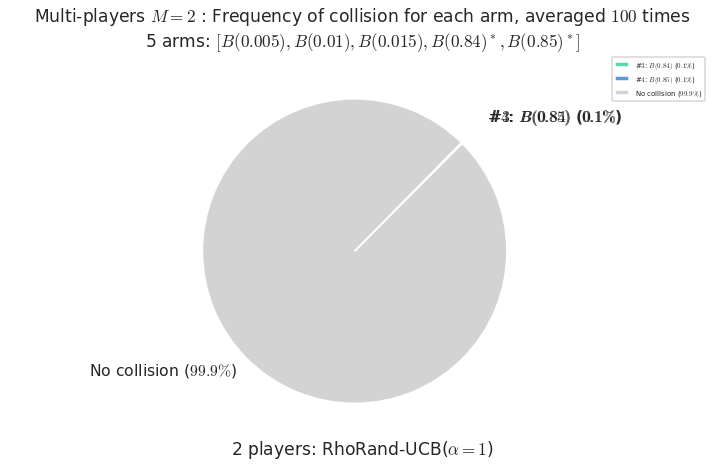


Final ranking for this environment # 2 : Selfish-UCB($\alpha=1$) ...
- Player # 2 / 2, Selfish-UCB($\alpha=1$)	was ranked	1 / 2 for this simulation (last rewards = 8373.4).
- Player # 1 / 2, Selfish-UCB($\alpha=1$)	was ranked	2 / 2 for this simulation (last rewards = 8372.2).


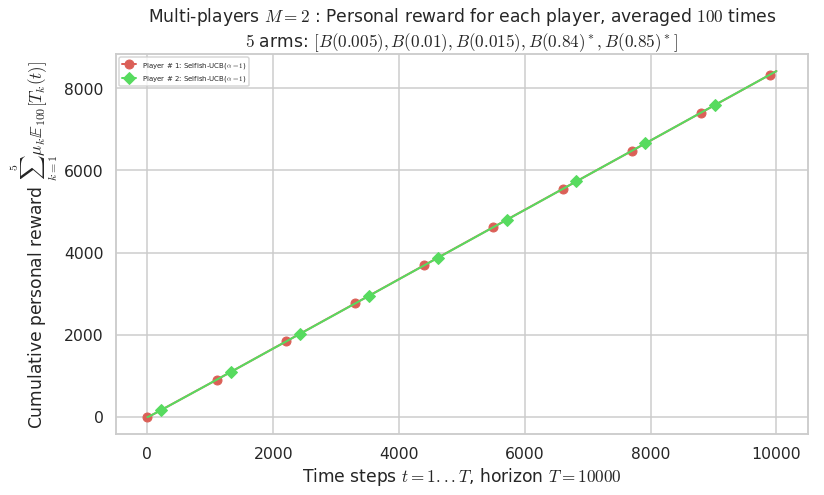

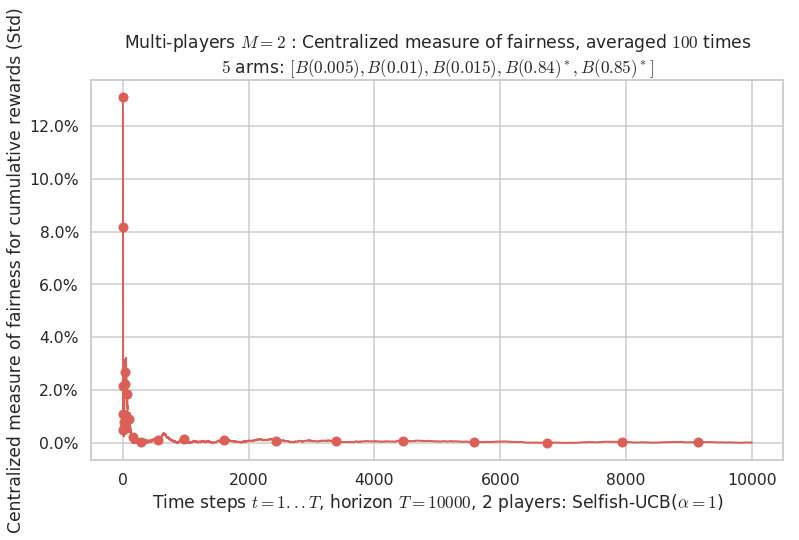

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


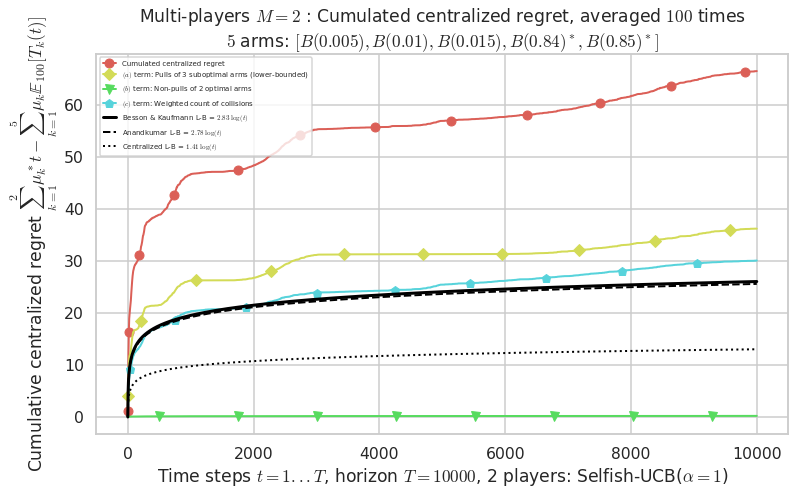

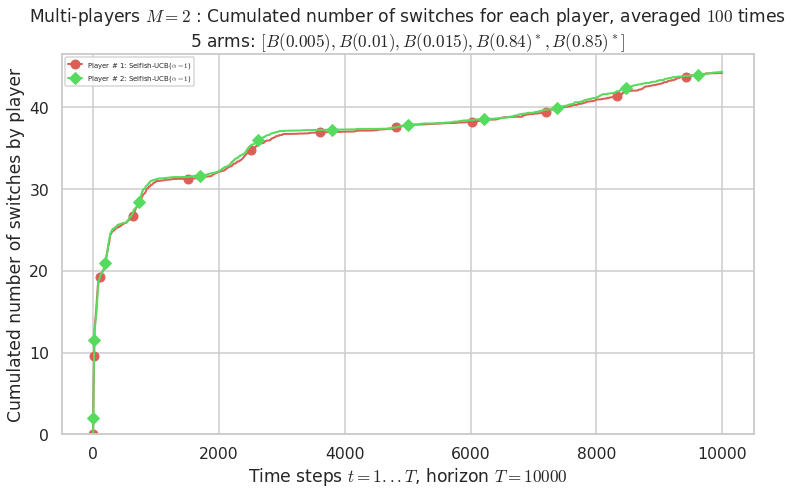

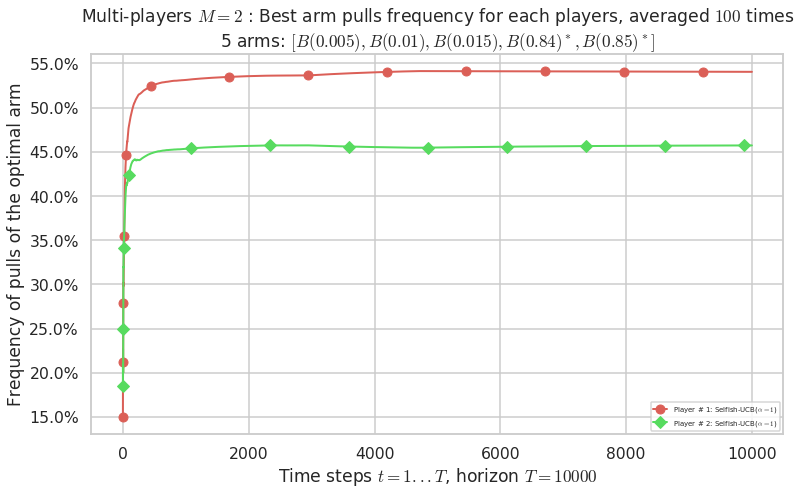

No upper bound for the non-cumulated number of collisions...


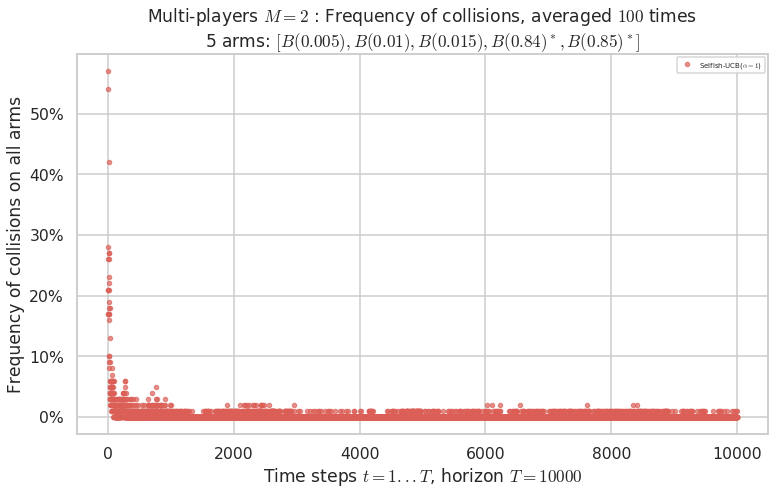

No upper bound for the non-cumulated number of collisions...


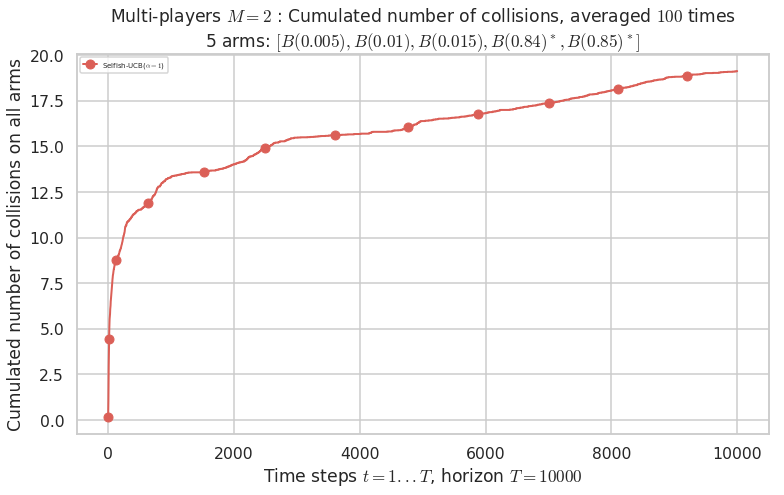

  - For #$0$: $B(0.005)$ ($0.0%$$\%$),	frequency of collisions is 4.7e-05  ...
  - For #$1$: $B(0.01)$ ($0.0%$$\%$),	frequency of collisions is 4.3e-05  ...
  - For #$2$: $B(0.015)$ ($0.0%$$\%$),	frequency of collisions is 4.4e-05  ...
  - For #$3$: $B(0.84)$ ($0.1%$$\%$),	frequency of collisions is 0.000891  ...
  - For #$4$: $B(0.85)$ ($0.1%$$\%$),	frequency of collisions is 0.000888  ...


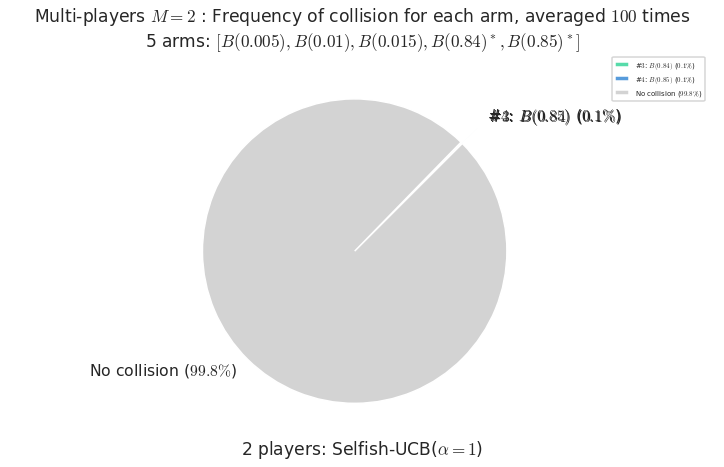


Final ranking for this environment # 2 : RhoRand-Thompson ...
- Player # 1 / 2, RhoRand-Thompson	was ranked	1 / 2 for this simulation (last rewards = 5107.2).
- Player # 2 / 2, RhoRand-Thompson	was ranked	2 / 2 for this simulation (last rewards = 5105.4).


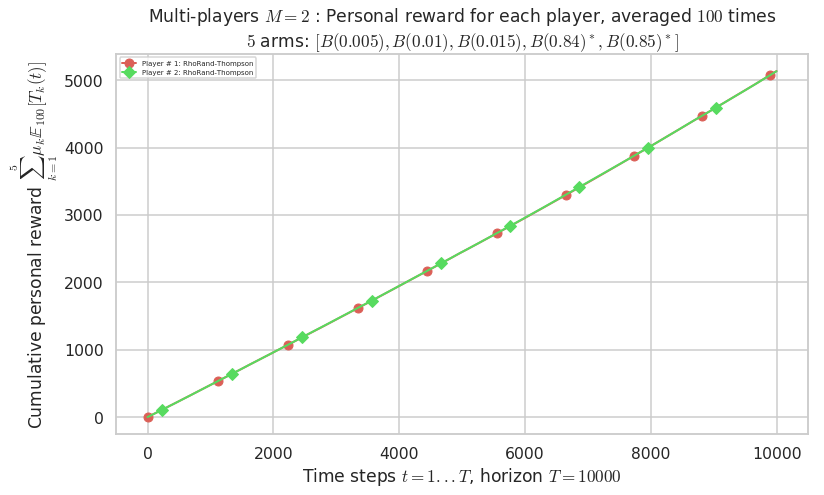

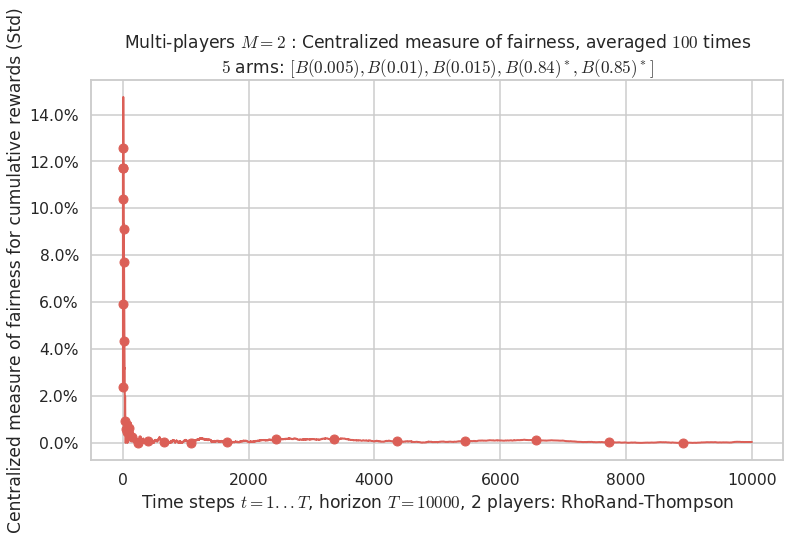

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


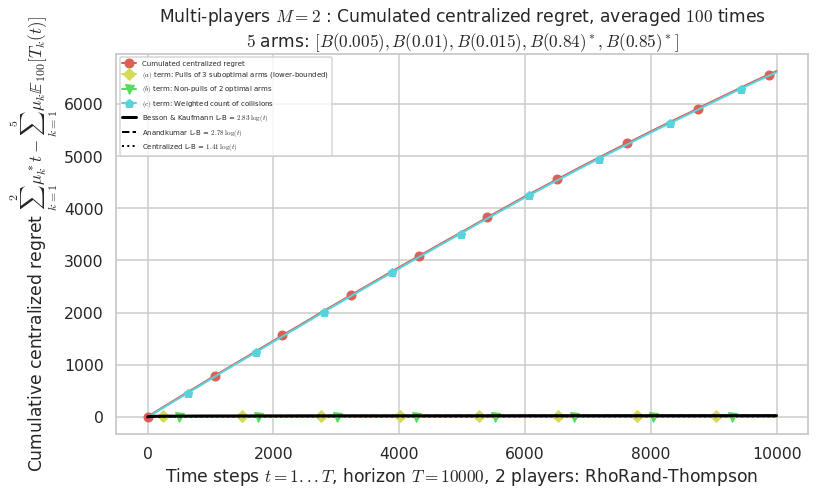

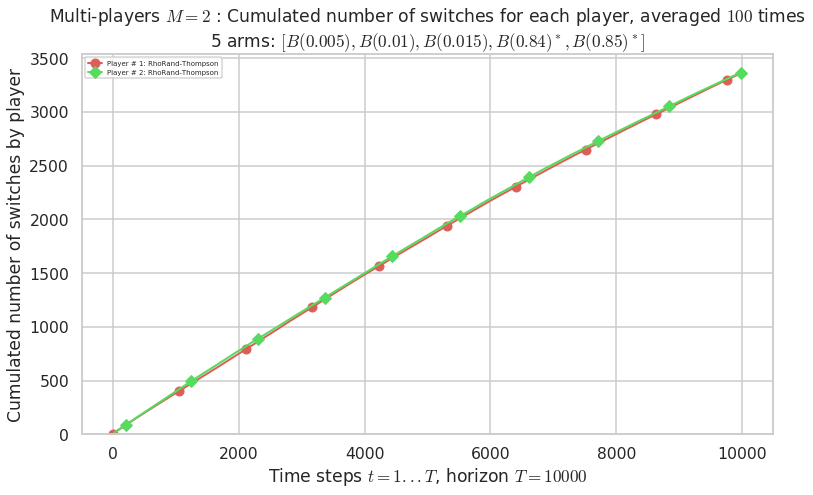

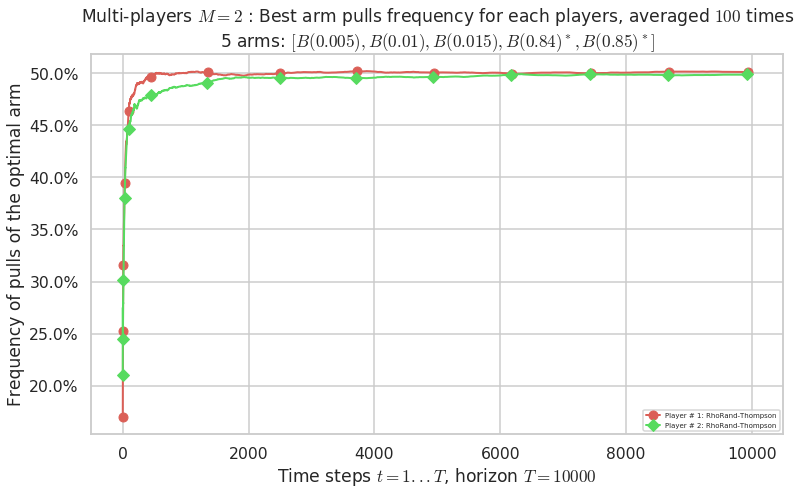

No upper bound for the non-cumulated number of collisions...


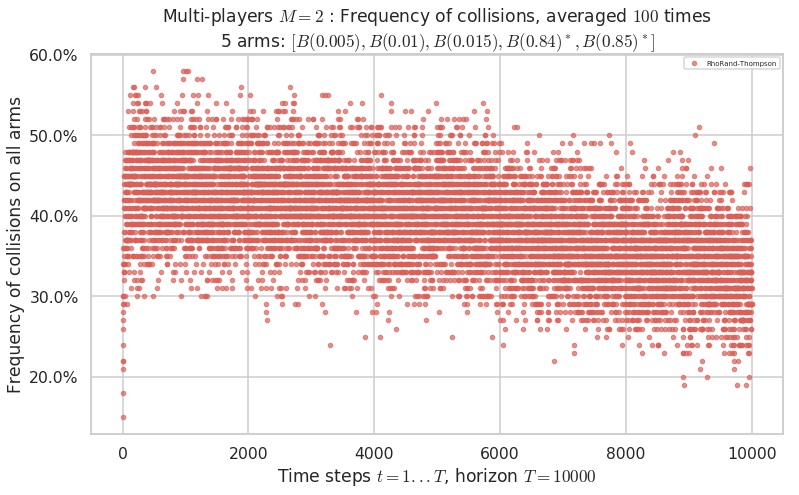

No upper bound for the non-cumulated number of collisions...


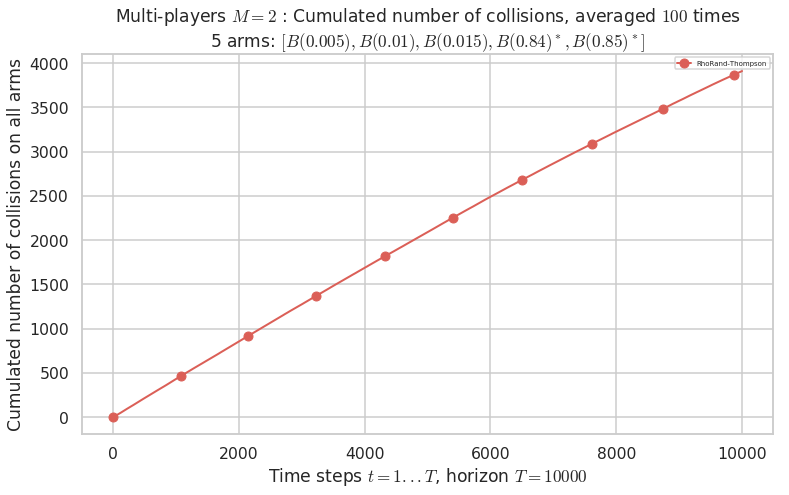

  - For #$0$: $B(0.005)$ ($0.0%$$\%$),	frequency of collisions is 2.9e-05  ...
  - For #$1$: $B(0.01)$ ($0.0%$$\%$),	frequency of collisions is 2.9e-05  ...
  - For #$2$: $B(0.015)$ ($0.0%$$\%$),	frequency of collisions is 2.4e-05  ...
  - For #$3$: $B(0.84)$ ($19.5%$$\%$),	frequency of collisions is 0.19493  ...
  - For #$4$: $B(0.85)$ ($19.6%$$\%$),	frequency of collisions is 0.19604  ...


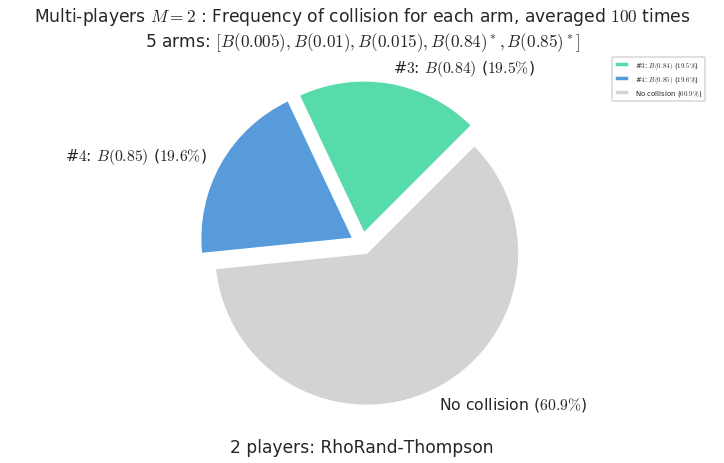


Final ranking for this environment # 2 : Selfish-Thompson ...
- Player # 2 / 2, Selfish-Thompson	was ranked	1 / 2 for this simulation (last rewards = 8388).
- Player # 1 / 2, Selfish-Thompson	was ranked	2 / 2 for this simulation (last rewards = 8386.4).


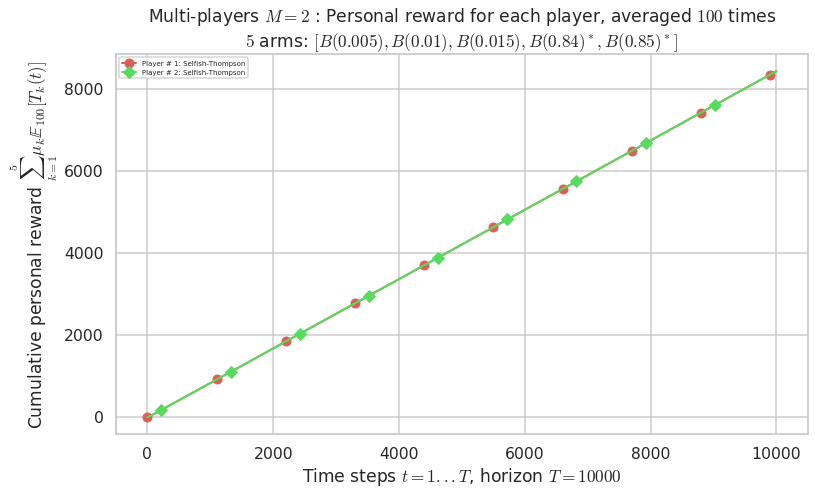

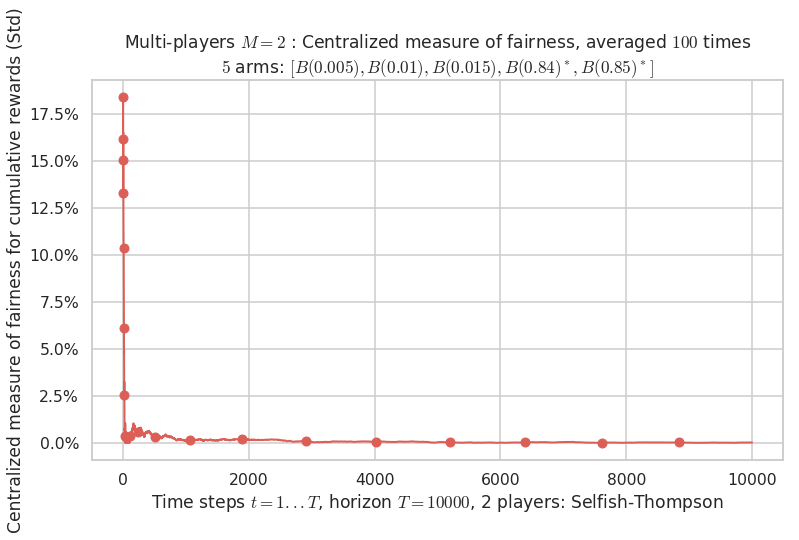

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


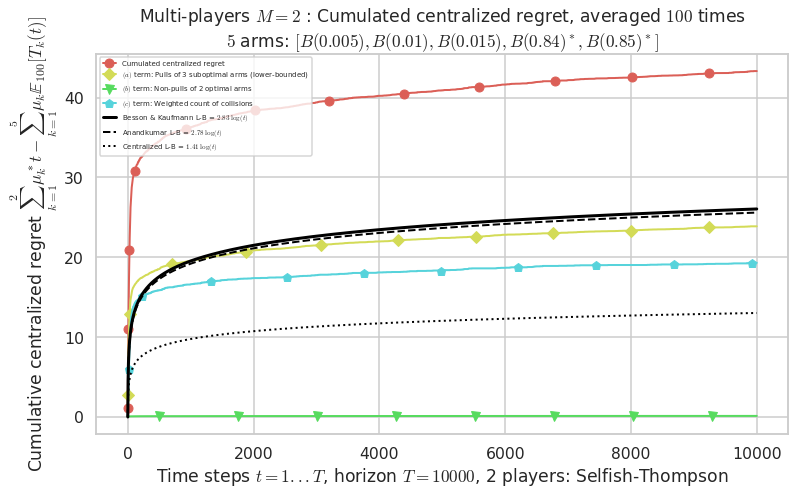

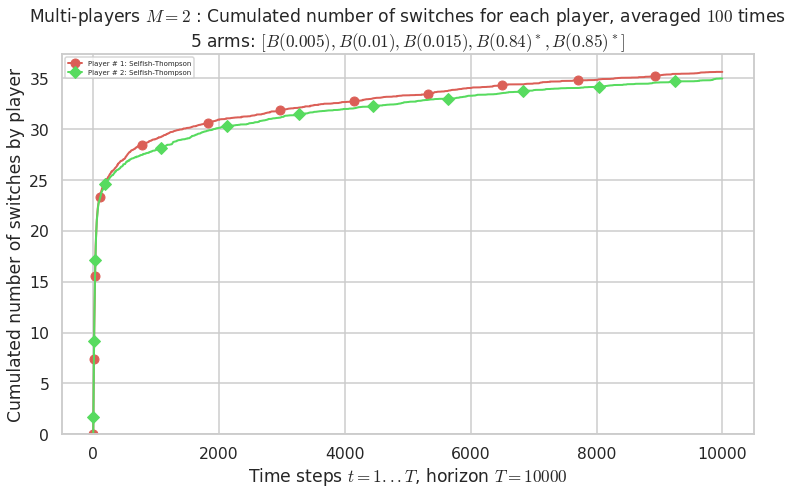

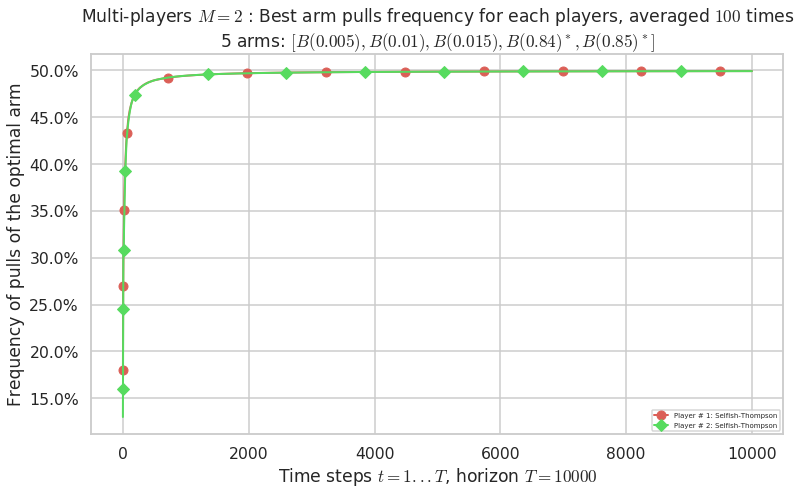

No upper bound for the non-cumulated number of collisions...


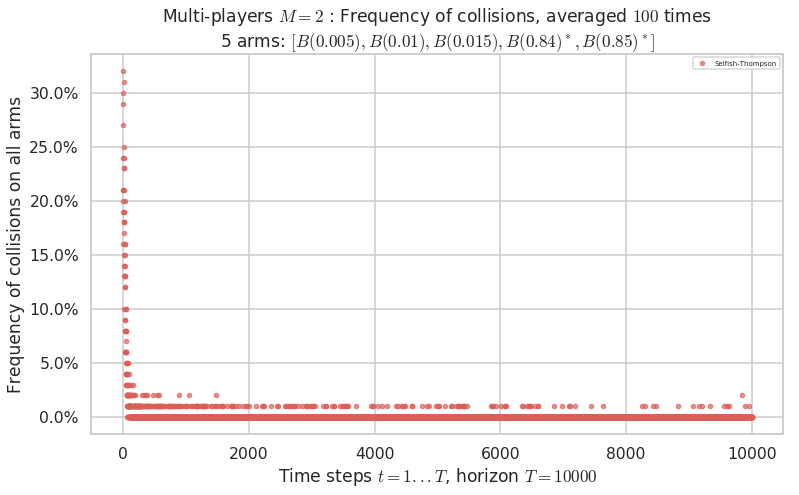

No upper bound for the non-cumulated number of collisions...


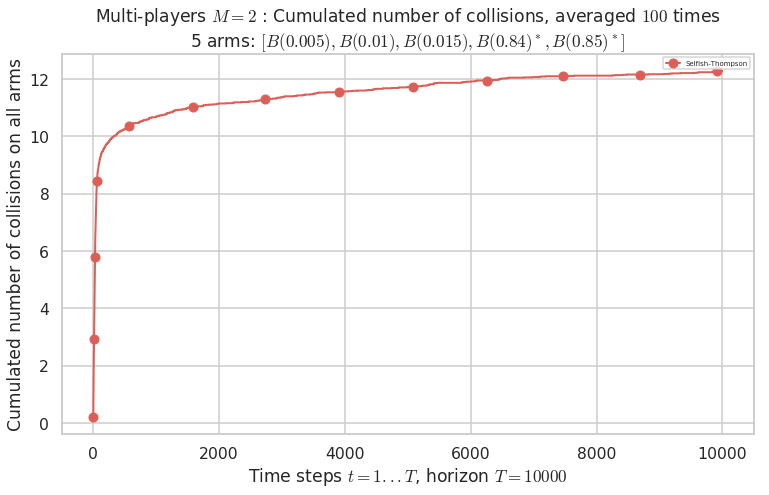

  - For #$0$: $B(0.005)$ ($0.0%$$\%$),	frequency of collisions is 2.8e-05  ...
  - For #$1$: $B(0.01)$ ($0.0%$$\%$),	frequency of collisions is 2.2e-05  ...
  - For #$2$: $B(0.015)$ ($0.0%$$\%$),	frequency of collisions is 3.7e-05  ...
  - For #$3$: $B(0.84)$ ($0.1%$$\%$),	frequency of collisions is 0.000555  ...
  - For #$4$: $B(0.85)$ ($0.1%$$\%$),	frequency of collisions is 0.000586  ...


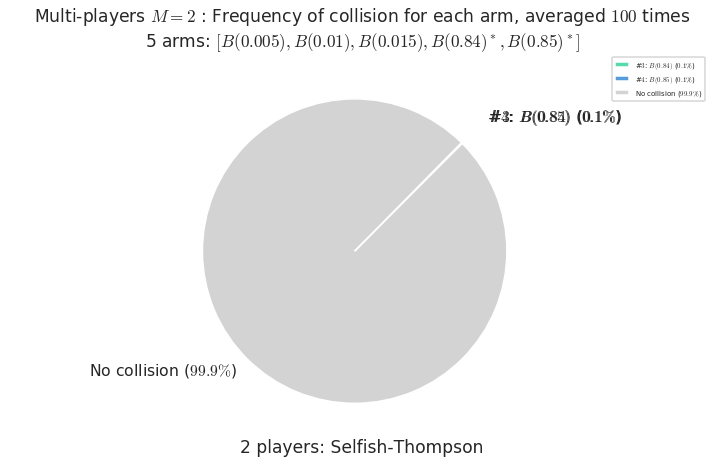


Final ranking for this environment # 2 : RhoRand-kl-UCB ...
- Player # 2 / 2, RhoRand-kl-UCB	was ranked	1 / 2 for this simulation (last rewards = 8380.2).
- Player # 1 / 2, RhoRand-kl-UCB	was ranked	2 / 2 for this simulation (last rewards = 8378).


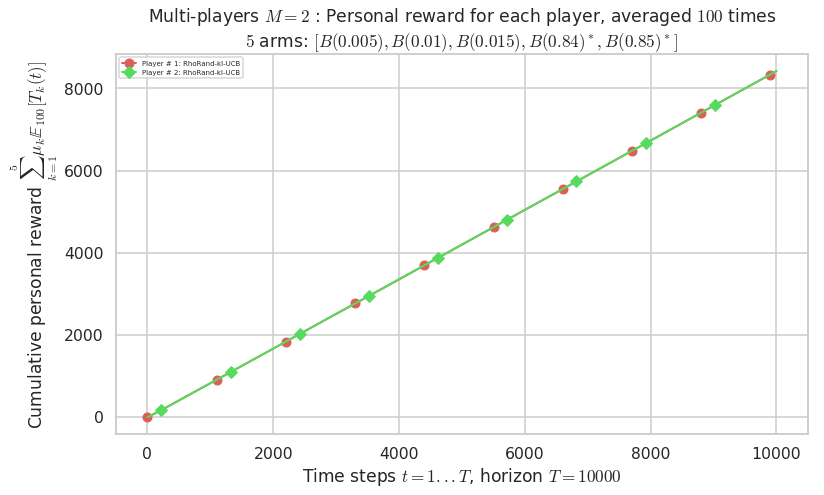

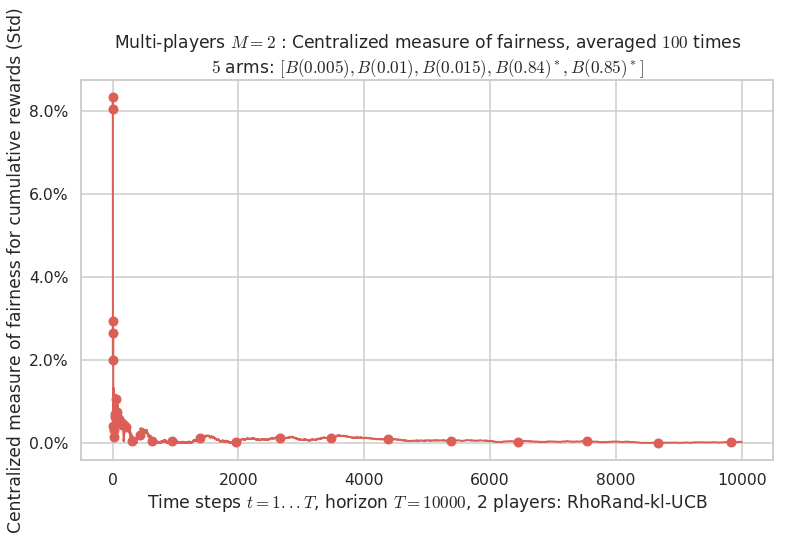

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


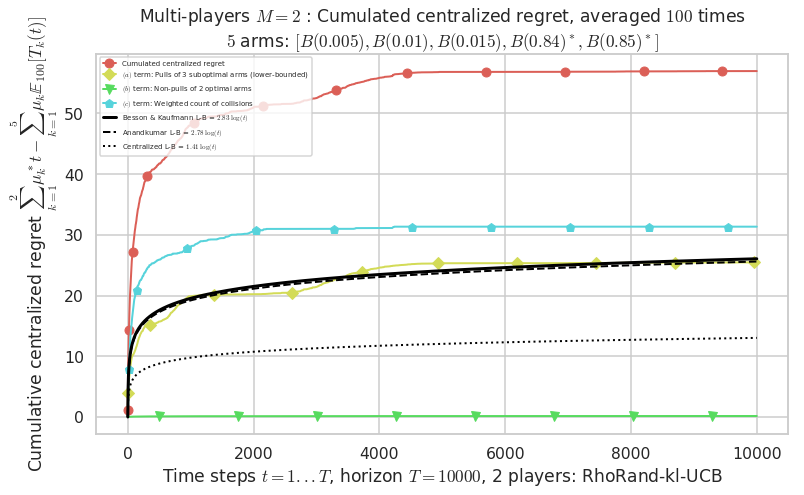

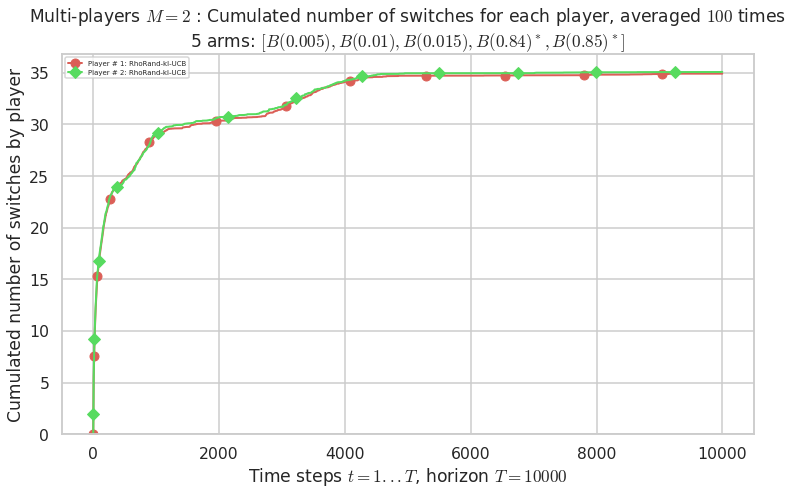

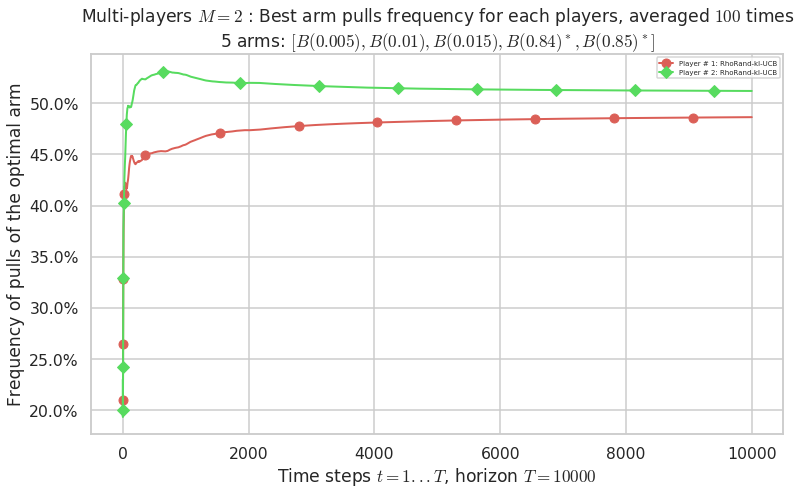

No upper bound for the non-cumulated number of collisions...


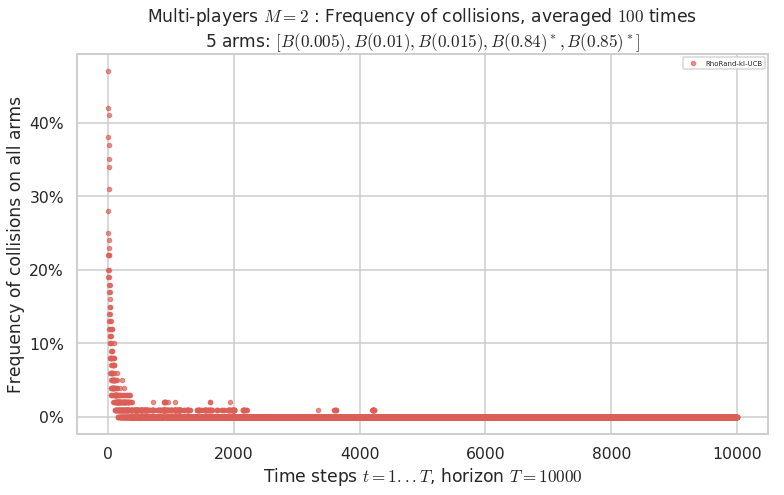

No upper bound for the non-cumulated number of collisions...


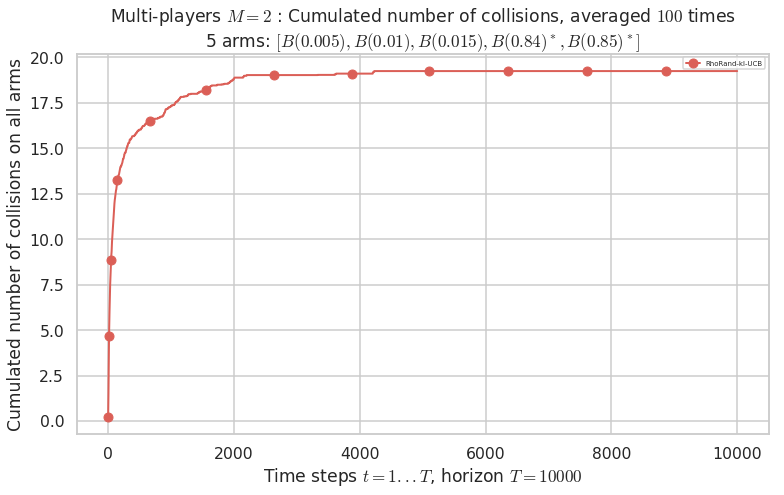

  - For #$0$: $B(0.005)$ ($0.0%$$\%$),	frequency of collisions is 2.2e-05  ...
  - For #$1$: $B(0.01)$ ($0.0%$$\%$),	frequency of collisions is 2.5e-05  ...
  - For #$2$: $B(0.015)$ ($0.0%$$\%$),	frequency of collisions is 2.3e-05  ...
  - For #$3$: $B(0.84)$ ($0.1%$$\%$),	frequency of collisions is 0.000983  ...
  - For #$4$: $B(0.85)$ ($0.1%$$\%$),	frequency of collisions is 0.000871  ...


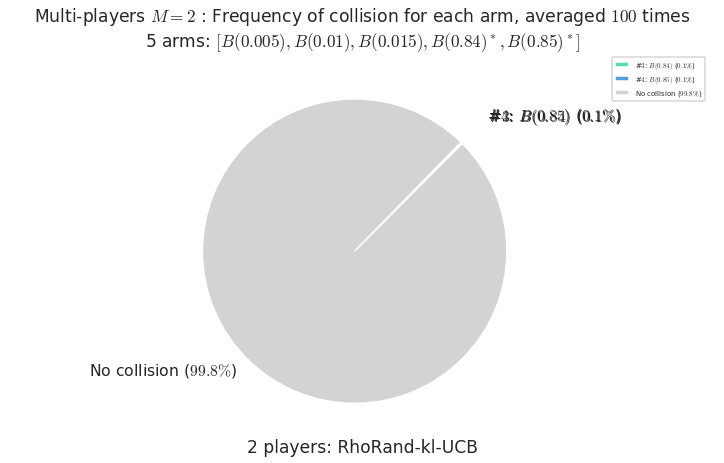


Final ranking for this environment # 2 : Selfish-kl-UCB ...
- Player # 2 / 2, Selfish-kl-UCB	was ranked	1 / 2 for this simulation (last rewards = 8384.6).
- Player # 1 / 2, Selfish-kl-UCB	was ranked	2 / 2 for this simulation (last rewards = 8380.2).


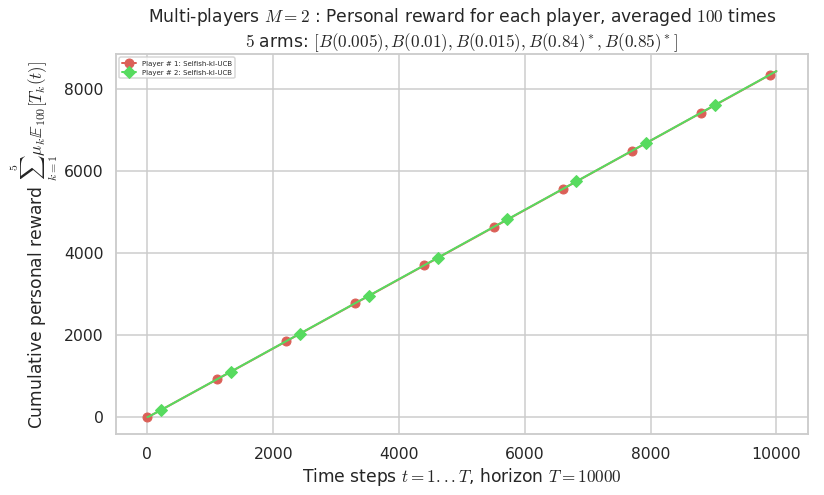

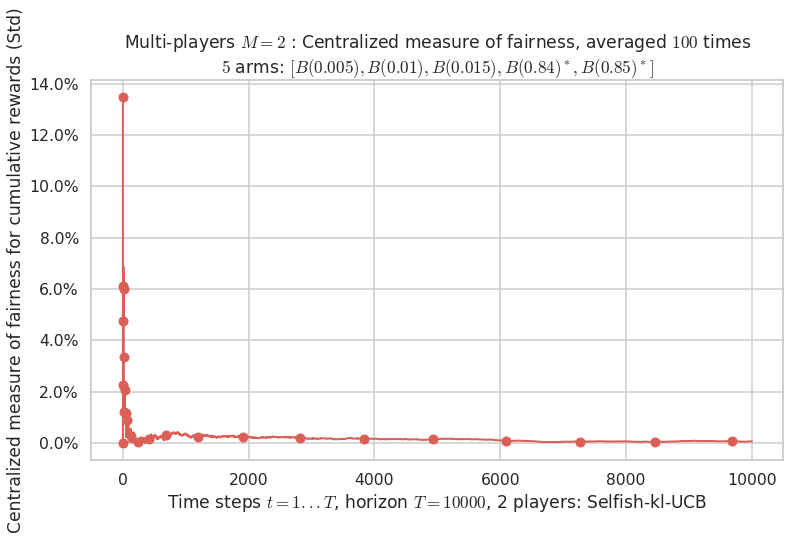

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


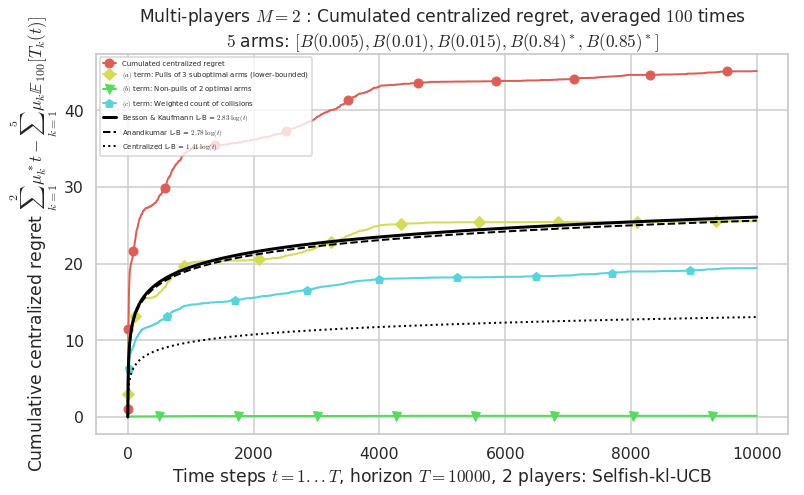

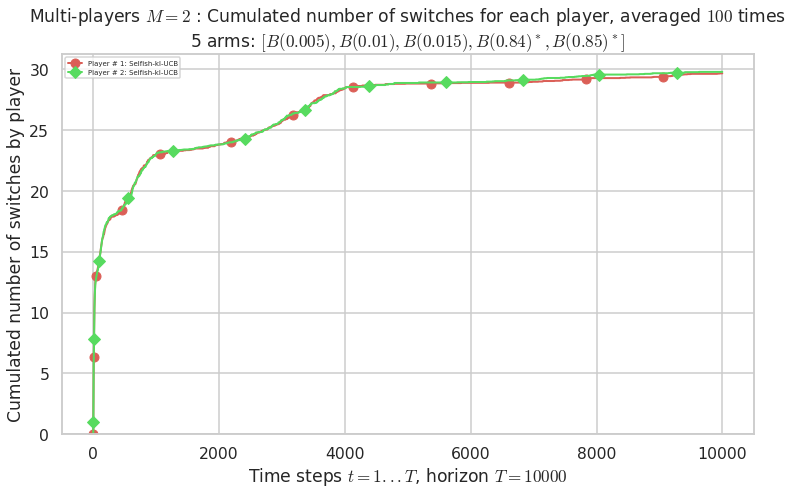

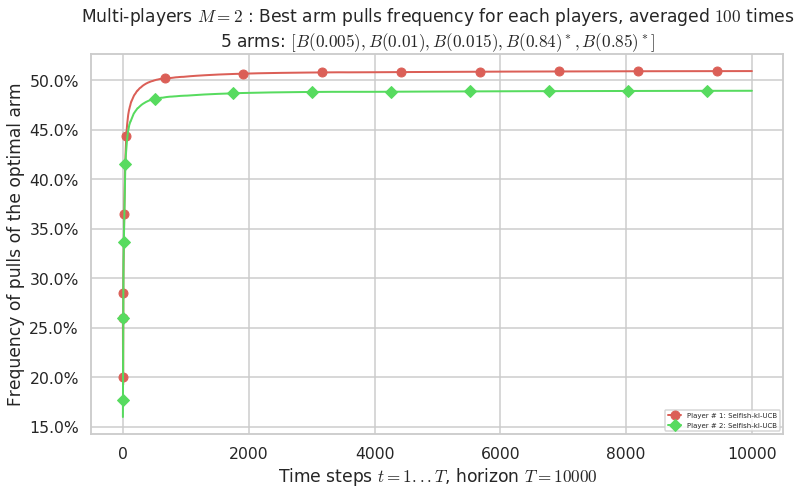

No upper bound for the non-cumulated number of collisions...


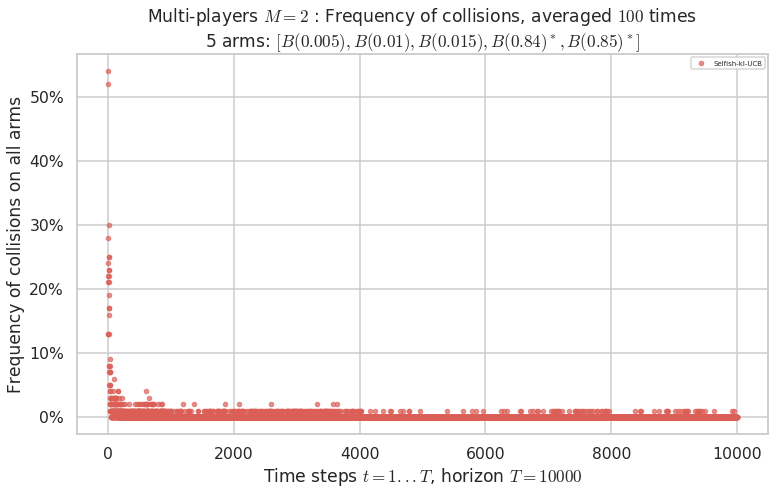

No upper bound for the non-cumulated number of collisions...


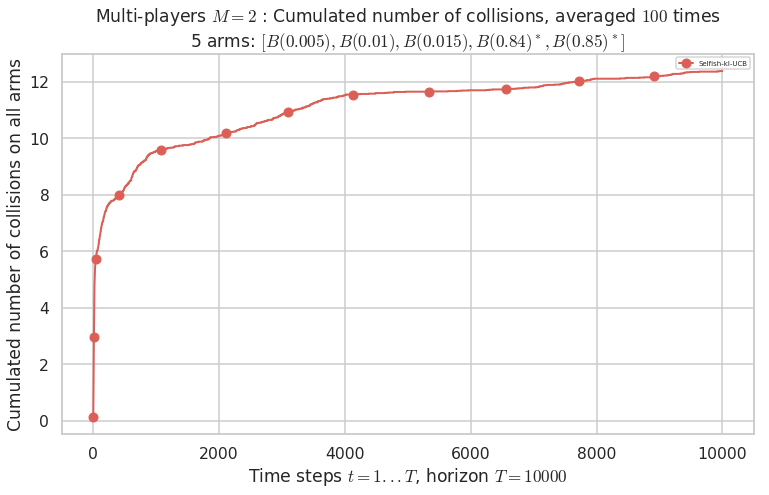

  - For #$0$: $B(0.005)$ ($0.0%$$\%$),	frequency of collisions is 2.9e-05  ...
  - For #$1$: $B(0.01)$ ($0.0%$$\%$),	frequency of collisions is 2.5e-05  ...
  - For #$2$: $B(0.015)$ ($0.0%$$\%$),	frequency of collisions is 3.6e-05  ...
  - For #$3$: $B(0.84)$ ($0.1%$$\%$),	frequency of collisions is 0.00056  ...
  - For #$4$: $B(0.85)$ ($0.1%$$\%$),	frequency of collisions is 0.000588  ...


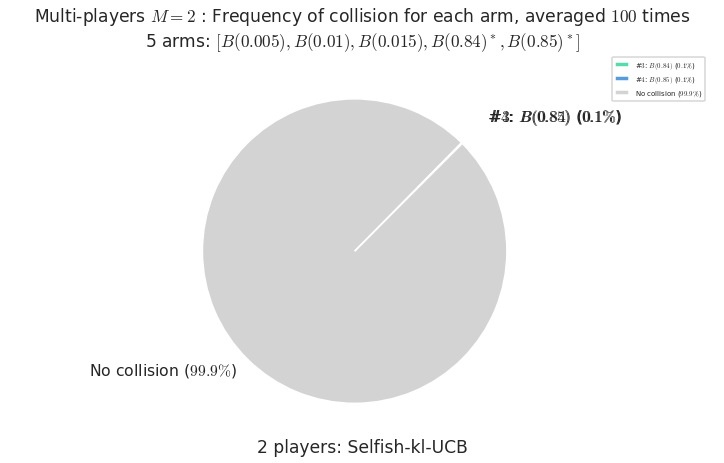

In [32]:
for playersId in tqdm(range(len(evs)), desc="Policies"):
    evaluation = evaluators[2][playersId]
    plotAll(evaluation, 2)

---
### Comparing their performances

In [33]:
def plotCombined(e0, eothers, envId):
    # Centralized regret
    e0.plotRegretCentralized(envId, evaluators=eothers)
    # Fairness
    e0.plotFairness(envId, fairness="STD", evaluators=eothers)
    # Number of switches
    e0.plotNbSwitchsCentralized(envId, cumulated=True, evaluators=eothers)
    # Number of collisions - not for Centralized* policies
    e0.plotNbCollisions(envId, cumulated=True, evaluators=eothers)

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 9 ...
 -  For 2 players, our lower bound gave = 18 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 12.1 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 9.46 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - [Anandtharam et al] centralized lower-bound = 9,
 - [Anandkumar et al] decentralized lower-bound = 12.1
 - Our better (larger) decentralized lower-bound = 18,


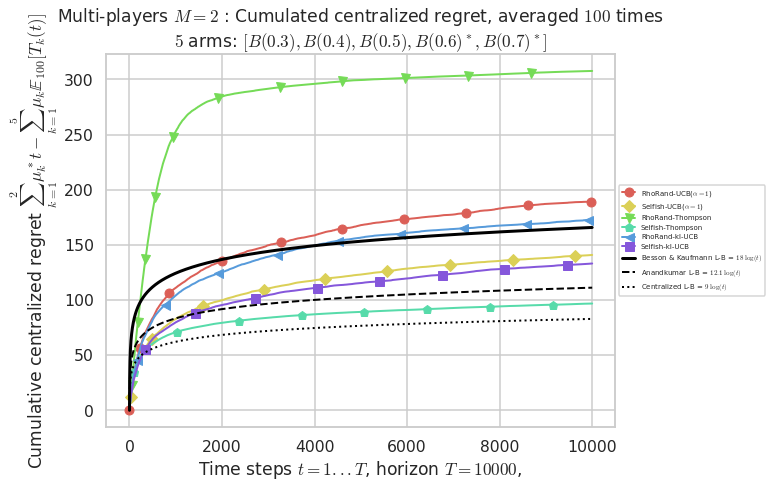

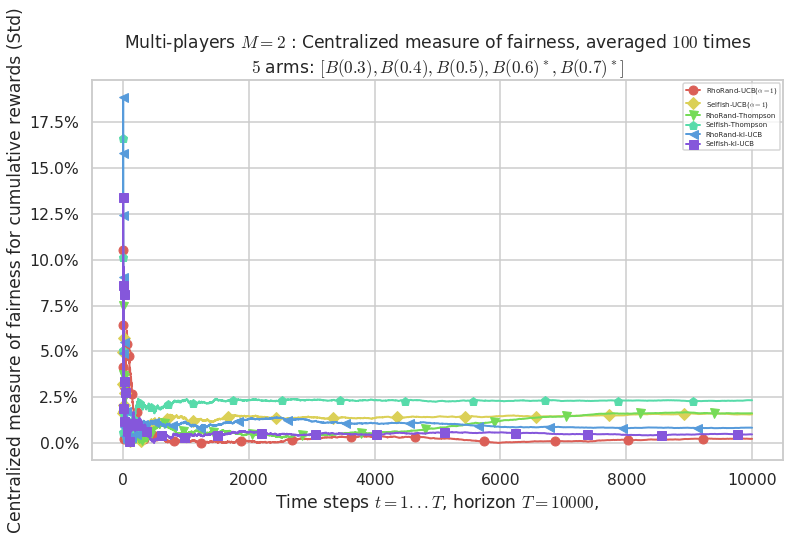

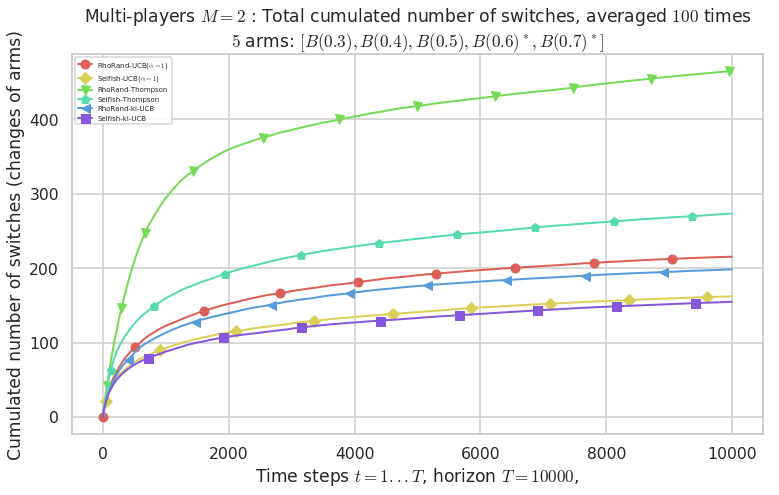

No upper bound for the non-cumulated number of collisions...


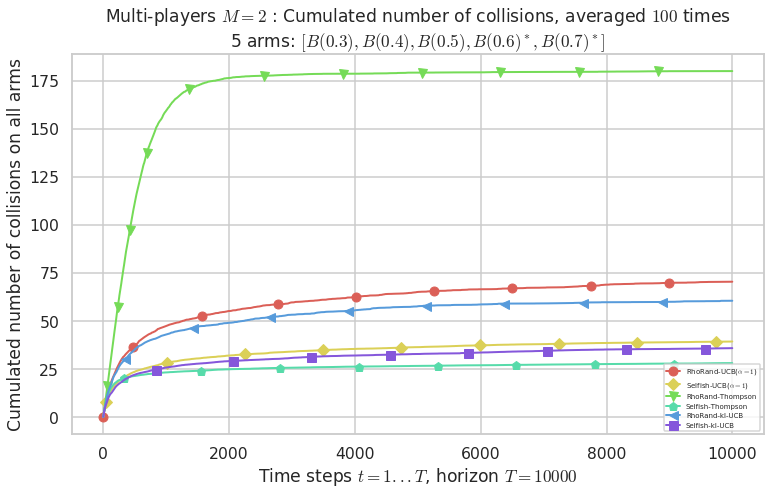

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 4.23 ...
 -  For 2 players, our lower bound gave = 8.46 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 5.35 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.12 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 40.00% ...
 - [Anandtharam et al] centralized lower-bound = 4.23,
 - [Anandkumar et al] decentralized lower-bound = 5.35
 - Our better (larger) decentralized lower-bound = 8.46,


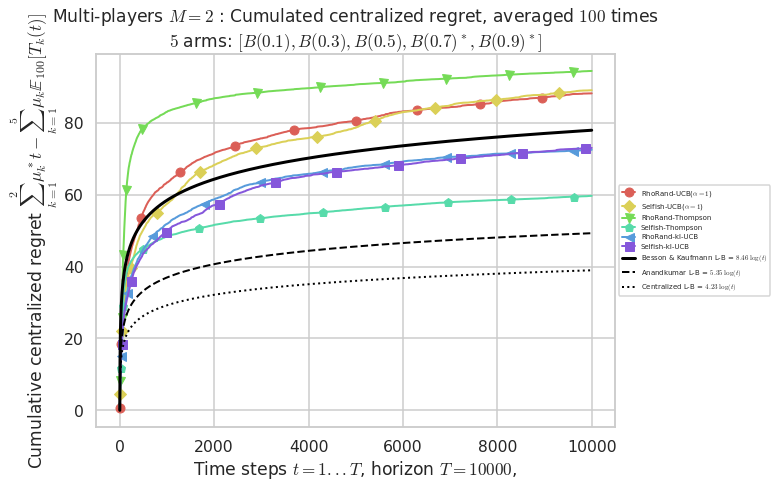

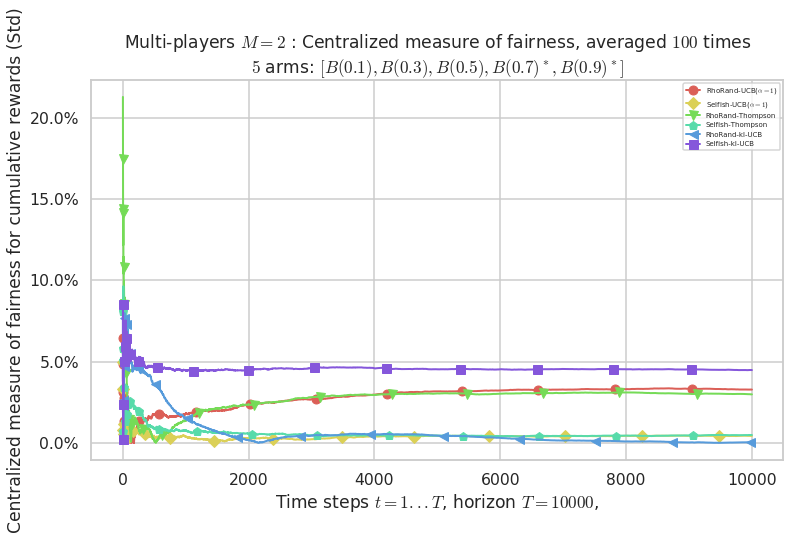

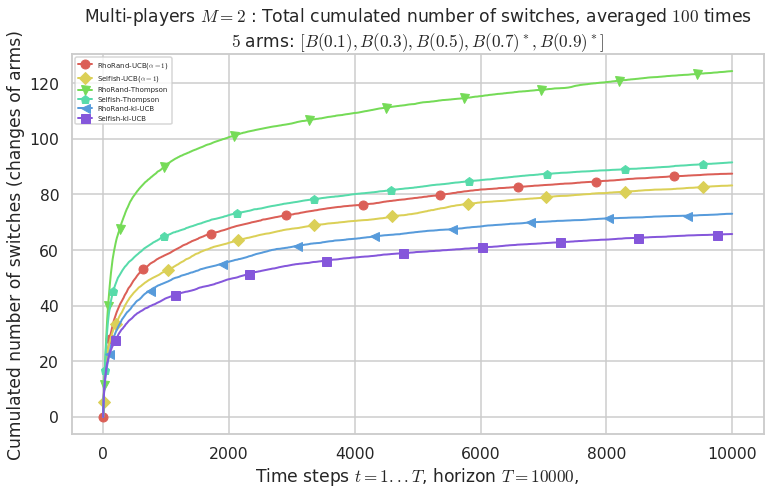

No upper bound for the non-cumulated number of collisions...


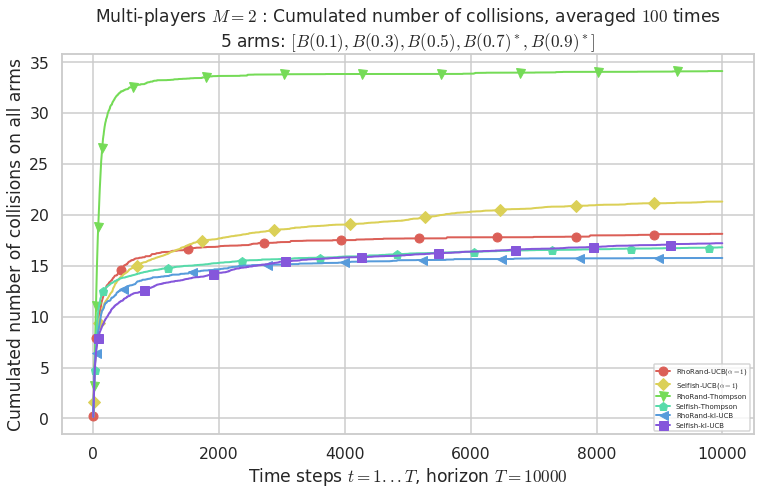

 -  For 2 players, Anandtharam et al. centralized lower-bound gave = 1.41 ...
 -  For 2 players, our lower bound gave = 2.83 ...
 -  For 2 players, the initial lower bound in Theorem 6 from [Anandkumar et al., 2010] gave = 2.78 ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 27.3 for 1-player problem ... 
 - a Optimal Arm Identification factor H_OI(mu) = 29.40% ...
 - [Anandtharam et al] centralized lower-bound = 1.41,
 - [Anandkumar et al] decentralized lower-bound = 2.78
 - Our better (larger) decentralized lower-bound = 2.83,


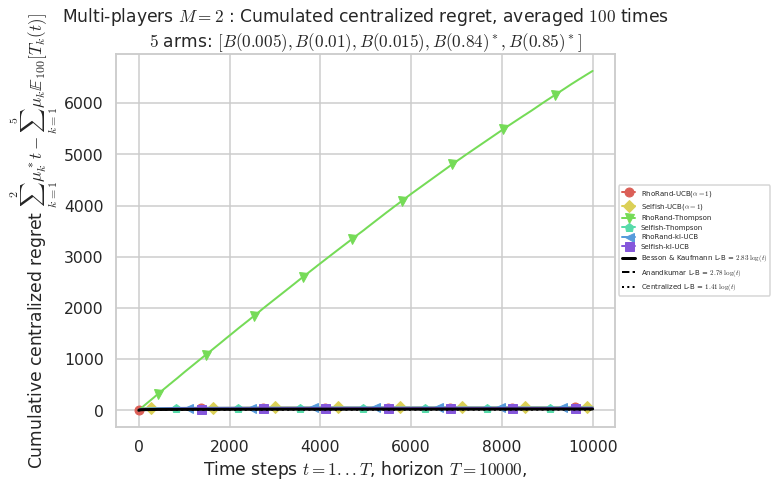

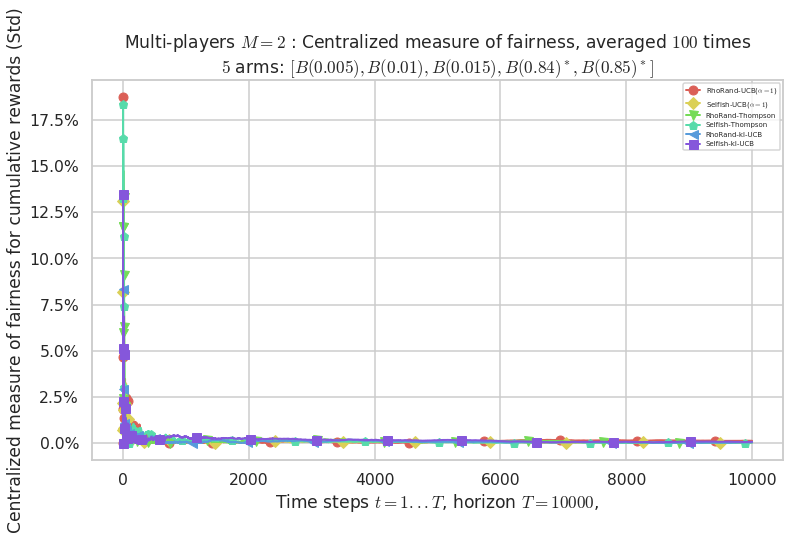

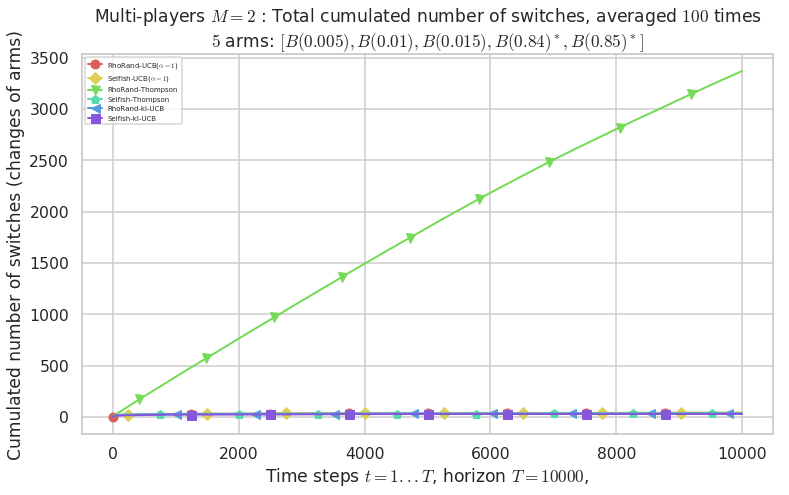

No upper bound for the non-cumulated number of collisions...


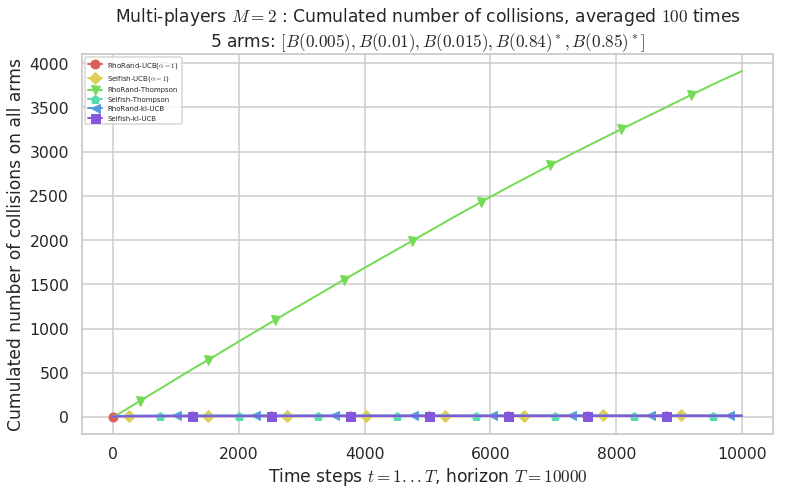

In [34]:
 N = len(configuration["environment"])
for envId, env in enumerate(configuration["environment"]):
    e0, eothers = evaluators[envId][0], evaluators[envId][1:]
    plotCombined(e0, eothers, envId)

---
> That's it for this demo!